In [491]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # python plot most popular , pyplot
import seaborn as sns
import re
from scipy.stats import skew
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
from sklearn import ensemble 
import plotly
import plotly.graph_objs as go
from plotly.offline import *
# plotly.offline.init_notebook_mode(connected=True)
init_notebook_mode(connected=True)
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import (GradientBoostingRegressor , RandomForestRegressor,
                              BaggingRegressor,ExtraTreesRegressor,AdaBoostRegressor,
                              GradientBoostingClassifier)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 800)

# Predicting Sale Price: 

In [492]:
sephora3 = pd.read_csv('CleanSephora.csv', encoding='latin-1')
sephora3['index1'] = sephora3.index

#sephora3[59:62]

print(sephora3.shape)

(6793, 541)


In [493]:
sephoraMLprice = sephora3[sephora3.rating > 0]

In [494]:
print(sephora3.rating.unique())
print("")
print(sephora3.shape)

sephoraMLprice = sephora3[sephora3.reviews > 1]

[4.8 4.  4.1 4.5 3.4 4.2 4.4 3.8 3.9 4.3 4.6 3.2 4.7 4.9 5.  3.7 3.3 3.5
 3.6]

(6793, 541)


In [495]:
sephoraMLprice.drop("skin_type_label", axis=1, inplace=True)

print(sephora3.shape)

(6793, 541)


In [496]:
#print(sephoraMLprice.columns.tolist())

## XGBoost Gradient Boosted Decision Trees:

In [497]:
from xgboost.sklearn import XGBRegressor

X = sephoraMLprice[['size_ounces', 'loves', 'rating', 'would_recommend', 'reviews', 'product_type1__Bath & Body', 'product_type1__Beauty Supplements', 'product_type1__Candles & Home Scents', 'product_type1__Fragrance', 'product_type1__Gifts', 'product_type1__Hair', 'product_type1__Hair Styling & Treatments', 'product_type1__High Tech Tools', 'product_type1__Makeup', 'product_type1__Makeup Palettes', 'product_type1__Men', 'product_type1__Mini Size', 'product_type1__Nail', 'product_type1__Self Tanners', 'product_type1__Shaving', 'product_type1__Skincare', 'product_type1__Tools & Brushes', 'product_type1__Value & Gift Sets', 'product_type1__nan', 'product_type2__Accessories', 'product_type2__Bath & Shower', 'product_type2__Best For', 'product_type2__Body Care', 'product_type2__Body Moisturizers', 'product_type2__Brushes & Applicators', 'product_type2__Cheek', 'product_type2__Cleansers', 'product_type2__Eye', 'product_type2__Eye Care', 'product_type2__Face', 'product_type2__Fragrance', 'product_type2__Hair', 'product_type2__Hair Styling & Treatments', 'product_type2__Hair Tools', 'product_type2__High Tech Tools', 'product_type2__Inner Beauty', 'product_type2__Lip', 'product_type2__Lip Treatments', 'product_type2__Makeup Brushes & Applicators', 'product_type2__Masks', 'product_type2__Men', 'product_type2__Moisturizers', 'product_type2__Other Needs', 'product_type2__Self Tanners', 'product_type2__Shampoo & Conditioner', 'product_type2__Shaving', 'product_type2__Skincare', 'product_type2__Sun Care', 'product_type2__Treatments', 'product_type2__Value & Gift Sets', 'product_type2__Women', 'product_type2__nan', 'product_type2__Aftershave', 'product_type2__Anti-Aging', 'product_type2__BB & CC Cream', 'product_type2__BB & CC Creams', 'product_type2__Bath & Body', 'product_type2__Bath & Shower.1', 'product_type2__Bath Soaks & Bubble Bath', 'product_type2__Beauty Supplements', 'product_type2__Blemish & Acne Treatments', 'product_type2__Blotting Papers', 'product_type2__Blush', 'product_type2__Body Lotions & Body Oils', 'product_type2__Body Mist & Hair Mist', 'product_type2__Body Products', 'product_type2__Body Sprays & Deodorant', 'product_type2__Body Sunscreen', 'product_type2__Body Wash & Shower Gel', 'product_type2__Bronzer', 'product_type2__Brush Cleaners', 'product_type2__Brush Sets', 'product_type2__Cellulite & Stretch Marks', 'product_type2__Cheek Palettes', 'product_type2__Cleansing', 'product_type2__Cleansing Brushes', 'product_type2__Co Wash & No Poo', 'product_type2__Cologne', 'product_type2__Cologne Gift Sets', 'product_type2__Color Care', 'product_type2__Color Correct', 'product_type2__Concealer', 'product_type2__Conditioner', 'product_type2__Contour', 'product_type2__Curling Irons', 'product_type2__Damaged Hair', 'product_type2__Decollete & Neck Creams', 'product_type2__Deodorant & Antiperspirant', 'product_type2__Deodorant for Men', 'product_type2__Dry Shampoo', 'product_type2__Exfoliators', 'product_type2__Eye Brushes', 'product_type2__Eye Cream', 'product_type2__Eye Creams & Treatments', 'product_type2__Eye Masks', 'product_type2__Eye Palettes', 'product_type2__Eye Primer', 'product_type2__Eye Sets', 'product_type2__Eyebrow', 'product_type2__Eyelash Curlers', 'product_type2__Eyeliner', 'product_type2__Eyeshadow', 'product_type2__Face Brushes', 'product_type2__Face Masks', 'product_type2__Face Oils', 'product_type2__Face Primer', 'product_type2__Face Serums', 'product_type2__Face Sets', 'product_type2__Face Sunscreen', 'product_type2__Face Wash', 'product_type2__Face Wash & Cleansers', 'product_type2__Face Wipes', 'product_type2__Facial Peels', 'product_type2__False Eyelashes', 'product_type2__For Body', 'product_type2__For Face', 'product_type2__Foundation', 'product_type2__Fragrance.1', 'product_type2__Hair.1', 'product_type2__Hair Accessories', 'product_type2__Hair Brushes & Combs', 'product_type2__Hair Color', 'product_type2__Hair Dryers', 'product_type2__Hair Masks', 'product_type2__Hair Oil', 'product_type2__Hair Primers', 'product_type2__Hair Products', 'product_type2__Hair Removal', 'product_type2__Hair Removal & Shaving', 'product_type2__Hair Spray', 'product_type2__Hair Straighteners & Flat Irons', 'product_type2__Hair Styling Products', 'product_type2__Hair Thinning & Hair Loss', 'product_type2__Hand Cream & Foot Cream', 'product_type2__Highlighter', 'product_type2__Leave-In Conditioner', 'product_type2__Lip Balm & Treatment', 'product_type2__Lip Balms & Treatments', 'product_type2__Lip Brushes', 'product_type2__Lip Gloss', 'product_type2__Lip Liner', 'product_type2__Lip Plumper', 'product_type2__Lip Sets', 'product_type2__Lip Stain', 'product_type2__Lip Sunscreen', 'product_type2__Lipstick', 'product_type2__Liquid Lipstick', 'product_type2__Lotions & Oils', 'product_type2__Makeup', 'product_type2__Makeup & Travel Cases', 'product_type2__Makeup Bags & Travel Cases', 'product_type2__Makeup Removers', 'product_type2__Mascara', 'product_type2__Men.1', 'product_type2__Mini Size', 'product_type2__Mirrors & Sharpeners', 'product_type2__Mists & Essences', 'product_type2__Moisturizer & Treatments', 'product_type2__Moisturizers.1', 'product_type2__Night Creams', 'product_type2__Perfume', 'product_type2__Perfume Gift Sets', 'product_type2__Rollerballs & Travel Size', 'product_type2__Scalp & Hair Treatments', 'product_type2__Scrub & Exfoliants', 'product_type2__Setting Spray & Powder', 'product_type2__Shampoo', 'product_type2__Shampoo & Conditioner.1', 'product_type2__Shaving.1', 'product_type2__Sheet Masks', 'product_type2__Skincare.1', 'product_type2__Skincare Sets', 'product_type2__Sponges & Applicators', 'product_type2__Sunscreen', 'product_type2__Teeth Whitening', 'product_type2__Tinted Moisturizer', 'product_type2__Toners', 'product_type2__Tools & Brushes', 'product_type2__Tweezers & Eyebrow Tools', 'product_type2__Under-Eye Concealer', 'product_type2__Water Bottles', 'product_type2__nan.1', 'brand__8GREENS', 'brand__ACQUA DI PARMA', 'brand__AERIN', 'brand__AETHER BEAUTY', 'brand__ALGENIST', 'brand__ALPHA-H', 'brand__ALTERNA HAIRCARE', 'brand__AMAZING COSMETICS', 'brand__AMIKA', 'brand__AMOREPACIFIC', 'brand__ANASTASIA BEVERLY HILLS', 'brand__ANTHONY', 'brand__ANTONYM', 'brand__APIVITA', 'brand__AQUIS', 'brand__ARTIS', 'brand__ARTIST COUTURE', 'brand__ATELIER COLOGNE', 'brand__BALENCIAGA', 'brand__BAREMINERALS', 'brand__BEAUTYBIO', 'brand__BEAUTYBLENDER', 'brand__BECCA', 'brand__BELIF', 'brand__BENEFIT COSMETICS', 'brand__BERDOUES', 'brand__BIO IONIC', 'brand__BIOEFFECT', 'brand__BIOSSANCE', 'brand__BITE BEAUTY', 'brand__BKR', 'brand__BLACK UP', 'brand__BLENDSMART', 'brand__BLINC', 'brand__BLINKING BEAUT', 'brand__BLITHE', 'brand__BOBBI BROWN', 'brand__BOSCIA', 'brand__BRIOGEO', 'brand__BSAME COSMETICS', 'brand__BUMBLE AND BUMBLE', 'brand__BURBERRY', 'brand__BUXOM', 'brand__BVLGARI', 'brand__BY ROSIE JANE', 'brand__CALVIN KLEIN', 'brand__CANE + AUSTIN', 'brand__CAPRI BLUE', 'brand__CAPTAIN BLANKENSHIP', 'brand__CAROLINA HERRERA', 'brand__CAUDALIE', 'brand__CELLU-CUP', 'brand__CHANEL', 'brand__CHARLOTTE TILBURY', 'brand__CHLO', 'brand__CHRISTIAN LOUBOUTIN', 'brand__CHRISTOPHE ROBIN', 'brand__CIAT LONDON', 'brand__CINEMA SECRETS', 'brand__CLARINS', 'brand__CLARISONIC', 'brand__CLEAN', 'brand__CLINIQUE', 'brand__COAL AND CANARY', 'brand__COCOFLOSS', 'brand__COMME DES GARCONS', 'brand__COMMODITY', 'brand__COMPTOIR SUD PACIFIQUE', 'brand__CONTURE', 'brand__COOLA', 'brand__COVER FX', 'brand__CRUSHED TONIC', 'brand__DEBORAH LIPPMANN', 'brand__DEREK LAM 10 CROSBY', 'brand__DERMADOCTOR', 'brand__DERMAFLASH', 'brand__DERMARCHE LABS', 'brand__DEVACURL', 'brand__DIAMANCEL', 'brand__DIOR', 'brand__DISNEY COLLECTION', 'brand__DOLCE&GABBANA', 'brand__DOMINIQUE COSMETICS', 'brand__DONNA KARAN', 'brand__DPHUE', "brand__DR ROEBUCK'S", 'brand__DR. BRANDT SKINCARE', 'brand__DR. DENNIS GROSS SKINCARE', 'brand__DR. JART+', 'brand__DRUNK ELEPHANT', 'brand__DRYBAR', 'brand__DTRT', 'brand__DUO', 'brand__DYSON', 'brand__EARTHS NECTAR', 'brand__EDIBLE BEAUTY', 'brand__EIGHT & BOB', 'brand__ELIZABETH AND JAMES', 'brand__ELLIS BROOKLYN', 'brand__ERBORIAN', 'brand__ERNO LASZLO', 'brand__ESTE LAUDER', "brand__ETAT LIBRE D'ORANGE", 'brand__EVE LOM', 'brand__EVIAN', 'brand__FARMACY', 'brand__FARSLI', 'brand__FENTY BEAUTY BY RIHANNA', 'brand__FIRST AID BEAUTY', 'brand__FOREO', 'brand__FORM', 'brand__FOUR SIGMATIC', 'brand__FRESH', 'brand__GHD', 'brand__GIORGIO ARMANI BEAUTY', 'brand__GIVENCHY', 'brand__GLAMGLOW', 'brand__GLO SCIENCE', 'brand__GLOW RECIPE', 'brand__GO-TO', 'brand__GOOD DYE YOUNG', 'brand__GOOGLE', 'brand__GRANDE COSMETICS', 'brand__GUCCI', 'brand__GUERLAIN', 
                    'brand__HERBIVORE', 'brand__HERMS', 'brand__HIGH BEAUTY', 'brand__HISTOIRES DE PARFUMS', 'brand__HOURGLASS', 'brand__HUDA BEAUTY', 'brand__HUM NUTRITION', 'brand__HUSH', 'brand__IGK', 'brand__ILUMINAGE', 'brand__INC.REDIBLE', 'brand__INDIE LEE', 'brand__INVISIBOBBLE', 'brand__ISLE OF PARADISE', 'brand__ISSEY MIYAKE', 'brand__IT COSMETICS', "brand__IT'S SKIN", 'brand__J.ONE', 'brand__JACK BLACK', 'brand__JIMMY CHOO', 'brand__JO MALONE LONDON', 'brand__JOHN VARVATOS', 'brand__JOSIE MARAN', 'brand__JOUER COSMETICS', 'brand__JUICY COUTURE', 'brand__JULIETTE HAS A GUN', 'brand__KAJA', 'brand__KANE NY', 'brand__KAT VON D', 'brand__KATE SOMERVILLE', 'brand__KATE SPADE NEW YORK', 'brand__KENZO', 'brand__KENZOKI', 'brand__KERANIQUE', 'brand__KEVYN AUCOIN', "brand__KIEHL'S SINCE 1851", 'brand__KILIAN', 'brand__KLORANE', 'brand__KOH GEN DO', 'brand__KOPARI', 'brand__KORA ORGANICS', 'brand__KORRES', 'brand__KOSAS', 'brand__KRASTASE', "brand__L'OCCITANE", 'brand__LA MER', 'brand__LAB SERIES FOR MEN', 'brand__LANCER', 'brand__LANCME', 'brand__LANEIGE', 'brand__LASHFOOD', 'brand__LAURA MERCIER', 'brand__LAVANILA', 'brand__LAWLESS', 'brand__LIGHTSTIM', 'brand__LILAH B.', 'brand__LILLY LASHES', 'brand__LIVING PROOF', 'brand__LORD JONES', 'brand__LXMI', 'brand__MADAM C.J. WALKER BEAUTY CULTURE', 'brand__MAELYS COSMETICS', 'brand__MAISON LOUIS MARIE', 'brand__MAISON MARGIELA', 'brand__MAKE UP FOR EVER', 'brand__MAKEUP ERASER', 'brand__MARC JACOBS BEAUTY', 'brand__MARC JACOBS FRAGRANCES', 'brand__MARIO BADESCU', 'brand__MARVIS', 'brand__MDSOLARSCIENCES', 'brand__MICHAEL KORS', 'brand__MILK MAKEUP', 'brand__MIU MIU', 'brand__MONTBLANC', 'brand__MOON JUICE', 'brand__MOROCCANOIL', 'brand__MOSCHINO', 'brand__MOUNT LAI', 'brand__MUGLER', 'brand__MURAD', 'brand__NAILS INC.', 'brand__NARCISO RODRIGUEZ', 'brand__NARS', 'brand__NATASHA DENONA', 'brand__NATURALLY SERIOUS', 'brand__NEOGEN DERMALOGY', 'brand__NEST', 'brand__NO MO-STACHE', 'brand__NUDESTIX', 'brand__NUFACE', 'brand__O&M', 'brand__OBAGI CLINICAL', 'brand__OLAPLEX', 'brand__OLEHENRIKSEN', 'brand__OMOROVICZA', 'brand__ORIGINS', 'brand__OUAI', 'brand__PACO RABANNE', 'brand__PAT MCGRATH LABS', 'brand__PEACE OUT', 'brand__PERRICONE MD', 'brand__PETER THOMAS ROTH', 'brand__PHILOSOPHY', 'brand__PHLUR', 'brand__PINK SUGAR', 'brand__PINROSE', 'brand__PLAYA', 'brand__PMD', 'brand__PRADA', 'brand__PRETTY VULGAR', 'brand__PRIMARY RAW', 'brand__PRIVATE DOCTOR', 'brand__PROACTIV', 'brand__PRORASO', 'brand__QHEMET BIOLOGICS', 'brand__RAG & BONE', 'brand__RAHUA', 'brand__RALPH LAUREN', 'brand__REN CLEAN SKINCARE', 'brand__REVERIE', 'brand__RITA HAZAN', 'brand__RMS BEAUTY', 'brand__RODIN OLIO LUSSO', 'brand__ROSEBUD PERFUME CO.', 'brand__ROSSANO FERRETTI PARMA', 'brand__SACHAJUAN', 'brand__SAND & SKY', 'brand__SATURDAY SKIN', 'brand__SEED PHYTONUTRIENTS', 'brand__SEPHORA COLLECTION', 'brand__SEPHORA FAVORITES', 'brand__SHAVEWORKS', 'brand__SHHHOWERCAP', 'brand__SHISEIDO', 'brand__SK-II', 'brand__SKIN INC SUPPLEMENT BAR', 'brand__SKIN LAUNDRY', 'brand__SLIP', 'brand__SMASHBOX', 'brand__SOL DE JANEIRO', 'brand__SON & PARK', 'brand__ST. TROPEZ TANNING ESSENTIALS', 'brand__STACKEDSKINCARE', 'brand__STELLA MCCARTNEY', 'brand__STELLAR', 'brand__STILA', 'brand__SUMMER FRIDAYS', 'brand__SUNDAY RILEY', 'brand__SUPERGOOP!', 'brand__SURRATT BEAUTY', 'brand__T3', 'brand__TAN-LUXE', 'brand__TANGLE TEEZER', 'brand__TARTE', 'brand__TASTE BEAUTY', 'brand__TATA HARPER', 'brand__TATCHA', 'brand__THE 7 VIRTUES', 'brand__THE ART OF SHAVING', 'brand__THE BEAUTY CHEF', 'brand__THE ORDINARY', 'brand__TOCCA', 'brand__TOKYOMILK', 'brand__TOM FORD', 'brand__TOO COOL FOR SCHOOL', 'brand__TOO FACED', 'brand__TORY BURCH', 'brand__TOUCH IN SOL', 'brand__TRSTIQUE', 'brand__TWEEZERMAN', 'brand__URBAN DECAY', 'brand__VELOUR LASHES', 'brand__VERB', 'brand__VERNON FRANCOIS', 'brand__VERSACE', 'brand__VIKTOR&ROLF', 'brand__VIOLET VOSS', 'brand__VISEART', 'brand__VITA LIBERATA', 'brand__VITAL PROTEINS', 'brand__VITRUVI', 'brand__VOLITION BEAUTY', 'brand__VOLUSPA', 'brand__WANDER BEAUTY', 'brand__WELL-KEPT', 'brand__WELLECO', 'brand__WINKY LUX', 'brand__YOUTH TO THE PEOPLE', 'brand__YUNI', 'brand__YVES SAINT LAURENT', 'would_recommend_label', 'discounted_value_label', 'on_sale_label', 'val_normal_skin_label', 'oily_skin_label', 'dry_skin_label', 'combination_skin_label', 'sensitive_skin_label', 'all_skin_label', 'vegan_label', 'tested_label', 'research_label', 'formulated_without_label', 'clean_label', 'oneStarRatio', 'twoStarsRatio', 'threeStarsRatio', 'fourStarsRatio', 'fiveStarsRatio', 'fourAnd5StarRatio', 'fourAnd5StarRatio_rounded', 'fourAnd5Star_above_below_avg']]

y=sephoraMLprice['price']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2)

xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [0.05, 0.1, 0.01, 0.03], #so called `eta` value   # 
              'max_depth': [6],
           #   'min_child_weight': [1,2,3,4],   # 5,6
              'silent': [1],
              'min_samples_split':[2, 3, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [526]}   # 500,600,700

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 4,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print("best score: ", xgb_grid.best_score_)
print("best parameters: ", xgb_grid.best_params_)
################################################################

#0.5246392745032281
#{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_samples_split': 1, 
# 'n_estimators': 896, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}

Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 28.3min
[Parallel(n_jobs=4)]: Done  96 out of  96 | elapsed: 59.5min finished


best score:  0.5727705502315179
best parameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 526, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


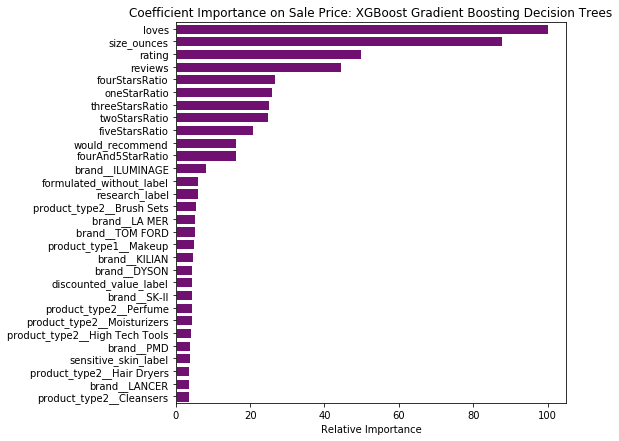

(1315, 1)
           0
0  59.151520
1  24.771397
2  47.179756
3  25.190968
4  14.406643

XGBoost RMSE on the Train set is: 14.47534686576203
XGBoost RMSE on the Test set is: 28.9741172500355


In [498]:
y_train_predict = xgb_grid.predict(X_train)
y_test_predict = xgb_grid.predict(X_test)

# save results to DF
results = pd.Series(y_test_predict)
id_price = list(zip((y_test_predict)))
predictions = pd.DataFrame(id_price)

# plot important coeff
#importances = CV_RFR_regr.best_estimator_.feature_importances_
feature_importance = xgb_grid.best_estimator_.feature_importances_                 # gonna get an error here
feature_importance = 100 * (feature_importance / feature_importance.max())

sorted_index = np.argsort(feature_importance)
featimp = feature_importance[sorted_index]
feat = X_train.columns[sorted_index]
pos = np.arange(sorted_index.shape[0]) + .5

a = 0 
b = 30 # max features
c = b - a

featimp= featimp[::-1][a:b]
feat = feat[::-1][a:b]
pos = pos[::-1][a:b]

fig = plt.figure(figsize=(7,7))
plt.subplot2grid((1,1), (0,0))
with sns.axes_style("white"):
    ax = sns.barplot(y=feat, x=featimp, color = "purple")
plt.xlabel('Relative Importance')
plt.title('Coefficient Importance on Sale Price: XGBoost Gradient Boosting Decision Trees'.format(c))
plt.show()

print(predictions.shape)
print(predictions.head())
print("")

est_train = np.sqrt(mean_squared_error(y_train, y_train_predict))
print('XGBoost RMSE on the Train set is: {}'.format(est_train))

est_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
print('XGBoost RMSE on the Test set is: {}'.format(est_test))


## Sale price: Elastic Net

ElasticNet picked 371 features and eliminated the other 154 features


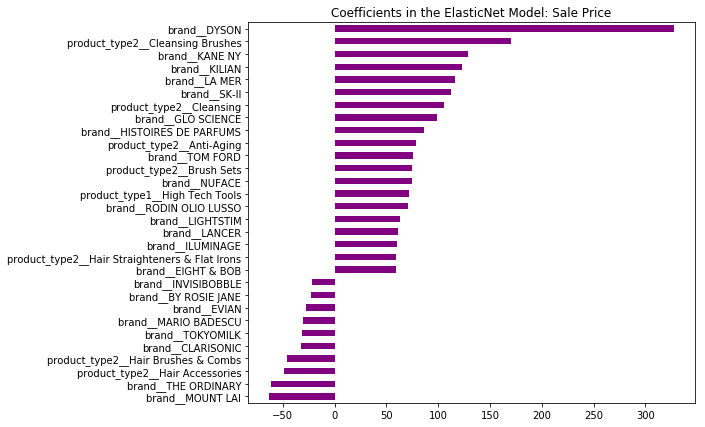

(1315, 1)
           0
0  68.999999
1  99.999998
2  49.000000
3  36.000001
4  38.000001
Best alpha : 0.006
ElasticNet RMSE on Train set: 27.83248405115121
ElasticNet RMSE on Train set: 29.478611482415165


In [437]:
from sklearn.linear_model import ElasticNetCV

X = sephoraMLprice[['size_ounces', 'loves', 'rating', 'would_recommend', 'reviews', 'product_type1__Bath & Body', 'product_type1__Beauty Supplements', 'product_type1__Candles & Home Scents', 'product_type1__Fragrance', 'product_type1__Gifts', 'product_type1__Hair', 'product_type1__Hair Styling & Treatments', 'product_type1__High Tech Tools', 'product_type1__Makeup', 'product_type1__Makeup Palettes', 'product_type1__Men', 'product_type1__Mini Size', 'product_type1__Nail', 'product_type1__Self Tanners', 'product_type1__Shaving', 'product_type1__Skincare', 'product_type1__Tools & Brushes', 'product_type1__Value & Gift Sets', 'product_type1__nan', 'product_type2__Accessories', 'product_type2__Bath & Shower', 'product_type2__Best For', 'product_type2__Body Care', 'product_type2__Body Moisturizers', 'product_type2__Brushes & Applicators', 'product_type2__Cheek', 'product_type2__Cleansers', 'product_type2__Eye', 'product_type2__Eye Care', 'product_type2__Face', 'product_type2__Fragrance', 'product_type2__Hair', 'product_type2__Hair Styling & Treatments', 'product_type2__Hair Tools', 'product_type2__High Tech Tools', 'product_type2__Inner Beauty', 'product_type2__Lip', 'product_type2__Lip Treatments', 'product_type2__Makeup Brushes & Applicators', 'product_type2__Masks', 'product_type2__Men', 'product_type2__Moisturizers', 'product_type2__Other Needs', 'product_type2__Self Tanners', 'product_type2__Shampoo & Conditioner', 'product_type2__Shaving', 'product_type2__Skincare', 'product_type2__Sun Care', 'product_type2__Treatments', 'product_type2__Value & Gift Sets', 'product_type2__Women', 'product_type2__nan', 'product_type2__Aftershave', 'product_type2__Anti-Aging', 'product_type2__BB & CC Cream', 'product_type2__BB & CC Creams', 'product_type2__Bath & Body', 'product_type2__Bath & Shower.1', 'product_type2__Bath Soaks & Bubble Bath', 'product_type2__Beauty Supplements', 'product_type2__Blemish & Acne Treatments', 'product_type2__Blotting Papers', 'product_type2__Blush', 'product_type2__Body Lotions & Body Oils', 'product_type2__Body Mist & Hair Mist', 'product_type2__Body Products', 'product_type2__Body Sprays & Deodorant', 'product_type2__Body Sunscreen', 'product_type2__Body Wash & Shower Gel', 'product_type2__Bronzer', 'product_type2__Brush Cleaners', 'product_type2__Brush Sets', 'product_type2__Cellulite & Stretch Marks', 'product_type2__Cheek Palettes', 'product_type2__Cleansing', 'product_type2__Cleansing Brushes', 'product_type2__Co Wash & No Poo', 'product_type2__Cologne', 'product_type2__Cologne Gift Sets', 'product_type2__Color Care', 'product_type2__Color Correct', 'product_type2__Concealer', 'product_type2__Conditioner', 'product_type2__Contour', 'product_type2__Curling Irons', 'product_type2__Damaged Hair', 'product_type2__Decollete & Neck Creams', 'product_type2__Deodorant & Antiperspirant', 'product_type2__Deodorant for Men', 'product_type2__Dry Shampoo', 'product_type2__Exfoliators', 'product_type2__Eye Brushes', 'product_type2__Eye Cream', 'product_type2__Eye Creams & Treatments', 'product_type2__Eye Masks', 'product_type2__Eye Palettes', 'product_type2__Eye Primer', 'product_type2__Eye Sets', 'product_type2__Eyebrow', 'product_type2__Eyelash Curlers', 'product_type2__Eyeliner', 'product_type2__Eyeshadow', 'product_type2__Face Brushes', 'product_type2__Face Masks', 'product_type2__Face Oils', 'product_type2__Face Primer', 'product_type2__Face Serums', 'product_type2__Face Sets', 'product_type2__Face Sunscreen', 'product_type2__Face Wash', 'product_type2__Face Wash & Cleansers', 'product_type2__Face Wipes', 'product_type2__Facial Peels', 'product_type2__False Eyelashes', 'product_type2__For Body', 'product_type2__For Face', 'product_type2__Foundation', 'product_type2__Fragrance.1', 'product_type2__Hair.1', 'product_type2__Hair Accessories', 'product_type2__Hair Brushes & Combs', 'product_type2__Hair Color', 'product_type2__Hair Dryers', 'product_type2__Hair Masks', 'product_type2__Hair Oil', 'product_type2__Hair Primers', 'product_type2__Hair Products', 'product_type2__Hair Removal', 'product_type2__Hair Removal & Shaving', 'product_type2__Hair Spray', 'product_type2__Hair Straighteners & Flat Irons', 'product_type2__Hair Styling Products', 'product_type2__Hair Thinning & Hair Loss', 'product_type2__Hand Cream & Foot Cream', 'product_type2__Highlighter', 'product_type2__Leave-In Conditioner', 'product_type2__Lip Balm & Treatment', 'product_type2__Lip Balms & Treatments', 'product_type2__Lip Brushes', 'product_type2__Lip Gloss', 'product_type2__Lip Liner', 'product_type2__Lip Plumper', 'product_type2__Lip Sets', 'product_type2__Lip Stain', 'product_type2__Lip Sunscreen', 'product_type2__Lipstick', 'product_type2__Liquid Lipstick', 'product_type2__Lotions & Oils', 'product_type2__Makeup', 'product_type2__Makeup & Travel Cases', 'product_type2__Makeup Bags & Travel Cases', 'product_type2__Makeup Removers', 'product_type2__Mascara', 'product_type2__Men.1', 'product_type2__Mini Size', 'product_type2__Mirrors & Sharpeners', 'product_type2__Mists & Essences', 'product_type2__Moisturizer & Treatments', 'product_type2__Moisturizers.1', 'product_type2__Night Creams', 'product_type2__Perfume', 'product_type2__Perfume Gift Sets', 'product_type2__Rollerballs & Travel Size', 'product_type2__Scalp & Hair Treatments', 'product_type2__Scrub & Exfoliants', 'product_type2__Setting Spray & Powder', 'product_type2__Shampoo', 'product_type2__Shampoo & Conditioner.1', 'product_type2__Shaving.1', 'product_type2__Sheet Masks', 'product_type2__Skincare.1', 'product_type2__Skincare Sets', 'product_type2__Sponges & Applicators', 'product_type2__Sunscreen', 'product_type2__Teeth Whitening', 'product_type2__Tinted Moisturizer', 'product_type2__Toners', 'product_type2__Tools & Brushes', 'product_type2__Tweezers & Eyebrow Tools', 'product_type2__Under-Eye Concealer', 'product_type2__Water Bottles', 'product_type2__nan.1', 'brand__8GREENS', 'brand__ACQUA DI PARMA', 'brand__AERIN', 'brand__AETHER BEAUTY', 'brand__ALGENIST', 'brand__ALPHA-H', 'brand__ALTERNA HAIRCARE', 'brand__AMAZING COSMETICS', 'brand__AMIKA', 'brand__AMOREPACIFIC', 'brand__ANASTASIA BEVERLY HILLS', 'brand__ANTHONY', 'brand__ANTONYM', 'brand__APIVITA', 'brand__AQUIS', 'brand__ARTIS', 'brand__ARTIST COUTURE', 'brand__ATELIER COLOGNE', 'brand__BALENCIAGA', 'brand__BAREMINERALS', 'brand__BEAUTYBIO', 'brand__BEAUTYBLENDER', 'brand__BECCA', 'brand__BELIF', 'brand__BENEFIT COSMETICS', 'brand__BERDOUES', 'brand__BIO IONIC', 'brand__BIOEFFECT', 'brand__BIOSSANCE', 'brand__BITE BEAUTY', 'brand__BKR', 'brand__BLACK UP', 'brand__BLENDSMART', 'brand__BLINC', 'brand__BLINKING BEAUT', 'brand__BLITHE', 'brand__BOBBI BROWN', 'brand__BOSCIA', 'brand__BRIOGEO', 'brand__BSAME COSMETICS', 'brand__BUMBLE AND BUMBLE', 'brand__BURBERRY', 'brand__BUXOM', 'brand__BVLGARI', 'brand__BY ROSIE JANE', 'brand__CALVIN KLEIN', 'brand__CANE + AUSTIN', 'brand__CAPRI BLUE', 'brand__CAPTAIN BLANKENSHIP', 'brand__CAROLINA HERRERA', 'brand__CAUDALIE', 'brand__CELLU-CUP', 'brand__CHANEL', 'brand__CHARLOTTE TILBURY', 'brand__CHLO', 'brand__CHRISTIAN LOUBOUTIN', 'brand__CHRISTOPHE ROBIN', 'brand__CIAT LONDON', 'brand__CINEMA SECRETS', 'brand__CLARINS', 'brand__CLARISONIC', 'brand__CLEAN', 'brand__CLINIQUE', 'brand__COAL AND CANARY', 'brand__COCOFLOSS', 'brand__COMME DES GARCONS', 'brand__COMMODITY', 'brand__COMPTOIR SUD PACIFIQUE', 'brand__CONTURE', 'brand__COOLA', 'brand__COVER FX', 'brand__CRUSHED TONIC', 'brand__DEBORAH LIPPMANN', 'brand__DEREK LAM 10 CROSBY', 'brand__DERMADOCTOR', 'brand__DERMAFLASH', 'brand__DERMARCHE LABS', 'brand__DEVACURL', 'brand__DIAMANCEL', 'brand__DIOR', 'brand__DISNEY COLLECTION', 'brand__DOLCE&GABBANA', 'brand__DOMINIQUE COSMETICS', 'brand__DONNA KARAN', 'brand__DPHUE', "brand__DR ROEBUCK'S", 'brand__DR. BRANDT SKINCARE', 'brand__DR. DENNIS GROSS SKINCARE', 'brand__DR. JART+', 'brand__DRUNK ELEPHANT', 'brand__DRYBAR', 'brand__DTRT', 'brand__DUO', 'brand__DYSON', 'brand__EARTHS NECTAR', 'brand__EDIBLE BEAUTY', 'brand__EIGHT & BOB', 'brand__ELIZABETH AND JAMES', 'brand__ELLIS BROOKLYN', 'brand__ERBORIAN', 'brand__ERNO LASZLO', 'brand__ESTE LAUDER', "brand__ETAT LIBRE D'ORANGE", 'brand__EVE LOM', 'brand__EVIAN', 'brand__FARMACY', 'brand__FARSLI', 'brand__FENTY BEAUTY BY RIHANNA', 'brand__FIRST AID BEAUTY', 'brand__FOREO', 'brand__FORM', 'brand__FOUR SIGMATIC', 'brand__FRESH', 'brand__GHD', 'brand__GIORGIO ARMANI BEAUTY', 'brand__GIVENCHY', 'brand__GLAMGLOW', 'brand__GLO SCIENCE', 'brand__GLOW RECIPE', 'brand__GO-TO', 'brand__GOOD DYE YOUNG', 'brand__GOOGLE', 'brand__GRANDE COSMETICS', 'brand__GUCCI', 'brand__GUERLAIN', 
                    'brand__HERBIVORE', 'brand__HERMS', 'brand__HIGH BEAUTY', 'brand__HISTOIRES DE PARFUMS', 'brand__HOURGLASS', 'brand__HUDA BEAUTY', 'brand__HUM NUTRITION', 'brand__HUSH', 'brand__IGK', 'brand__ILUMINAGE', 'brand__INC.REDIBLE', 'brand__INDIE LEE', 'brand__INVISIBOBBLE', 'brand__ISLE OF PARADISE', 'brand__ISSEY MIYAKE', 'brand__IT COSMETICS', "brand__IT'S SKIN", 'brand__J.ONE', 'brand__JACK BLACK', 'brand__JIMMY CHOO', 'brand__JO MALONE LONDON', 'brand__JOHN VARVATOS', 'brand__JOSIE MARAN', 'brand__JOUER COSMETICS', 'brand__JUICY COUTURE', 'brand__JULIETTE HAS A GUN', 'brand__KAJA', 'brand__KANE NY', 'brand__KAT VON D', 'brand__KATE SOMERVILLE', 'brand__KATE SPADE NEW YORK', 'brand__KENZO', 'brand__KENZOKI', 'brand__KERANIQUE', 'brand__KEVYN AUCOIN', "brand__KIEHL'S SINCE 1851", 'brand__KILIAN', 'brand__KLORANE', 'brand__KOH GEN DO', 'brand__KOPARI', 'brand__KORA ORGANICS', 'brand__KORRES', 'brand__KOSAS', 'brand__KRASTASE', "brand__L'OCCITANE", 'brand__LA MER', 'brand__LAB SERIES FOR MEN', 'brand__LANCER', 'brand__LANCME', 'brand__LANEIGE', 'brand__LASHFOOD', 'brand__LAURA MERCIER', 'brand__LAVANILA', 'brand__LAWLESS', 'brand__LIGHTSTIM', 'brand__LILAH B.', 'brand__LILLY LASHES', 'brand__LIVING PROOF', 'brand__LORD JONES', 'brand__LXMI', 'brand__MADAM C.J. WALKER BEAUTY CULTURE', 'brand__MAELYS COSMETICS', 'brand__MAISON LOUIS MARIE', 'brand__MAISON MARGIELA', 'brand__MAKE UP FOR EVER', 'brand__MAKEUP ERASER', 'brand__MARC JACOBS BEAUTY', 'brand__MARC JACOBS FRAGRANCES', 'brand__MARIO BADESCU', 'brand__MARVIS', 'brand__MDSOLARSCIENCES', 'brand__MICHAEL KORS', 'brand__MILK MAKEUP', 'brand__MIU MIU', 'brand__MONTBLANC', 'brand__MOON JUICE', 'brand__MOROCCANOIL', 'brand__MOSCHINO', 'brand__MOUNT LAI', 'brand__MUGLER', 'brand__MURAD', 'brand__NAILS INC.', 'brand__NARCISO RODRIGUEZ', 'brand__NARS', 'brand__NATASHA DENONA', 'brand__NATURALLY SERIOUS', 'brand__NEOGEN DERMALOGY', 'brand__NEST', 'brand__NO MO-STACHE', 'brand__NUDESTIX', 'brand__NUFACE', 'brand__O&M', 'brand__OBAGI CLINICAL', 'brand__OLAPLEX', 'brand__OLEHENRIKSEN', 'brand__OMOROVICZA', 'brand__ORIGINS', 'brand__OUAI', 'brand__PACO RABANNE', 'brand__PAT MCGRATH LABS', 'brand__PEACE OUT', 'brand__PERRICONE MD', 'brand__PETER THOMAS ROTH', 'brand__PHILOSOPHY', 'brand__PHLUR', 'brand__PINK SUGAR', 'brand__PINROSE', 'brand__PLAYA', 'brand__PMD', 'brand__PRADA', 'brand__PRETTY VULGAR', 'brand__PRIMARY RAW', 'brand__PRIVATE DOCTOR', 'brand__PROACTIV', 'brand__PRORASO', 'brand__QHEMET BIOLOGICS', 'brand__RAG & BONE', 'brand__RAHUA', 'brand__RALPH LAUREN', 'brand__REN CLEAN SKINCARE', 'brand__REVERIE', 'brand__RITA HAZAN', 'brand__RMS BEAUTY', 'brand__RODIN OLIO LUSSO', 'brand__ROSEBUD PERFUME CO.', 'brand__ROSSANO FERRETTI PARMA', 'brand__SACHAJUAN', 'brand__SAND & SKY', 'brand__SATURDAY SKIN', 'brand__SEED PHYTONUTRIENTS', 'brand__SEPHORA COLLECTION', 'brand__SEPHORA FAVORITES', 'brand__SHAVEWORKS', 'brand__SHHHOWERCAP', 'brand__SHISEIDO', 'brand__SK-II', 'brand__SKIN INC SUPPLEMENT BAR', 'brand__SKIN LAUNDRY', 'brand__SLIP', 'brand__SMASHBOX', 'brand__SOL DE JANEIRO', 'brand__SON & PARK', 'brand__ST. TROPEZ TANNING ESSENTIALS', 'brand__STACKEDSKINCARE', 'brand__STELLA MCCARTNEY', 'brand__STELLAR', 'brand__STILA', 'brand__SUMMER FRIDAYS', 'brand__SUNDAY RILEY', 'brand__SUPERGOOP!', 'brand__SURRATT BEAUTY', 'brand__T3', 'brand__TAN-LUXE', 'brand__TANGLE TEEZER', 'brand__TARTE', 'brand__TASTE BEAUTY', 'brand__TATA HARPER', 'brand__TATCHA', 'brand__THE 7 VIRTUES', 'brand__THE ART OF SHAVING', 'brand__THE BEAUTY CHEF', 'brand__THE ORDINARY', 'brand__TOCCA', 'brand__TOKYOMILK', 'brand__TOM FORD', 'brand__TOO COOL FOR SCHOOL', 'brand__TOO FACED', 'brand__TORY BURCH', 'brand__TOUCH IN SOL', 'brand__TRSTIQUE', 'brand__TWEEZERMAN', 'brand__URBAN DECAY', 'brand__VELOUR LASHES', 'brand__VERB', 'brand__VERNON FRANCOIS', 'brand__VERSACE', 'brand__VIKTOR&ROLF', 'brand__VIOLET VOSS', 'brand__VISEART', 'brand__VITA LIBERATA', 'brand__VITAL PROTEINS', 'brand__VITRUVI', 'brand__VOLITION BEAUTY', 'brand__VOLUSPA', 'brand__WANDER BEAUTY', 'brand__WELL-KEPT', 'brand__WELLECO', 'brand__WINKY LUX', 'brand__YOUTH TO THE PEOPLE', 'brand__YUNI', 'brand__YVES SAINT LAURENT', 'would_recommend_label', 'discounted_value_label', 'on_sale_label', 'val_normal_skin_label', 'oily_skin_label', 'dry_skin_label', 'combination_skin_label', 'sensitive_skin_label', 'all_skin_label', 'vegan_label', 'tested_label', 'research_label', 'formulated_without_label', 'clean_label', 'oneStarRatio', 'twoStarsRatio', 'threeStarsRatio', 'fourStarsRatio', 'fiveStarsRatio', 'fourAnd5StarRatio', 'fourAnd5StarRatio_rounded', 'fourAnd5Star_above_below_avg']]

y=sephoraMLprice['price']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2)

elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 
                                      0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.006], 
                          max_iter = 500, cv = 5)

elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_

results = pd.Series(y_test_ela)
id_price = list(zip(y_test_ela))
predictions = pd.DataFrame(id_price)
#predictions.to_csv('submit.csv', index=False)


# Plot important coefficients
plt.figure(figsize=(8,7))
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) 
      + " features and eliminated the other " 
      +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(20)])
imp_coefs.plot(kind = "barh", color = "purple")
plt.title("Coefficients in the ElasticNet Model: Sale Price")
plt.show()

# ElasticNet RMSE on Test set : 0.1381650415290418

print(predictions.shape)
print(predictions.head())
print("Best alpha :", alpha)

y_train_ela = elasticNet.predict(X_train)
y_test_ela = elasticNet.predict(X_test)

elasticNet_train = np.sqrt(mean_squared_error(y_train_ela, y_train))
print('ElasticNet RMSE on Train set: {}'.format(elasticNet_train))

elasticNet_test = np.sqrt(mean_squared_error(y_test_ela, y_test))
print('ElasticNet RMSE on Train set: {}'.format(elasticNet_test))

# 2000 max iter
# Best alpha : 0.006
# ElasticNet RMSE on Train set: 26.4480590994114
# ElasticNet RMSE on Train set: 28.90231619027953

# 2200 max iter 
# ElasticNet RMSE on Train set: 25.193057693701185
# ElasticNet RMSE on Train set: 33.429032065538166

# Predicting Loves:

In [521]:
sephora3 = pd.read_csv('CleanSephora.csv', encoding='latin-1')
sephora3['index1'] = sephora3.index

print("original", sephora3.shape)
# rows x columns
sephoraLoves = sephora3[sephora3.rating > 1]
sephoraLoves = sephoraLoves[sephoraLoves.loves > 135]

print(sephoraLoves.shape)

original (6793, 541)
(6767, 541)


In [522]:
sephoraLoves.drop("would_recommend_label", axis=1, inplace=True)
sephoraLoves.drop("skin_type_label", axis=1, inplace=True)

print(sephoraLoves.shape)
print(sephoraLoves.loves.dtypes)
# print(sephoraLoves.columns.tolist())

(6767, 539)
int64


## XGBoost Gradient Boosting Decision Trees:

In [524]:
from xgboost.sklearn import XGBRegressor

X = sephoraLoves[['price', 'size_ounces', 'rating', 'would_recommend', 'reviews', 'product_type1__Bath & Body', 'product_type1__Beauty Supplements', 'product_type1__Candles & Home Scents', 'product_type1__Fragrance', 'product_type1__Gifts', 'product_type1__Hair', 'product_type1__Hair Styling & Treatments', 'product_type1__High Tech Tools', 'product_type1__Makeup', 'product_type1__Makeup Palettes', 'product_type1__Men', 'product_type1__Mini Size', 'product_type1__Nail', 'product_type1__Self Tanners', 'product_type1__Shaving', 'product_type1__Skincare', 'product_type1__Tools & Brushes', 'product_type1__Value & Gift Sets', 'product_type1__nan', 'product_type2__Accessories', 'product_type2__Bath & Shower', 'product_type2__Best For', 'product_type2__Body Care', 'product_type2__Body Moisturizers', 'product_type2__Brushes & Applicators', 'product_type2__Cheek', 'product_type2__Cleansers', 'product_type2__Eye', 'product_type2__Eye Care', 'product_type2__Face', 'product_type2__Fragrance', 'product_type2__Hair', 'product_type2__Hair Styling & Treatments', 'product_type2__Hair Tools', 'product_type2__High Tech Tools', 'product_type2__Inner Beauty', 'product_type2__Lip', 'product_type2__Lip Treatments', 'product_type2__Makeup Brushes & Applicators', 'product_type2__Masks', 'product_type2__Men', 'product_type2__Moisturizers', 'product_type2__Other Needs', 'product_type2__Self Tanners', 'product_type2__Shampoo & Conditioner', 'product_type2__Shaving', 'product_type2__Skincare', 'product_type2__Sun Care', 'product_type2__Treatments', 'product_type2__Value & Gift Sets', 'product_type2__Women', 'product_type2__nan', 'product_type2__Aftershave', 'product_type2__Anti-Aging', 'product_type2__BB & CC Cream', 'product_type2__BB & CC Creams', 'product_type2__Bath & Body', 'product_type2__Bath & Shower.1', 'product_type2__Bath Soaks & Bubble Bath', 'product_type2__Beauty Supplements', 'product_type2__Blemish & Acne Treatments', 'product_type2__Blotting Papers', 'product_type2__Blush', 'product_type2__Body Lotions & Body Oils', 'product_type2__Body Mist & Hair Mist', 'product_type2__Body Products', 'product_type2__Body Sprays & Deodorant', 'product_type2__Body Sunscreen', 'product_type2__Body Wash & Shower Gel', 'product_type2__Bronzer', 'product_type2__Brush Cleaners', 'product_type2__Brush Sets', 'product_type2__Cellulite & Stretch Marks', 'product_type2__Cheek Palettes', 'product_type2__Cleansing', 'product_type2__Cleansing Brushes', 'product_type2__Co Wash & No Poo', 'product_type2__Cologne', 'product_type2__Cologne Gift Sets', 'product_type2__Color Care', 'product_type2__Color Correct', 'product_type2__Concealer', 'product_type2__Conditioner', 'product_type2__Contour', 'product_type2__Curling Irons', 'product_type2__Damaged Hair', 'product_type2__Decollete & Neck Creams', 'product_type2__Deodorant & Antiperspirant', 'product_type2__Deodorant for Men', 'product_type2__Dry Shampoo', 'product_type2__Exfoliators', 'product_type2__Eye Brushes', 'product_type2__Eye Cream', 'product_type2__Eye Creams & Treatments', 'product_type2__Eye Masks', 'product_type2__Eye Palettes', 'product_type2__Eye Primer', 'product_type2__Eye Sets', 'product_type2__Eyebrow', 'product_type2__Eyelash Curlers', 'product_type2__Eyeliner', 'product_type2__Eyeshadow', 'product_type2__Face Brushes', 'product_type2__Face Masks', 'product_type2__Face Oils', 'product_type2__Face Primer', 'product_type2__Face Serums', 'product_type2__Face Sets', 'product_type2__Face Sunscreen', 'product_type2__Face Wash', 'product_type2__Face Wash & Cleansers', 'product_type2__Face Wipes', 'product_type2__Facial Peels', 'product_type2__False Eyelashes', 'product_type2__For Body', 'product_type2__For Face', 'product_type2__Foundation', 'product_type2__Fragrance.1', 'product_type2__Hair.1', 'product_type2__Hair Accessories', 'product_type2__Hair Brushes & Combs', 'product_type2__Hair Color', 'product_type2__Hair Dryers', 'product_type2__Hair Masks', 'product_type2__Hair Oil', 'product_type2__Hair Primers', 'product_type2__Hair Products', 'product_type2__Hair Removal', 'product_type2__Hair Removal & Shaving', 'product_type2__Hair Spray', 'product_type2__Hair Straighteners & Flat Irons', 'product_type2__Hair Styling Products', 'product_type2__Hair Thinning & Hair Loss', 'product_type2__Hand Cream & Foot Cream', 'product_type2__Highlighter', 'product_type2__Leave-In Conditioner', 'product_type2__Lip Balm & Treatment', 'product_type2__Lip Balms & Treatments', 'product_type2__Lip Brushes', 'product_type2__Lip Gloss', 'product_type2__Lip Liner', 'product_type2__Lip Plumper', 'product_type2__Lip Sets', 'product_type2__Lip Stain', 'product_type2__Lip Sunscreen', 'product_type2__Lipstick', 'product_type2__Liquid Lipstick', 'product_type2__Lotions & Oils', 'product_type2__Makeup', 'product_type2__Makeup & Travel Cases', 'product_type2__Makeup Bags & Travel Cases', 'product_type2__Makeup Removers', 'product_type2__Mascara', 'product_type2__Men.1', 'product_type2__Mini Size', 'product_type2__Mirrors & Sharpeners', 'product_type2__Mists & Essences', 'product_type2__Moisturizer & Treatments', 'product_type2__Moisturizers.1', 'product_type2__Night Creams', 'product_type2__Perfume', 'product_type2__Perfume Gift Sets', 'product_type2__Rollerballs & Travel Size', 'product_type2__Scalp & Hair Treatments', 'product_type2__Scrub & Exfoliants', 'product_type2__Setting Spray & Powder', 'product_type2__Shampoo', 'product_type2__Shampoo & Conditioner.1', 'product_type2__Shaving.1', 'product_type2__Sheet Masks', 'product_type2__Skincare.1', 'product_type2__Skincare Sets', 'product_type2__Sponges & Applicators', 'product_type2__Sunscreen', 'product_type2__Teeth Whitening', 'product_type2__Tinted Moisturizer', 'product_type2__Toners', 'product_type2__Tools & Brushes', 'product_type2__Tweezers & Eyebrow Tools', 'product_type2__Under-Eye Concealer', 'product_type2__Water Bottles', 'product_type2__nan.1', 'brand__8GREENS', 'brand__ACQUA DI PARMA', 'brand__AERIN', 'brand__AETHER BEAUTY', 'brand__ALGENIST', 'brand__ALPHA-H', 'brand__ALTERNA HAIRCARE', 'brand__AMAZING COSMETICS', 'brand__AMIKA', 'brand__AMOREPACIFIC', 'brand__ANASTASIA BEVERLY HILLS', 'brand__ANTHONY', 'brand__ANTONYM', 'brand__APIVITA', 'brand__AQUIS', 'brand__ARTIS', 'brand__ARTIST COUTURE', 'brand__ATELIER COLOGNE', 'brand__BALENCIAGA', 'brand__BAREMINERALS', 'brand__BEAUTYBIO', 'brand__BEAUTYBLENDER', 'brand__BECCA', 'brand__BELIF', 'brand__BENEFIT COSMETICS', 'brand__BERDOUES', 'brand__BIO IONIC', 'brand__BIOEFFECT', 'brand__BIOSSANCE', 'brand__BITE BEAUTY', 'brand__BKR', 'brand__BLACK UP', 'brand__BLENDSMART', 'brand__BLINC', 'brand__BLINKING BEAUT', 'brand__BLITHE', 'brand__BOBBI BROWN', 'brand__BOSCIA', 'brand__BRIOGEO', 'brand__BSAME COSMETICS', 'brand__BUMBLE AND BUMBLE', 'brand__BURBERRY', 'brand__BUXOM', 'brand__BVLGARI', 'brand__BY ROSIE JANE', 'brand__CALVIN KLEIN', 'brand__CANE + AUSTIN', 'brand__CAPRI BLUE', 'brand__CAPTAIN BLANKENSHIP', 'brand__CAROLINA HERRERA', 'brand__CAUDALIE', 'brand__CELLU-CUP', 'brand__CHANEL', 'brand__CHARLOTTE TILBURY', 'brand__CHLO', 'brand__CHRISTIAN LOUBOUTIN', 'brand__CHRISTOPHE ROBIN', 'brand__CIAT LONDON', 'brand__CINEMA SECRETS', 'brand__CLARINS', 'brand__CLARISONIC', 'brand__CLEAN', 'brand__CLINIQUE', 'brand__COAL AND CANARY', 'brand__COCOFLOSS', 'brand__COMME DES GARCONS', 'brand__COMMODITY', 'brand__COMPTOIR SUD PACIFIQUE', 'brand__CONTURE', 'brand__COOLA', 'brand__COVER FX', 'brand__CRUSHED TONIC', 'brand__DEBORAH LIPPMANN', 'brand__DEREK LAM 10 CROSBY', 'brand__DERMADOCTOR', 'brand__DERMAFLASH', 'brand__DERMARCHE LABS', 'brand__DEVACURL', 'brand__DIAMANCEL', 'brand__DIOR', 'brand__DISNEY COLLECTION', 'brand__DOLCE&GABBANA', 'brand__DOMINIQUE COSMETICS', 'brand__DONNA KARAN', 'brand__DPHUE', "brand__DR ROEBUCK'S", 'brand__DR. BRANDT SKINCARE', 'brand__DR. DENNIS GROSS SKINCARE', 'brand__DR. JART+', 'brand__DRUNK ELEPHANT', 'brand__DRYBAR', 'brand__DTRT', 'brand__DUO', 'brand__DYSON', 'brand__EARTHS NECTAR', 'brand__EDIBLE BEAUTY', 'brand__EIGHT & BOB', 'brand__ELIZABETH AND JAMES', 'brand__ELLIS BROOKLYN', 'brand__ERBORIAN', 'brand__ERNO LASZLO', 'brand__ESTE LAUDER', "brand__ETAT LIBRE D'ORANGE", 'brand__EVE LOM', 'brand__EVIAN', 'brand__FARMACY', 'brand__FARSLI', 'brand__FENTY BEAUTY BY RIHANNA', 'brand__FIRST AID BEAUTY', 'brand__FOREO', 'brand__FORM', 'brand__FOUR SIGMATIC', 'brand__FRESH', 'brand__GHD', 'brand__GIORGIO ARMANI BEAUTY', 'brand__GIVENCHY', 'brand__GLAMGLOW', 'brand__GLO SCIENCE', 'brand__GLOW RECIPE', 'brand__GO-TO', 'brand__GOOD DYE YOUNG', 'brand__GOOGLE', 'brand__GRANDE COSMETICS', 'brand__GUCCI', 'brand__GUERLAIN', 'brand__HERBIVORE', 'brand__HERMS', 'brand__HIGH BEAUTY', 'brand__HISTOIRES DE PARFUMS', 'brand__HOURGLASS', 'brand__HUDA BEAUTY', 'brand__HUM NUTRITION', 'brand__HUSH', 'brand__IGK', 'brand__ILUMINAGE', 'brand__INC.REDIBLE', 'brand__INDIE LEE', 'brand__INVISIBOBBLE', 'brand__ISLE OF PARADISE', 'brand__ISSEY MIYAKE', 'brand__IT COSMETICS', "brand__IT'S SKIN", 'brand__J.ONE', 'brand__JACK BLACK', 'brand__JIMMY CHOO', 'brand__JO MALONE LONDON', 'brand__JOHN VARVATOS', 'brand__JOSIE MARAN', 'brand__JOUER COSMETICS', 'brand__JUICY COUTURE', 'brand__JULIETTE HAS A GUN', 'brand__KAJA', 'brand__KANE NY', 'brand__KAT VON D', 'brand__KATE SOMERVILLE', 'brand__KATE SPADE NEW YORK', 'brand__KENZO', 'brand__KENZOKI', 'brand__KERANIQUE', 'brand__KEVYN AUCOIN', "brand__KIEHL'S SINCE 1851", 'brand__KILIAN', 'brand__KLORANE', 'brand__KOH GEN DO', 'brand__KOPARI', 
                  'brand__KORA ORGANICS', 'brand__KORRES', 'brand__KOSAS', 'brand__KRASTASE', "brand__L'OCCITANE", 'brand__LA MER', 'brand__LAB SERIES FOR MEN', 'brand__LANCER', 'brand__LANCME', 'brand__LANEIGE', 'brand__LASHFOOD', 'brand__LAURA MERCIER', 'brand__LAVANILA', 'brand__LAWLESS', 'brand__LIGHTSTIM', 'brand__LILAH B.', 'brand__LILLY LASHES', 'brand__LIVING PROOF', 'brand__LORD JONES', 'brand__LXMI', 'brand__MADAM C.J. WALKER BEAUTY CULTURE', 'brand__MAELYS COSMETICS', 'brand__MAISON LOUIS MARIE', 'brand__MAISON MARGIELA', 'brand__MAKE UP FOR EVER', 'brand__MAKEUP ERASER', 'brand__MARC JACOBS BEAUTY', 'brand__MARC JACOBS FRAGRANCES', 'brand__MARIO BADESCU', 'brand__MARVIS', 'brand__MDSOLARSCIENCES', 'brand__MICHAEL KORS', 'brand__MILK MAKEUP', 'brand__MIU MIU', 'brand__MONTBLANC', 'brand__MOON JUICE', 'brand__MOROCCANOIL', 'brand__MOSCHINO', 'brand__MOUNT LAI', 'brand__MUGLER', 'brand__MURAD', 'brand__NAILS INC.', 'brand__NARCISO RODRIGUEZ', 'brand__NARS', 'brand__NATASHA DENONA', 'brand__NATURALLY SERIOUS', 'brand__NEOGEN DERMALOGY', 'brand__NEST', 'brand__NO MO-STACHE', 'brand__NUDESTIX', 'brand__NUFACE', 'brand__O&M', 'brand__OBAGI CLINICAL', 'brand__OLAPLEX', 'brand__OLEHENRIKSEN', 'brand__OMOROVICZA', 'brand__ORIGINS', 'brand__OUAI', 'brand__PACO RABANNE', 'brand__PAT MCGRATH LABS', 'brand__PEACE OUT', 'brand__PERRICONE MD', 'brand__PETER THOMAS ROTH', 'brand__PHILOSOPHY', 'brand__PHLUR', 'brand__PINK SUGAR', 'brand__PINROSE', 'brand__PLAYA', 'brand__PMD', 'brand__PRADA', 'brand__PRETTY VULGAR', 'brand__PRIMARY RAW', 'brand__PRIVATE DOCTOR', 'brand__PROACTIV', 'brand__PRORASO', 'brand__QHEMET BIOLOGICS', 'brand__RAG & BONE', 'brand__RAHUA', 'brand__RALPH LAUREN', 'brand__REN CLEAN SKINCARE', 'brand__REVERIE', 'brand__RITA HAZAN', 'brand__RMS BEAUTY', 'brand__RODIN OLIO LUSSO', 'brand__ROSEBUD PERFUME CO.', 'brand__ROSSANO FERRETTI PARMA', 'brand__SACHAJUAN', 'brand__SAND & SKY', 'brand__SATURDAY SKIN', 'brand__SEED PHYTONUTRIENTS', 'brand__SEPHORA COLLECTION', 'brand__SEPHORA FAVORITES', 'brand__SHAVEWORKS', 'brand__SHHHOWERCAP', 'brand__SHISEIDO', 'brand__SK-II', 'brand__SKIN INC SUPPLEMENT BAR', 'brand__SKIN LAUNDRY', 'brand__SLIP', 'brand__SMASHBOX', 'brand__SOL DE JANEIRO', 'brand__SON & PARK', 'brand__ST. TROPEZ TANNING ESSENTIALS', 'brand__STACKEDSKINCARE', 'brand__STELLA MCCARTNEY', 'brand__STELLAR', 'brand__STILA', 'brand__SUMMER FRIDAYS', 'brand__SUNDAY RILEY', 'brand__SUPERGOOP!', 'brand__SURRATT BEAUTY', 'brand__T3', 'brand__TAN-LUXE', 'brand__TANGLE TEEZER', 'brand__TARTE', 'brand__TASTE BEAUTY', 'brand__TATA HARPER', 'brand__TATCHA', 'brand__THE 7 VIRTUES', 'brand__THE ART OF SHAVING', 'brand__THE BEAUTY CHEF', 'brand__THE ORDINARY', 'brand__TOCCA', 'brand__TOKYOMILK', 'brand__TOM FORD', 'brand__TOO COOL FOR SCHOOL', 'brand__TOO FACED', 'brand__TORY BURCH', 'brand__TOUCH IN SOL', 'brand__TRSTIQUE', 'brand__TWEEZERMAN', 'brand__URBAN DECAY', 'brand__VELOUR LASHES', 'brand__VERB', 'brand__VERNON FRANCOIS', 'brand__VERSACE', 'brand__VIKTOR&ROLF', 'brand__VIOLET VOSS', 'brand__VISEART', 'brand__VITA LIBERATA', 'brand__VITAL PROTEINS', 'brand__VITRUVI', 'brand__VOLITION BEAUTY', 'brand__VOLUSPA', 'brand__WANDER BEAUTY', 'brand__WELL-KEPT', 'brand__WELLECO', 'brand__WINKY LUX', 'brand__YOUTH TO THE PEOPLE', 'brand__YUNI', 'brand__YVES SAINT LAURENT', 'discounted_value_label', 'on_sale_label', 'val_normal_skin_label', 'oily_skin_label', 'dry_skin_label', 'combination_skin_label', 'sensitive_skin_label', 'all_skin_label', 'vegan_label', 'tested_label', 'research_label', 'formulated_without_label', 'clean_label', 'oneStarRatio', 'twoStarsRatio', 'threeStarsRatio', 'fourStarsRatio', 'fiveStarsRatio', 'fourAnd5StarRatio', 'fourAnd5StarRatio_rounded', 'fourAnd5Star_above_below_avg']]

y=sephoraLoves['loves']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2)

xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [0.05, 0.1, 0.01, 0.03], #so called `eta` value   # 
              'max_depth': [6],
           #   'min_child_weight': [1,2,3,4],   # 5,6
              'silent': [1],
              'min_samples_split':[2, 3, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [520]}   # 500,600,700

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 4,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print("best score: ", xgb_grid.best_score_)
print("best parameters: ", xgb_grid.best_params_)

# best score:  0.029808806065246194

Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 38.5min
[Parallel(n_jobs=4)]: Done  96 out of  96 | elapsed: 71.9min finished


best score:  0.04792149085154392
best parameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 520, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


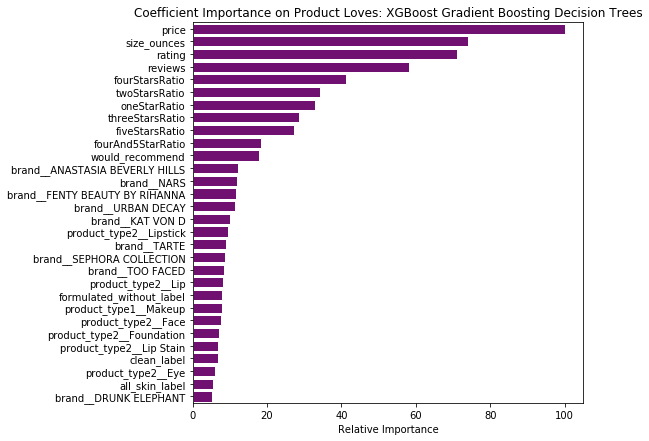

(1354, 1)
              0
0   3278.061035
1   5603.861816
2  54957.253906
3  11708.901367
4  22959.902344

XGBoost RMSE on the Train set for Product Loves is: 22258.152052022804
XGBoost RMSE on the Test set for Product Loves is: 34480.16804406469


In [525]:
y_train_predict = xgb_grid.predict(X_train)
y_test_predict = xgb_grid.predict(X_test)

# save results to DF
results = pd.Series(y_test_predict)
id_price = list(zip((y_test_predict)))
predictions = pd.DataFrame(id_price)

# plot important coeff
#importances = CV_RFR_regr.best_estimator_.feature_importances_
feature_importance = xgb_grid.best_estimator_.feature_importances_                 # gonna get an error here
feature_importance = 100 * (feature_importance / feature_importance.max())

sorted_index = np.argsort(feature_importance)
featimp = feature_importance[sorted_index]
feat = X_train.columns[sorted_index]
pos = np.arange(sorted_index.shape[0]) + .5

a = 0 
b = 30 # max features
c = b - a

featimp= featimp[::-1][a:b]
feat = feat[::-1][a:b]
pos = pos[::-1][a:b]

fig = plt.figure(figsize=(7,7))
plt.subplot2grid((1,1), (0,0))
with sns.axes_style("white"):
    ax = sns.barplot(y=feat, x=featimp, color = "purple")
plt.xlabel('Relative Importance')
plt.title('Coefficient Importance on Product Loves: XGBoost Gradient Boosting Decision Trees'.format(c))
plt.show()

print(predictions.shape)
print(predictions.head())
print("")

est_train = np.sqrt(mean_squared_error(y_train, y_train_predict))
print('XGBoost RMSE on the Train set for Product Loves is: {}'.format(est_train))

est_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
print('XGBoost RMSE on the Test set for Product Loves is: {}'.format(est_test))


## Product Loves: ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNetCV

X = sephoraLoves[['product_type1__Bath & Body', 'product_type1__Beauty Supplements', 'product_type1__Candles & Home Scents', 'product_type1__Fragrance', 'product_type1__Gifts', 'product_type1__Hair', 'product_type1__Hair Styling & Treatments', 'product_type1__High Tech Tools', 'product_type1__Makeup', 'product_type1__Makeup Palettes', 'product_type1__Men', 'product_type1__Mini Size', 'product_type1__Nail', 'product_type1__Self Tanners', 'product_type1__Shaving', 'product_type1__Skincare', 'product_type1__Tools & Brushes', 'product_type1__Value & Gift Sets', 'product_type2__Accessories', 'product_type2__Bath & Shower', 'product_type2__Best For', 'product_type2__Body Care', 'product_type2__Body Moisturizers', 'product_type2__Brushes & Applicators', 'product_type2__Cheek', 'product_type2__Cleansers', 'product_type2__Eye', 'product_type2__Eye Care', 'product_type2__Face', 'product_type2__Fragrance', 'product_type2__Hair', 'product_type2__Hair Styling & Treatments', 'product_type2__Hair Tools', 'product_type2__High Tech Tools', 'product_type2__Inner Beauty', 'product_type2__Lip', 'product_type2__Lip Treatments', 'product_type2__Makeup Brushes & Applicators', 'product_type2__Masks', 'product_type2__Men', 'product_type2__Moisturizers', 'product_type2__Other Needs', 'product_type2__Self Tanners', 'product_type2__Shampoo & Conditioner', 'product_type2__Shaving', 'product_type2__Skincare', 'product_type2__Sun Care', 'product_type2__Treatments', 'product_type2__Value & Gift Sets', 'product_type2__Women', 'product_type2__Aftershave', 'product_type2__Anti-Aging', 'product_type2__BB & CC Cream', 'product_type2__BB & CC Creams', 'product_type2__Bath & Body', 'product_type2__Bath & Shower.1', 'product_type2__Bath Soaks & Bubble Bath', 'product_type2__Beauty Supplements', 'product_type2__Blemish & Acne Treatments', 'product_type2__Blotting Papers', 'product_type2__Blush', 'product_type2__Body Lotions & Body Oils', 'product_type2__Body Mist & Hair Mist', 'product_type2__Body Products', 'product_type2__Body Sprays & Deodorant', 'product_type2__Body Sunscreen', 'product_type2__Body Wash & Shower Gel', 'product_type2__Bronzer', 'product_type2__Brush Cleaners', 'product_type2__Brush Sets', 'product_type2__Cellulite & Stretch Marks', 'product_type2__Cheek Palettes', 'product_type2__Cleansing', 'product_type2__Cleansing Brushes', 'product_type2__Co Wash & No Poo', 'product_type2__Cologne', 'product_type2__Cologne Gift Sets', 'product_type2__Color Care', 'product_type2__Color Correct', 'product_type2__Concealer', 'product_type2__Conditioner', 'product_type2__Contour', 'product_type2__Curling Irons', 'product_type2__Damaged Hair', 'product_type2__Decollete & Neck Creams', 'product_type2__Deodorant & Antiperspirant', 'product_type2__Deodorant for Men', 'product_type2__Dry Shampoo', 'product_type2__Exfoliators', 'product_type2__Eye Brushes', 'product_type2__Eye Cream', 'product_type2__Eye Creams & Treatments', 'product_type2__Eye Masks', 'product_type2__Eye Palettes', 'product_type2__Eye Primer', 'product_type2__Eye Sets', 'product_type2__Eyebrow', 'product_type2__Eyelash Curlers', 'product_type2__Eyeliner', 'product_type2__Eyeshadow', 'product_type2__Face Brushes', 'product_type2__Face Masks', 'product_type2__Face Oils', 'product_type2__Face Primer', 'product_type2__Face Serums', 'product_type2__Face Sets', 'product_type2__Face Sunscreen', 'product_type2__Face Wash', 'product_type2__Face Wash & Cleansers', 'product_type2__Face Wipes', 'product_type2__Facial Peels', 'product_type2__False Eyelashes', 'product_type2__For Body', 'product_type2__For Face', 'product_type2__Foundation', 'product_type2__Fragrance.1', 'product_type2__Hair.1', 'product_type2__Hair Accessories', 'product_type2__Hair Brushes & Combs', 'product_type2__Hair Color', 'product_type2__Hair Dryers', 'product_type2__Hair Masks', 'product_type2__Hair Oil', 'product_type2__Hair Primers', 'product_type2__Hair Products', 'product_type2__Hair Removal', 'product_type2__Hair Removal & Shaving', 'product_type2__Hair Spray', 'product_type2__Hair Straighteners & Flat Irons', 'product_type2__Hair Styling Products', 'product_type2__Hair Thinning & Hair Loss', 'product_type2__Hand Cream & Foot Cream', 'product_type2__Highlighter', 'product_type2__Leave-In Conditioner', 'product_type2__Lip Balm & Treatment', 'product_type2__Lip Balms & Treatments', 'product_type2__Lip Brushes', 'product_type2__Lip Gloss', 'product_type2__Lip Liner', 'product_type2__Lip Plumper', 'product_type2__Lip Sets', 'product_type2__Lip Stain', 'product_type2__Lip Sunscreen', 'product_type2__Lipstick', 'product_type2__Liquid Lipstick', 'product_type2__Lotions & Oils', 'product_type2__Makeup', 'product_type2__Makeup & Travel Cases', 'product_type2__Makeup Bags & Travel Cases', 'product_type2__Makeup Removers', 'product_type2__Mascara', 'product_type2__Men.1', 'product_type2__Mini Size', 'product_type2__Mirrors & Sharpeners', 'product_type2__Mists & Essences', 'product_type2__Moisturizer & Treatments', 'product_type2__Moisturizers.1', 'product_type2__Night Creams', 'product_type2__Perfume', 'product_type2__Perfume Gift Sets', 'product_type2__Rollerballs & Travel Size', 'product_type2__Scalp & Hair Treatments', 'product_type2__Scrub & Exfoliants', 'product_type2__Setting Spray & Powder', 'product_type2__Shampoo', 'product_type2__Shampoo & Conditioner.1', 'product_type2__Shaving.1', 'product_type2__Sheet Masks', 'product_type2__Skincare.1', 'product_type2__Skincare Sets', 'product_type2__Sponges & Applicators', 'product_type2__Sunscreen', 'product_type2__Teeth Whitening', 'product_type2__Tinted Moisturizer', 'product_type2__Toners', 'product_type2__Tools & Brushes', 'product_type2__Tweezers & Eyebrow Tools', 'product_type2__Under-Eye Concealer', 'product_type2__Water Bottles', 'brand__8GREENS', 'brand__ACQUA DI PARMA', 'brand__AERIN', 'brand__AETHER BEAUTY', 'brand__ALGENIST', 'brand__ALPHA-H', 'brand__ALTERNA HAIRCARE', 'brand__AMAZING COSMETICS', 'brand__AMIKA', 'brand__AMOREPACIFIC', 'brand__ANASTASIA BEVERLY HILLS', 'brand__ANTHONY', 'brand__ANTONYM', 'brand__APIVITA', 'brand__AQUIS', 'brand__ARTIS', 'brand__ARTIST COUTURE', 'brand__ATELIER COLOGNE', 'brand__BALENCIAGA', 'brand__BAREMINERALS', 'brand__BEAUTYBIO', 'brand__BEAUTYBLENDER', 'brand__BECCA', 'brand__BELIF', 'brand__BENEFIT COSMETICS', 'brand__BERDOUES', 'brand__BIO IONIC', 'brand__BIOEFFECT', 'brand__BIOSSANCE', 'brand__BITE BEAUTY', 'brand__BKR', 'brand__BLACK UP', 'brand__BLENDSMART', 'brand__BLINC', 'brand__BLINKING BEAUT', 'brand__BLITHE', 'brand__BOBBI BROWN', 'brand__BOSCIA', 'brand__BRIOGEO', 'brand__BSAME COSMETICS', 'brand__BUMBLE AND BUMBLE', 'brand__BURBERRY', 'brand__BUXOM', 'brand__BVLGARI', 'brand__BY ROSIE JANE', 'brand__CALVIN KLEIN', 'brand__CANE + AUSTIN', 'brand__CAPRI BLUE', 'brand__CAPTAIN BLANKENSHIP', 'brand__CAROLINA HERRERA', 'brand__CAUDALIE', 'brand__CELLU-CUP', 'brand__CHANEL', 'brand__CHARLOTTE TILBURY', 'brand__CHLO', 'brand__CHRISTIAN LOUBOUTIN', 'brand__CHRISTOPHE ROBIN', 'brand__CIAT LONDON', 'brand__CINEMA SECRETS', 'brand__CLARINS', 
                  'brand__CLARISONIC', 'brand__CLEAN', 'brand__CLINIQUE', 'brand__COAL AND CANARY', 'brand__COCOFLOSS', 'brand__COMME DES GARCONS', 'brand__COMMODITY', 'brand__COMPTOIR SUD PACIFIQUE', 'brand__CONTURE', 'brand__COOLA', 'brand__COVER FX', 'brand__CRUSHED TONIC', 'brand__DEBORAH LIPPMANN', 'brand__DEREK LAM 10 CROSBY', 'brand__DERMADOCTOR', 'brand__DERMAFLASH', 'brand__DERMARCHE LABS', 'brand__DEVACURL', 'brand__DIAMANCEL', 'brand__DIOR', 'brand__DISNEY COLLECTION', 'brand__DOLCE&GABBANA', 'brand__DOMINIQUE COSMETICS', 'brand__DONNA KARAN', 'brand__DPHUE', "brand__DR ROEBUCK'S", 'brand__DR. BRANDT SKINCARE', 'brand__DR. DENNIS GROSS SKINCARE', 'brand__DR. JART+', 'brand__DRUNK ELEPHANT', 'brand__DRYBAR', 'brand__DTRT', 'brand__DUO', 'brand__DYSON', 'brand__EARTHS NECTAR', 'brand__EDIBLE BEAUTY', 'brand__EIGHT & BOB', 'brand__ELIZABETH AND JAMES', 'brand__ELLIS BROOKLYN', 'brand__ERBORIAN', 'brand__ERNO LASZLO', 'brand__ESTE LAUDER', "brand__ETAT LIBRE D'ORANGE", 'brand__EVE LOM', 'brand__EVIAN', 'brand__FARMACY', 'brand__FARSLI', 'brand__FENTY BEAUTY BY RIHANNA', 'brand__FIRST AID BEAUTY', 'brand__FOREO', 'brand__FORM', 'brand__FOUR SIGMATIC', 'brand__FRESH', 'brand__GHD', 'brand__GIORGIO ARMANI BEAUTY', 'brand__GIVENCHY', 'brand__GLAMGLOW', 'brand__GLO SCIENCE', 'brand__GLOW RECIPE', 'brand__GO-TO', 'brand__GOOD DYE YOUNG', 'brand__GOOGLE', 'brand__GRANDE COSMETICS', 'brand__GUCCI', 'brand__GUERLAIN', 'brand__HERBIVORE', 'brand__HERMS', 'brand__HIGH BEAUTY', 'brand__HISTOIRES DE PARFUMS', 'brand__HOURGLASS', 'brand__HUDA BEAUTY', 'brand__HUM NUTRITION', 'brand__HUSH', 'brand__IGK', 'brand__ILUMINAGE', 'brand__INC.REDIBLE', 'brand__INDIE LEE', 'brand__INVISIBOBBLE', 'brand__ISLE OF PARADISE', 'brand__ISSEY MIYAKE', 'brand__IT COSMETICS', "brand__IT'S SKIN", 'brand__J.ONE', 'brand__JACK BLACK', 'brand__JIMMY CHOO', 'brand__JO MALONE LONDON', 'brand__JOHN VARVATOS', 'brand__JOSIE MARAN', 'brand__JOUER COSMETICS', 'brand__JUICY COUTURE', 'brand__JULIETTE HAS A GUN', 'brand__KAJA', 'brand__KANE NY', 'brand__KAT VON D', 'brand__KATE SOMERVILLE', 'brand__KATE SPADE NEW YORK', 'brand__KENZO', 'brand__KENZOKI', 'brand__KERANIQUE', 'brand__KEVYN AUCOIN', "brand__KIEHL'S SINCE 1851", 'brand__KILIAN', 'brand__KLORANE', 'brand__KOH GEN DO', 'brand__KOPARI', 'brand__KORA ORGANICS', 'brand__KORRES', 'brand__KOSAS', 'brand__KRASTASE', "brand__L'OCCITANE", 'brand__LA MER', 'brand__LAB SERIES FOR MEN', 'brand__LANCER', 'brand__LANCME', 'brand__LANEIGE', 'brand__LASHFOOD', 'brand__LAURA MERCIER', 'brand__LAVANILA', 'brand__LAWLESS', 'brand__LIGHTSTIM', 'brand__LILAH B.', 'brand__LILLY LASHES', 'brand__LIVING PROOF', 'brand__LORD JONES', 'brand__LXMI', 'brand__MADAM C.J. WALKER BEAUTY CULTURE', 'brand__MAELYS COSMETICS', 'brand__MAISON LOUIS MARIE', 'brand__MAISON MARGIELA', 'brand__MAKE UP FOR EVER', 'brand__MAKEUP ERASER', 'brand__MARC JACOBS BEAUTY', 'brand__MARC JACOBS FRAGRANCES', 'brand__MARIO BADESCU', 'brand__MARVIS', 'brand__MDSOLARSCIENCES', 'brand__MICHAEL KORS', 'brand__MILK MAKEUP', 'brand__MIU MIU', 'brand__MONTBLANC', 'brand__MOON JUICE', 'brand__MOROCCANOIL', 'brand__MOSCHINO', 'brand__MOUNT LAI', 'brand__MUGLER', 'brand__MURAD', 'brand__NAILS INC.', 'brand__NARCISO RODRIGUEZ', 'brand__NARS', 'brand__NATASHA DENONA', 'brand__NATURALLY SERIOUS', 'brand__NEOGEN DERMALOGY', 'brand__NEST', 'brand__NO MO-STACHE', 'brand__NUDESTIX', 'brand__NUFACE', 'brand__O&M', 'brand__OBAGI CLINICAL', 'brand__OLAPLEX', 'brand__OLEHENRIKSEN', 'brand__OMOROVICZA', 'brand__ORIGINS', 'brand__OUAI', 'brand__PACO RABANNE', 'brand__PAT MCGRATH LABS', 'brand__PEACE OUT', 'brand__PERRICONE MD', 'brand__PETER THOMAS ROTH', 'brand__PHILOSOPHY', 'brand__PHLUR', 'brand__PINK SUGAR', 'brand__PINROSE', 'brand__PLAYA', 'brand__PMD', 'brand__PRADA', 'brand__PRETTY VULGAR', 'brand__PRIMARY RAW', 'brand__PRIVATE DOCTOR', 'brand__PROACTIV', 'brand__PRORASO', 'brand__QHEMET BIOLOGICS', 'brand__RAG & BONE', 'brand__RAHUA', 'brand__RALPH LAUREN', 'brand__REN CLEAN SKINCARE', 'brand__REVERIE', 'brand__RITA HAZAN', 'brand__RMS BEAUTY', 'brand__RODIN OLIO LUSSO', 'brand__ROSEBUD PERFUME CO.', 'brand__ROSSANO FERRETTI PARMA', 'brand__SACHAJUAN', 'brand__SAND & SKY', 'brand__SATURDAY SKIN', 'brand__SEED PHYTONUTRIENTS', 'brand__SEPHORA COLLECTION', 'brand__SEPHORA FAVORITES', 'brand__SHAVEWORKS', 'brand__SHHHOWERCAP', 'brand__SHISEIDO', 'brand__SK-II', 'brand__SKIN INC SUPPLEMENT BAR', 'brand__SKIN LAUNDRY', 'brand__SLIP', 'brand__SMASHBOX', 'brand__SOL DE JANEIRO', 'brand__SON & PARK', 'brand__ST. TROPEZ TANNING ESSENTIALS', 'brand__STACKEDSKINCARE', 'brand__STELLA MCCARTNEY', 'brand__STELLAR', 'brand__STILA', 'brand__SUMMER FRIDAYS', 'brand__SUNDAY RILEY', 'brand__SUPERGOOP!', 'brand__SURRATT BEAUTY', 'brand__T3', 'brand__TAN-LUXE', 'brand__TANGLE TEEZER', 'brand__TARTE', 'brand__TASTE BEAUTY', 'brand__TATA HARPER', 'brand__TATCHA', 'brand__THE 7 VIRTUES', 'brand__THE ART OF SHAVING', 'brand__THE BEAUTY CHEF', 'brand__THE ORDINARY', 'brand__TOCCA', 'brand__TOKYOMILK', 'brand__TOM FORD', 'brand__TOO COOL FOR SCHOOL', 'brand__TOO FACED', 'brand__TORY BURCH', 'brand__TOUCH IN SOL', 'brand__TRSTIQUE', 'brand__TWEEZERMAN', 'brand__URBAN DECAY', 'brand__VELOUR LASHES', 'brand__VERB', 'brand__VERNON FRANCOIS', 'brand__VERSACE', 'brand__VIKTOR&ROLF', 'brand__VIOLET VOSS', 'brand__VISEART', 'brand__VITA LIBERATA', 'brand__VITAL PROTEINS', 'brand__VITRUVI', 'brand__VOLITION BEAUTY', 'brand__VOLUSPA', 'brand__WANDER BEAUTY', 'brand__WELL-KEPT', 'brand__WELLECO', 'brand__WINKY LUX', 'brand__YOUTH TO THE PEOPLE', 'brand__YUNI', 'brand__YVES SAINT LAURENT', 'size_ounces__ 0.1 ', 'size_ounces__ 0.118 ', 'size_ounces__ 0.12 ', 'size_ounces__ 0.13 ', 'size_ounces__ 0.14 ', 'size_ounces__ 0.16 ', 'size_ounces__ 0.19 ', 'size_ounces__ 0.2 ', 'size_ounces__ 0.21 ', 'size_ounces__ 0.22 ', 'size_ounces__ 0.23 ', 'size_ounces__ 0.24 ', 'size_ounces__ 0.25 ', 'size_ounces__ 0.27 ', 'size_ounces__ 0.30 ', 'size_ounces__ 0.32 ', 'size_ounces__ 0.33 ', 'size_ounces__ 0.34 ', 'size_ounces__ 0.35 ', 'size_ounces__ 0.37 ', 'size_ounces__ 0.4 ', 'size_ounces__ 0.5 ', 'size_ounces__ 0.50 ', 'size_ounces__ 0.51 ', 'size_ounces__ 0.66 ', 'size_ounces__ 0.67 ', 'size_ounces__ 0.68 ', 'size_ounces__ 0.7 ', 'size_ounces__ 0.75 ', 'size_ounces__ 0.8 ', 'size_ounces__ 0.84 ', 'size_ounces__ 0.85 ', 'size_ounces__ 1 ', 'size_ounces__ 1.01 ', 'size_ounces__ 1.08 ', 'size_ounces__ 1.12 ', 'size_ounces__ 1.18 ', 'size_ounces__ 1.2 ', 'size_ounces__ 1.25 ', 'size_ounces__ 1.3 ', 'size_ounces__ 1.35 ', 'size_ounces__ 1.4 ', 'size_ounces__ 1.41 ', 'size_ounces__ 1.5 ', 'size_ounces__ 1.52 ', 'size_ounces__ 1.6 ', 'size_ounces__ 1.67 ', 'size_ounces__ 1.68 ', 'size_ounces__ 1.69', 'size_ounces__ 1.69 ', 'size_ounces__ 1.7 ', 'size_ounces__ 1.70 ', 'size_ounces__ 1.75 ', 'size_ounces__ 1.76 ', 'size_ounces__ 10 ', 'size_ounces__ 10.1 ', 'size_ounces__ 10.15 ', 'size_ounces__ 10.2 ', 
                  'size_ounces__ 10.5 ', 'size_ounces__ 10.6 ', 'size_ounces__ 10.8 ', 'size_ounces__ 12 ', 'size_ounces__ 13 ', 'size_ounces__ 13.4 ', 'size_ounces__ 13.5 ', 'size_ounces__ 14.1 ', 'size_ounces__ 16 ', 'size_ounces__ 16.5 ', 'size_ounces__ 16.9 ', 'size_ounces__ 2 ', 'size_ounces__ 2.1 ', 'size_ounces__ 2.2 ', 'size_ounces__ 2.3 ', 'size_ounces__ 2.4 ', 'size_ounces__ 2.5 ', 'size_ounces__ 2.53 ', 'size_ounces__ 2.54 ', 'size_ounces__ 2.6 ', 'size_ounces__ 2.7 ', 'size_ounces__ 2.8 ', 'size_ounces__ 3 ', 'size_ounces__ 3.1 ', 'size_ounces__ 3.2 ', 'size_ounces__ 3.3 ', 'size_ounces__ 3.33 ', 'size_ounces__ 3.38 ', 'size_ounces__ 3.4 ', 'size_ounces__ 3.5 ', 'size_ounces__ 3.6 ', 'size_ounces__ 3.7 ', 'size_ounces__ 3.8 ', 'size_ounces__ 32 ', 'size_ounces__ 4 ', 'size_ounces__ 4.0 ', 'size_ounces__ 4.1 ', 'size_ounces__ 4.2 ', 'size_ounces__ 4.3 ', 'size_ounces__ 4.4 ', 'size_ounces__ 4.5 ', 'size_ounces__ 4.7 ', 'size_ounces__ 4.75 ', 'size_ounces__ 5 ', 'size_ounces__ 5.07 ', 'size_ounces__ 5.1 ', 'size_ounces__ 5.2 ', 'size_ounces__ 5.3 ', 'size_ounces__ 5.4 ', 'size_ounces__ 5.41 ', 'size_ounces__ 5.5 ', 'size_ounces__ 5.9 ', 'size_ounces__ 6 ', 'size_ounces__ 6.2 ', 'size_ounces__ 6.3 ', 'size_ounces__ 6.5 ', 'size_ounces__ 6.7 ', 'size_ounces__ 6.75 ', 'size_ounces__ 6.8 ', 'size_ounces__ 6.9 ', 'size_ounces__ 7 ', 'size_ounces__ 7.0 ', 'size_ounces__ 7.1 ', 'size_ounces__ 7.3 ', 'size_ounces__ 7.5 ', 'size_ounces__ 7.7 ', 'size_ounces__ 8 ', 'size_ounces__ 8.1 ', 'size_ounces__ 8.2 ', 'size_ounces__ 8.33 ', 'size_ounces__ 8.4 ', 'size_ounces__ 8.45 ', 'size_ounces__ 8.5 ', 'size_ounces__ 9 ', 'size_ounces__ 9.3 ', 'size_ounces__.001 ', 'size_ounces__.004 ', 'size_ounces__.01 ', 'size_ounces__.016 ', 'size_ounces__.02 ', 'size_ounces__.03 ', 'size_ounces__.04 ', 'size_ounces__.041 ', 'size_ounces__.045 ', 'size_ounces__.056 ', 'size_ounces__.12 ', 'size_ounces__.15 ', 'size_ounces__.16 ', 'size_ounces__.17 ', 'size_ounces__.20 ', 'size_ounces__.23 ', 'size_ounces__.24 ', 'size_ounces__.25 ', 'size_ounces__.27', 'size_ounces__.27 ', 'size_ounces__.28 ', 'size_ounces__.31 ', 'size_ounces__.32 ', 'size_ounces__.33', 'size_ounces__.33 ', 'size_ounces__.34', 'size_ounces__.35 ', 'size_ounces__.38 ', 'size_ounces__.42 ', 'size_ounces__.46 ', 'size_ounces__.49 ', 'size_ounces__.5 ', 'size_ounces__.50 ', 'size_ounces__.85 ', 'size_ounces__0 ', 'size_ounces__0.002 ', 'size_ounces__0.003 ', 'size_ounces__0.0038 ', 'size_ounces__0.004 ', 'size_ounces__0.005 ', 'size_ounces__0.0056 ', 'size_ounces__0.007 ', 'size_ounces__0.0088 ', 'size_ounces__0.009 ', 'size_ounces__0.01 ', 'size_ounces__0.012 ', 'size_ounces__0.016 ', 'size_ounces__0.017 ', 'size_ounces__0.0176 ', 'size_ounces__0.018 ', 'size_ounces__0.019 ', 'size_ounces__0.02 ', 'size_ounces__0.023 ', 'size_ounces__0.025 ', 'size_ounces__0.028 ', 'size_ounces__0.03 ', 'size_ounces__0.034 ', 'size_ounces__0.035 ', 'size_ounces__0.036 ', 'size_ounces__0.037 ', 'size_ounces__0.04 ', 'size_ounces__0.042 ', 'size_ounces__0.045 ', 'size_ounces__0.047 ', 'size_ounces__0.048 ', 'size_ounces__0.049 ', 'size_ounces__0.05 ', 'size_ounces__0.052 ', 'size_ounces__0.054 ', 'size_ounces__0.056 ', 'size_ounces__0.059 ', 'size_ounces__0.06 ', 'size_ounces__0.067 ', 'size_ounces__0.07 ', 'size_ounces__0.074 ', 'size_ounces__0.08 ', 'size_ounces__0.084 ', 'size_ounces__0.085 ', 'size_ounces__0.086 ', 'size_ounces__0.087 ', 'size_ounces__0.088 ', 'size_ounces__0.09 ', 'size_ounces__0.0915 ', 'size_ounces__0.096 ', 'size_ounces__0.1 ', 'size_ounces__0.10 ', 'size_ounces__0.105 ', 'size_ounces__0.106 ', 'size_ounces__0.11 ', 'size_ounces__0.118 ', 'size_ounces__0.12 ', 'size_ounces__0.123 ', 'size_ounces__0.13 ', 'size_ounces__0.134 ', 'size_ounces__0.135 ', 'size_ounces__0.139 ', 'size_ounces__0.14', 'size_ounces__0.14 ', 'size_ounces__0.141 ', 'size_ounces__0.15 ', 'size_ounces__0.153 ', 'size_ounces__0.16 ', 'size_ounces__0.169 ', 'size_ounces__0.17', 'size_ounces__0.17 ', 'size_ounces__0.18 ', 'size_ounces__0.19 ', 'size_ounces__0.192 ', 'size_ounces__0.2 ', 'size_ounces__0.20 ', 'size_ounces__0.208 ', 'size_ounces__0.21 ', 'size_ounces__0.22 ', 'size_ounces__0.23 ', 'size_ounces__0.24 ', 'size_ounces__0.247 ', 'size_ounces__0.25 ', 'size_ounces__0.26 ', 'size_ounces__0.264 ', 'size_ounces__0.27', 'size_ounces__0.27 ', 'size_ounces__0.28 ', 'size_ounces__0.282 ', 'size_ounces__0.29 ', 'size_ounces__0.3', 'size_ounces__0.3 ', 'size_ounces__0.30 ', 'size_ounces__0.31 ', 'size_ounces__0.32 ', 'size_ounces__0.33', 'size_ounces__0.33 ', 'size_ounces__0.34', 'size_ounces__0.34 ', 'size_ounces__0.35 ', 'size_ounces__0.36 ', 'size_ounces__0.37 ', 'size_ounces__0.38 ', 'size_ounces__0.39 ', 'size_ounces__0.4', 'size_ounces__0.4 ', 'size_ounces__0.40 ', 'size_ounces__0.41 ', 'size_ounces__0.42 ', 'size_ounces__0.43 ', 'size_ounces__0.44 ', 'size_ounces__0.45 ', 'size_ounces__0.46 ', 'size_ounces__0.47 ', 'size_ounces__0.48 ', 'size_ounces__0.49', 'size_ounces__0.49 ', 'size_ounces__0.5 ', 'size_ounces__0.50 ', 'size_ounces__0.51 ', 'size_ounces__0.52 ', 'size_ounces__0.53 ', 'size_ounces__0.54 ', 'size_ounces__0.55 ', 'size_ounces__0.56 ', 'size_ounces__0.6 ', 'size_ounces__0.61 ', 'size_ounces__0.63 ', 'size_ounces__0.66 ', 'size_ounces__0.67', 'size_ounces__0.67 ', 'size_ounces__0.68 ', 'size_ounces__0.7 ', 'size_ounces__0.70 ', 'size_ounces__0.74 ', 'size_ounces__0.75 ', 'size_ounces__0.76 ', 'size_ounces__0.77 ', 'size_ounces__0.78 ', 'size_ounces__0.8 ', 'size_ounces__0.84 ', 'size_ounces__0.85 ', 'size_ounces__0.87 ', 'size_ounces__0.88 ', 'size_ounces__0.89 ', 'size_ounces__0.9', 'size_ounces__0.9 ', 'size_ounces__0.94 ', 'size_ounces__0.95 ', 'size_ounces__0.98 ', 'size_ounces__00.6 ', 'size_ounces__1', 'size_ounces__1 ', 'size_ounces__1.0 ', 'size_ounces__1.01 ', 'size_ounces__1.014 ', 'size_ounces__1.02 ', 'size_ounces__1.04 ', 'size_ounces__1.05 ', 'size_ounces__1.06 ', 'size_ounces__1.08 ', 'size_ounces__1.1 ', 'size_ounces__1.14 ', 'size_ounces__1.17 ', 'size_ounces__1.18 ', 'size_ounces__1.2 ', 'size_ounces__1.23 ', 'size_ounces__1.3 ', 'size_ounces__1.33 ', 'size_ounces__1.34 ', 'size_ounces__1.35 ', 'size_ounces__1.4 ', 'size_ounces__1.41 ', 'size_ounces__1.5 ', 'size_ounces__1.52 ', 'size_ounces__1.6', 'size_ounces__1.6 ', 'size_ounces__1.61 ', 'size_ounces__1.64 ', 'size_ounces__1.65 ', 'size_ounces__1.67 ', 'size_ounces__1.68 ', 'size_ounces__1.69', 'size_ounces__1.69 ', 'size_ounces__1.7', 'size_ounces__1.7 ', 'size_ounces__1.75 ', 'size_ounces__1.76 ', 'size_ounces__1.8', 'size_ounces__1.8 ', 'size_ounces__1.86 ', 'size_ounces__1.9 ', 'size_ounces__10 ', 'size_ounces__10.1 ', 'size_ounces__10.14 ', 'size_ounces__10.2 ', 'size_ounces__10.37 ', 'size_ounces__11 ', 'size_ounces__11.1 ', 'size_ounces__11.2 ', 'size_ounces__11.49 ', 'size_ounces__11.5 ', 'size_ounces__11.8 ', 'size_ounces__12 ', 'size_ounces__12.5 ', 'size_ounces__123 ', 'size_ounces__13.5 ', 'size_ounces__16 ', 'size_ounces__16.9 ', 'size_ounces__19 ', 'size_ounces__2', 'size_ounces__2 ', 'size_ounces__2.0 ', 'size_ounces__2.02 ', 'size_ounces__2.029 ', 'size_ounces__2.03 ', 'size_ounces__2.1 ', 'size_ounces__2.12 ', 'size_ounces__2.14 ', 'size_ounces__2.2 ', 'size_ounces__2.25 ', 'size_ounces__2.3 ', 'size_ounces__2.36 ', 'size_ounces__2.37 ', 'size_ounces__2.4 ', 'size_ounces__2.47 ', 'size_ounces__2.5', 'size_ounces__2.5 ', 'size_ounces__2.53 ', 'size_ounces__2.54', 'size_ounces__2.54 ', 'size_ounces__2.6 ', 'size_ounces__2.65 ',
                  'size_ounces__2.7 ', 'size_ounces__2.70 ', 'size_ounces__2.75 ', 'size_ounces__2.8 ', 'size_ounces__2.82 ', 'size_ounces__2.87 ', 'size_ounces__21.1 ', 'size_ounces__22 ', 'size_ounces__3 ', 'size_ounces__3.0 ', 'size_ounces__3.04 ', 'size_ounces__3.17 ', 'size_ounces__3.2 ', 'size_ounces__3.3 ', 'size_ounces__3.38 ', 'size_ounces__3.39 ', 'size_ounces__3.4', 'size_ounces__3.4 ', 'size_ounces__3.5 ', 'size_ounces__3.52 ', 'size_ounces__3.53 ', 'size_ounces__3.6 ', 'size_ounces__3.65 ', 'size_ounces__3.75 ', 'size_ounces__3.8 ', 'size_ounces__3.9 ', 'size_ounces__32 ', 'size_ounces__4', 'size_ounces__4 ', 'size_ounces__4.0 ', 'size_ounces__4.05 ', 'size_ounces__4.08 ', 'size_ounces__4.1 ', 'size_ounces__4.2 ', 'size_ounces__4.22 ', 'size_ounces__4.25 ', 'size_ounces__4.3 ', 'size_ounces__4.35 ', 'size_ounces__4.39 ', 'size_ounces__4.4 ', 'size_ounces__4.5 ', 'size_ounces__4.6 ', 'size_ounces__4.7 ', 'size_ounces__4.73 ', 'size_ounces__4.75 ', 'size_ounces__4.8 ', 'size_ounces__4.9 ', 'size_ounces__5 ', 'size_ounces__5.0 ', 'size_ounces__5.06 ', 'size_ounces__5.07 ', 'size_ounces__5.1 ', 'size_ounces__5.2 ', 'size_ounces__5.25 ', 'size_ounces__5.29 ', 'size_ounces__5.3 ', 'size_ounces__5.4 ', 'size_ounces__5.5 ', 'size_ounces__5.6 ', 'size_ounces__5.7 ', 'size_ounces__5.8 ', 'size_ounces__5.82 ', 'size_ounces__5.9', 'size_ounces__5.9 ', 'size_ounces__5.99 ', 'size_ounces__6 ', 'size_ounces__6.1 ', 'size_ounces__6.17 ', 'size_ounces__6.2', 'size_ounces__6.25 ', 'size_ounces__6.3 ', 'size_ounces__6.4 ', 'size_ounces__6.5', 'size_ounces__6.5 ', 'size_ounces__6.59 ', 'size_ounces__6.6 ', 'size_ounces__6.7 ', 'size_ounces__6.75 ', 'size_ounces__6.76 ', 'size_ounces__6.8 ', 'size_ounces__6.9 ', 'size_ounces__7 ', 'size_ounces__7.0 ', 'size_ounces__7.05 ', 'size_ounces__7.1 ', 'size_ounces__7.2 ', 'size_ounces__7.5 ', 'size_ounces__7.6 ', 'size_ounces__7.7 ', 'size_ounces__7.75 ', 'size_ounces__8 ', 'size_ounces__8.1', 'size_ounces__8.1 ', 'size_ounces__8.2 ', 'size_ounces__8.3 ', 'size_ounces__8.33 ', 'size_ounces__8.4 ', 'size_ounces__8.45 ', 'size_ounces__8.5 ', 'size_ounces__8.8 ', 'size_ounces__8.9 ', 'size_ounces__9 ', 'size_ounces__9.3 ', 'size_ounces__9.9 ', 'discounted_value_label', 'on_sale_label', 'val_normal_skin_label', 'oily_skin_label', 'dry_skin_label', 'combination_skin_label', 'sensitive_skin_label', 'all_skin_label', 'vegan_label', 'tested_label', 'research_label', 'formulated_without_label', 'clean_label', 'oneStarRatio', 'twoStarsRatio', 'threeStarsRatio', 'fourStarsRatio', 'fiveStarsRatio', 'fourAnd5StarRatio', 'fourAnd5StarRatio_rounded', 'fourAnd5Star_above_below_avg', 'price__2.0', 'price__4.0', 'price__4.9', 'price__5.0', 'price__5.3', 'price__5.8', 'price__5.9', 'price__6.0', 'price__6.5', 'price__6.7', 'price__6.8', 'price__7.0', 'price__7.2', 'price__7.5', 'price__7.9', 'price__8.0', 'price__8.5', 'price__8.7', 'price__8.9', 'price__9.0', 'price__9.2', 'price__9.5', 'price__9.8', 'price__9.99', 'price__10.0', 'price__10.5', 'price__11.0', 'price__11.5', 'price__12.0', 'price__12.5', 'price__13.0', 'price__13.5', 'price__14.0', 'price__14.5', 'price__14.8', 'price__15.0', 'price__16.0', 'price__16.5', 'price__17.0', 'price__17.5', 'price__17.8', 'price__18.0', 'price__18.5', 'price__19.0', 'price__19.5', 'price__19.99', 'price__20.0', 'price__20.5', 'price__21.0', 'price__21.5', 'price__22.0', 'price__22.5', 'price__23.0', 'price__23.5', 'price__24.0', 'price__25.0', 'price__26.0', 'price__26.5', 'price__27.0', 'price__27.5', 'price__28.0', 'price__28.9', 'price__29.0', 'price__29.5', 'price__30.0', 'price__30.5', 'price__31.0', 'price__32.0', 'price__32.5', 'price__33.0', 'price__33.5', 'price__34.0', 'price__34.5', 'price__35.0', 'price__36.0', 'price__37.0', 'price__37.5', 'price__38.0', 'price__38.5', 'price__39.0', 'price__39.5', 'price__40.0', 'price__41.0', 'price__41.5', 'price__42.0', 'price__43.0', 'price__43.5', 'price__44.0', 'price__44.5', 'price__45.0', 'price__46.0', 'price__47.0', 'price__48.0', 'price__49.0', 'price__49.5', 'price__50.0', 'price__51.0', 'price__52.0', 'price__53.0', 'price__54.0', 'price__55.0', 'price__56.0', 'price__57.0', 'price__58.0', 'price__59.0', 'price__60.0', 'price__61.0', 'price__62.0', 'price__63.0', 'price__64.0', 'price__65.0', 'price__66.0', 'price__67.0', 'price__68.0', 'price__69.0', 'price__70.0', 'price__71.0', 'price__72.0', 'price__73.0', 'price__74.0', 'price__75.0', 'price__76.0', 'price__76.5', 'price__77.0', 'price__78.0', 'price__79.0', 'price__80.0', 'price__81.0', 'price__82.0', 'price__83.0', 'price__84.0', 'price__85.0', 'price__86.0', 'price__87.0', 'price__88.0', 'price__89.0', 'price__90.0', 'price__91.0', 'price__92.0', 'price__93.0', 'price__94.0', 'price__95.0', 'price__96.0', 'price__97.0', 'price__98.0', 'price__99.0', 'price__100.0', 'price__101.0', 'price__102.0', 'price__103.0', 'price__104.0', 'price__105.0', 'price__106.0', 'price__107.0', 'price__108.0', 'price__110.0', 'price__112.0', 'price__113.0', 'price__114.0', 'price__115.0', 'price__116.0', 'price__117.0', 'price__118.0', 'price__119.0', 'price__120.0', 'price__122.0', 'price__123.0', 'price__124.0', 'price__125.0', 'price__126.0', 'price__127.0', 'price__128.0', 'price__129.0', 'price__130.0', 'price__132.0', 'price__133.0', 'price__135.0', 'price__136.0', 'price__137.0', 'price__138.0', 'price__139.0', 'price__140.0', 'price__144.0', 'price__145.0', 'price__146.0', 'price__148.0', 'price__149.0', 'price__150.0', 'price__151.0', 'price__152.0', 'price__153.0', 'price__154.0', 'price__155.0', 'price__158.0', 'price__159.0', 'price__160.0', 'price__162.0', 'price__165.0', 'price__169.0', 'price__170.0', 'price__171.0', 'price__172.0', 'price__175.0', 'price__179.0', 'price__180.0', 'price__182.0', 'price__185.0', 'price__188.0', 'price__189.0', 'price__190.0', 'price__195.0', 'price__199.0', 'price__200.0', 'price__205.0', 'price__210.0', 'price__215.0', 'price__219.0', 'price__223.5', 'price__225.0', 'price__229.0', 'price__230.0', 'price__235.0', 'price__239.0', 'price__240.0', 'price__245.0', 'price__249.0', 'price__250.0', 'price__255.0', 'price__260.0', 'price__265.0', 'price__270.0', 'price__275.0', 'price__279.0', 'price__285.0', 'price__290.0', 'price__295.0', 'price__296.0', 'price__300.0', 'price__305.0', 'price__306.0', 'price__320.0', 'price__325.0', 'price__335.0', 'price__345.0', 'price__349.0', 'price__370.0', 'price__385.0', 'price__399.0', 'price__429.0', 'price__435.0', 'price__445.0', 'price__455.0', 'price__490.0', 'price__495.0', 'price__499.0', 'price__549.0', 'rating__3.2', 'rating__3.3', 'rating__3.4', 'rating__3.5', 'rating__3.6', 'rating__3.7', 'rating__3.8', 'rating__3.9', 'rating__4.0', 'rating__4.1', 'rating__4.2', 'rating__4.3', 'rating__4.4', 'rating__4.5', 'rating__4.6', 'rating__4.7', 'rating__4.8', 'rating__4.9', 'rating__5.0', 'NumOfReviews__1', 'NumOfReviews__2', 'NumOfReviews__3', 'NumOfReviews__4', 'NumOfReviews__5', 'NumOfReviews__6', 'NumOfReviews__7', 'NumOfReviews__8', 'NumOfReviews__9', 'NumOfReviews__10', 'NumOfReviews__11', 'NumOfReviews__12', 'NumOfReviews__13', 'NumOfReviews__14', 'NumOfReviews__15', 'NumOfReviews__16', 'NumOfReviews__17', 'NumOfReviews__18', 'NumOfReviews__19', 'NumOfReviews__20', 'NumOfReviews__21', 'NumOfReviews__22', 'NumOfReviews__23', 'NumOfReviews__24', 'NumOfReviews__25', 'NumOfReviews__26', 'NumOfReviews__27', 'NumOfReviews__28', 'NumOfReviews__29', 'NumOfReviews__30', 'NumOfReviews__31', 'NumOfReviews__32',
                  'NumOfReviews__33', 'NumOfReviews__34', 'NumOfReviews__35', 'NumOfReviews__36', 'NumOfReviews__37', 'NumOfReviews__38', 'NumOfReviews__39', 'NumOfReviews__40', 'NumOfReviews__41', 'NumOfReviews__42', 'NumOfReviews__43', 'NumOfReviews__44', 'NumOfReviews__45', 'NumOfReviews__46', 'NumOfReviews__47', 'NumOfReviews__48', 'NumOfReviews__49', 'NumOfReviews__50', 'NumOfReviews__51', 'NumOfReviews__52', 'NumOfReviews__53', 'NumOfReviews__54', 'NumOfReviews__55', 'NumOfReviews__56', 'NumOfReviews__57', 'NumOfReviews__58', 'NumOfReviews__59', 'NumOfReviews__60', 'NumOfReviews__61', 'NumOfReviews__62', 'NumOfReviews__63', 'NumOfReviews__64', 'NumOfReviews__65', 'NumOfReviews__66', 'NumOfReviews__67', 'NumOfReviews__68', 'NumOfReviews__69', 'NumOfReviews__70', 'NumOfReviews__71', 'NumOfReviews__72', 'NumOfReviews__73', 'NumOfReviews__74', 'NumOfReviews__75', 'NumOfReviews__76', 'NumOfReviews__77', 'NumOfReviews__78', 'NumOfReviews__79', 'NumOfReviews__80', 'NumOfReviews__81', 'NumOfReviews__82', 'NumOfReviews__83', 'NumOfReviews__84', 'NumOfReviews__85', 'NumOfReviews__86', 'NumOfReviews__87', 'NumOfReviews__88', 'NumOfReviews__89', 'NumOfReviews__100', 'NumOfReviews__101', 'NumOfReviews__102', 'NumOfReviews__103', 'NumOfReviews__104', 'NumOfReviews__105', 'NumOfReviews__106', 'NumOfReviews__107', 'NumOfReviews__108', 'NumOfReviews__109', 'NumOfReviews__110', 'NumOfReviews__111', 'NumOfReviews__112', 'NumOfReviews__113', 'NumOfReviews__114', 'NumOfReviews__115', 'NumOfReviews__116', 'NumOfReviews__117', 'NumOfReviews__118', 'NumOfReviews__119', 'NumOfReviews__120', 'NumOfReviews__121', 'NumOfReviews__122', 'NumOfReviews__123', 'NumOfReviews__124', 'NumOfReviews__125', 'NumOfReviews__126', 'NumOfReviews__127', 'NumOfReviews__128', 'NumOfReviews__129', 'NumOfReviews__130', 'NumOfReviews__131', 'NumOfReviews__132', 'NumOfReviews__133', 'NumOfReviews__134', 'NumOfReviews__135', 'NumOfReviews__136', 'NumOfReviews__137', 'NumOfReviews__138', 'NumOfReviews__139', 'NumOfReviews__140', 'NumOfReviews__141', 'NumOfReviews__142', 'NumOfReviews__143', 'NumOfReviews__144', 'NumOfReviews__145', 'NumOfReviews__146', 'NumOfReviews__147', 'NumOfReviews__148', 'NumOfReviews__149', 'NumOfReviews__150', 'NumOfReviews__151', 'NumOfReviews__152', 'NumOfReviews__153', 'NumOfReviews__154', 'NumOfReviews__155', 'NumOfReviews__156', 'NumOfReviews__157', 'NumOfReviews__158', 'NumOfReviews__159', 'NumOfReviews__160', 'NumOfReviews__161', 'NumOfReviews__162', 'NumOfReviews__163', 'NumOfReviews__164', 'NumOfReviews__165', 'NumOfReviews__166', 'NumOfReviews__167', 'NumOfReviews__168', 'NumOfReviews__169', 'NumOfReviews__170', 'NumOfReviews__171', 'NumOfReviews__172', 'NumOfReviews__173', 'NumOfReviews__174', 'NumOfReviews__175', 'NumOfReviews__176', 'NumOfReviews__177', 'NumOfReviews__178', 'NumOfReviews__179', 'NumOfReviews__180', 'NumOfReviews__181', 'NumOfReviews__182', 'NumOfReviews__183', 'NumOfReviews__184', 'NumOfReviews__185', 'NumOfReviews__186', 'NumOfReviews__187', 'NumOfReviews__188', 'NumOfReviews__189', 'NumOfReviews__190', 'NumOfReviews__191', 'NumOfReviews__192', 'NumOfReviews__193', 'NumOfReviews__194', 'NumOfReviews__195', 'NumOfReviews__196', 'NumOfReviews__197', 'NumOfReviews__198', 'NumOfReviews__199', 'NumOfReviews__200', 'NumOfReviews__201', 'NumOfReviews__203', 'NumOfReviews__204', 'NumOfReviews__205', 'NumOfReviews__206', 'NumOfReviews__207', 'NumOfReviews__208', 'NumOfReviews__209', 'NumOfReviews__210', 'NumOfReviews__211', 'NumOfReviews__212', 'NumOfReviews__213', 'NumOfReviews__214', 'NumOfReviews__215', 'NumOfReviews__216', 'NumOfReviews__217', 'NumOfReviews__218', 'NumOfReviews__219', 'NumOfReviews__220', 'NumOfReviews__221', 'NumOfReviews__222', 'NumOfReviews__223', 'NumOfReviews__224', 'NumOfReviews__225', 'NumOfReviews__226', 'NumOfReviews__227', 'NumOfReviews__228', 'NumOfReviews__229', 'NumOfReviews__230', 'NumOfReviews__231', 'NumOfReviews__232', 'NumOfReviews__233', 'NumOfReviews__234', 'NumOfReviews__235', 'NumOfReviews__236', 'NumOfReviews__237', 'NumOfReviews__238', 'NumOfReviews__239', 'NumOfReviews__240', 'NumOfReviews__241', 'NumOfReviews__242', 'NumOfReviews__243', 'NumOfReviews__244', 'NumOfReviews__245', 'NumOfReviews__246', 'NumOfReviews__247', 'NumOfReviews__248', 'NumOfReviews__249', 'NumOfReviews__250', 'NumOfReviews__251', 'NumOfReviews__252', 'NumOfReviews__253', 'NumOfReviews__254', 'NumOfReviews__255', 'NumOfReviews__256', 'NumOfReviews__257', 'NumOfReviews__258', 'NumOfReviews__259', 'NumOfReviews__260', 'NumOfReviews__261', 'NumOfReviews__262', 'NumOfReviews__263', 'NumOfReviews__264', 'NumOfReviews__265', 'NumOfReviews__266', 'NumOfReviews__267', 'NumOfReviews__268', 'NumOfReviews__269', 'NumOfReviews__270', 'NumOfReviews__271', 'NumOfReviews__272', 'NumOfReviews__273', 'NumOfReviews__274', 'NumOfReviews__275', 'NumOfReviews__276', 'NumOfReviews__277', 'NumOfReviews__278', 'NumOfReviews__279', 'NumOfReviews__280', 'NumOfReviews__281', 'NumOfReviews__282', 'NumOfReviews__284', 'NumOfReviews__285', 'NumOfReviews__286', 'NumOfReviews__287', 'NumOfReviews__288', 'NumOfReviews__289', 'NumOfReviews__290', 'NumOfReviews__291', 'NumOfReviews__292', 'NumOfReviews__293', 'NumOfReviews__294', 'NumOfReviews__295', 'NumOfReviews__296', 'NumOfReviews__297', 'NumOfReviews__298', 'NumOfReviews__299', 'NumOfReviews__300', 'NumOfReviews__301', 'NumOfReviews__302', 'NumOfReviews__303', 'NumOfReviews__304', 'NumOfReviews__305', 'NumOfReviews__306', 'NumOfReviews__307', 'NumOfReviews__309', 'NumOfReviews__311', 'NumOfReviews__312', 'NumOfReviews__313', 'NumOfReviews__314', 'NumOfReviews__315', 'NumOfReviews__316', 'NumOfReviews__317', 'NumOfReviews__318', 'NumOfReviews__319', 'NumOfReviews__320', 'NumOfReviews__321', 'NumOfReviews__322', 'NumOfReviews__323', 'NumOfReviews__324', 'NumOfReviews__325', 'NumOfReviews__326', 'NumOfReviews__327', 'NumOfReviews__328', 'NumOfReviews__330', 'NumOfReviews__331', 'NumOfReviews__332', 'NumOfReviews__333', 'NumOfReviews__334', 'NumOfReviews__335', 'NumOfReviews__336', 'NumOfReviews__337', 'NumOfReviews__338', 'NumOfReviews__339', 'NumOfReviews__340', 'NumOfReviews__341', 'NumOfReviews__342', 'NumOfReviews__343', 'NumOfReviews__344', 'NumOfReviews__345', 'NumOfReviews__346', 'NumOfReviews__347', 'NumOfReviews__348', 'NumOfReviews__349', 'NumOfReviews__351', 'NumOfReviews__352', 'NumOfReviews__353', 'NumOfReviews__354', 'NumOfReviews__355', 'NumOfReviews__357', 'NumOfReviews__358', 'NumOfReviews__359', 'NumOfReviews__360', 'NumOfReviews__361', 'NumOfReviews__362', 'NumOfReviews__363', 'NumOfReviews__364', 'NumOfReviews__365', 'NumOfReviews__366', 'NumOfReviews__367', 'NumOfReviews__368', 'NumOfReviews__369', 'NumOfReviews__370', 'NumOfReviews__372', 'NumOfReviews__373', 'NumOfReviews__374', 'NumOfReviews__376', 'NumOfReviews__377', 'NumOfReviews__378', 'NumOfReviews__379', 'NumOfReviews__380', 'NumOfReviews__381', 'NumOfReviews__382', 'NumOfReviews__383', 'NumOfReviews__384', 'NumOfReviews__385', 'NumOfReviews__387', 'NumOfReviews__389', 'NumOfReviews__390', 'NumOfReviews__391', 'NumOfReviews__393', 'NumOfReviews__394', 'NumOfReviews__395', 'NumOfReviews__396', 'NumOfReviews__397', 'NumOfReviews__398', 'NumOfReviews__399', 'NumOfReviews__400', 'NumOfReviews__401', 'NumOfReviews__402', 'NumOfReviews__403', 'NumOfReviews__404', 'NumOfReviews__405', 'NumOfReviews__407', 'NumOfReviews__408', 'NumOfReviews__409', 'NumOfReviews__410', 'NumOfReviews__411', 'NumOfReviews__412', 'NumOfReviews__413', 'NumOfReviews__414', 'NumOfReviews__415', 'NumOfReviews__416', 'NumOfReviews__418', 'NumOfReviews__419', 'NumOfReviews__420', 'NumOfReviews__421', 'NumOfReviews__422', 'NumOfReviews__423', 'NumOfReviews__424', 'NumOfReviews__425', 'NumOfReviews__426', 'NumOfReviews__427', 'NumOfReviews__428', 'NumOfReviews__429', 'NumOfReviews__430', 'NumOfReviews__431', 'NumOfReviews__434', 'NumOfReviews__435', 'NumOfReviews__437', 'NumOfReviews__439', 'NumOfReviews__440', 'NumOfReviews__442', 'NumOfReviews__443', 'NumOfReviews__444', 'NumOfReviews__445', 
                  'NumOfReviews__446', 'NumOfReviews__448', 'NumOfReviews__449', 'NumOfReviews__450', 'NumOfReviews__451', 'NumOfReviews__453', 'NumOfReviews__455', 'NumOfReviews__456', 'NumOfReviews__457', 'NumOfReviews__459', 'NumOfReviews__461', 'NumOfReviews__462', 'NumOfReviews__463', 'NumOfReviews__465', 'NumOfReviews__466', 'NumOfReviews__467', 'NumOfReviews__468', 'NumOfReviews__470', 'NumOfReviews__472', 'NumOfReviews__473', 'NumOfReviews__474', 'NumOfReviews__477', 'NumOfReviews__478', 'NumOfReviews__479', 'NumOfReviews__481', 'NumOfReviews__482', 'NumOfReviews__483', 'NumOfReviews__484', 'NumOfReviews__485', 'NumOfReviews__486', 'NumOfReviews__487', 'NumOfReviews__488', 'NumOfReviews__489', 'NumOfReviews__490', 'NumOfReviews__492', 'NumOfReviews__493', 'NumOfReviews__494', 'NumOfReviews__495', 'NumOfReviews__497', 'NumOfReviews__498', 'NumOfReviews__499', 'NumOfReviews__500', 'NumOfReviews__501', 'NumOfReviews__502', 'NumOfReviews__504', 'NumOfReviews__505', 'NumOfReviews__507', 'NumOfReviews__508', 'NumOfReviews__509', 'NumOfReviews__514', 'NumOfReviews__515', 'NumOfReviews__516', 'NumOfReviews__518', 'NumOfReviews__520', 'NumOfReviews__521', 'NumOfReviews__522', 'NumOfReviews__524', 'NumOfReviews__525', 'NumOfReviews__526', 'NumOfReviews__527', 'NumOfReviews__528', 'NumOfReviews__529', 'NumOfReviews__531', 'NumOfReviews__532', 'NumOfReviews__533', 'NumOfReviews__534', 'NumOfReviews__535', 'NumOfReviews__536', 'NumOfReviews__537', 'NumOfReviews__538', 'NumOfReviews__540', 'NumOfReviews__541', 'NumOfReviews__542', 'NumOfReviews__543', 'NumOfReviews__546', 'NumOfReviews__547', 'NumOfReviews__548', 'NumOfReviews__549', 'NumOfReviews__550', 'NumOfReviews__551', 'NumOfReviews__552', 'NumOfReviews__553', 'NumOfReviews__554', 'NumOfReviews__556', 'NumOfReviews__557', 'NumOfReviews__558', 'NumOfReviews__559', 'NumOfReviews__560', 'NumOfReviews__561', 'NumOfReviews__562', 'NumOfReviews__564', 'NumOfReviews__565', 'NumOfReviews__566', 'NumOfReviews__568', 'NumOfReviews__569', 'NumOfReviews__571', 'NumOfReviews__573', 'NumOfReviews__575', 'NumOfReviews__576', 'NumOfReviews__577', 'NumOfReviews__578', 'NumOfReviews__579', 'NumOfReviews__582', 'NumOfReviews__584', 'NumOfReviews__587', 'NumOfReviews__589', 'NumOfReviews__591', 'NumOfReviews__592', 'NumOfReviews__594', 'NumOfReviews__595', 'NumOfReviews__597', 'NumOfReviews__598', 'NumOfReviews__599', 'NumOfReviews__600', 'NumOfReviews__601', 'NumOfReviews__602', 'NumOfReviews__603', 'NumOfReviews__605', 'NumOfReviews__606', 'NumOfReviews__608', 'NumOfReviews__610', 'NumOfReviews__611', 'NumOfReviews__614', 'NumOfReviews__615', 'NumOfReviews__618', 'NumOfReviews__620', 'NumOfReviews__621', 'NumOfReviews__623', 'NumOfReviews__627', 'NumOfReviews__630', 'NumOfReviews__633', 'NumOfReviews__634', 'NumOfReviews__636', 'NumOfReviews__637', 'NumOfReviews__639', 'NumOfReviews__640', 'NumOfReviews__641', 'NumOfReviews__643', 'NumOfReviews__644', 'NumOfReviews__646', 'NumOfReviews__647', 'NumOfReviews__648', 'NumOfReviews__649', 'NumOfReviews__650', 'NumOfReviews__652', 'NumOfReviews__653', 'NumOfReviews__654', 'NumOfReviews__656', 'NumOfReviews__657', 'NumOfReviews__661', 'NumOfReviews__662', 'NumOfReviews__665', 'NumOfReviews__666', 'NumOfReviews__668', 'NumOfReviews__669', 'NumOfReviews__671', 'NumOfReviews__672', 'NumOfReviews__673', 'NumOfReviews__677', 'NumOfReviews__680', 'NumOfReviews__682', 'NumOfReviews__683', 'NumOfReviews__684', 'NumOfReviews__690', 'NumOfReviews__692', 'NumOfReviews__694', 'NumOfReviews__695', 'NumOfReviews__696', 'NumOfReviews__697', 'NumOfReviews__699', 'NumOfReviews__700', 'NumOfReviews__701', 'NumOfReviews__702', 'NumOfReviews__703', 'NumOfReviews__704', 'NumOfReviews__705', 'NumOfReviews__707', 'NumOfReviews__708', 'NumOfReviews__709', 'NumOfReviews__710', 'NumOfReviews__711', 'NumOfReviews__715', 'NumOfReviews__716', 'NumOfReviews__721', 'NumOfReviews__723', 'NumOfReviews__725', 'NumOfReviews__728', 'NumOfReviews__730', 'NumOfReviews__731', 'NumOfReviews__734', 'NumOfReviews__735', 'NumOfReviews__737', 'NumOfReviews__738', 'NumOfReviews__740', 'NumOfReviews__741', 'NumOfReviews__743', 'NumOfReviews__744', 'NumOfReviews__745', 'NumOfReviews__746', 'NumOfReviews__747', 'NumOfReviews__748', 'NumOfReviews__749', 'NumOfReviews__750', 'NumOfReviews__751', 'NumOfReviews__754', 'NumOfReviews__755', 'NumOfReviews__756', 'NumOfReviews__757', 'NumOfReviews__759', 'NumOfReviews__760', 'NumOfReviews__763', 'NumOfReviews__766', 'NumOfReviews__769', 'NumOfReviews__771', 'NumOfReviews__772', 'NumOfReviews__773', 'NumOfReviews__774', 'NumOfReviews__775', 'NumOfReviews__777', 'NumOfReviews__780', 'NumOfReviews__785', 'NumOfReviews__788', 'NumOfReviews__789', 'NumOfReviews__790', 'NumOfReviews__793', 'NumOfReviews__794', 'NumOfReviews__796', 'NumOfReviews__797', 'NumOfReviews__798', 'NumOfReviews__799', 'NumOfReviews__800', 'NumOfReviews__801', 'NumOfReviews__802', 'NumOfReviews__806', 'NumOfReviews__810', 'NumOfReviews__811', 'NumOfReviews__814', 'NumOfReviews__815', 'NumOfReviews__816', 'NumOfReviews__820', 'NumOfReviews__823', 'NumOfReviews__826', 'NumOfReviews__827', 'NumOfReviews__828', 'NumOfReviews__831', 'NumOfReviews__834', 'NumOfReviews__838', 'NumOfReviews__839', 'NumOfReviews__843', 'NumOfReviews__844', 'NumOfReviews__845', 'NumOfReviews__847', 'NumOfReviews__848', 'NumOfReviews__857', 'NumOfReviews__862', 'NumOfReviews__863', 'NumOfReviews__865', 'NumOfReviews__867', 'NumOfReviews__869', 'NumOfReviews__870', 'NumOfReviews__873', 'NumOfReviews__874', 'NumOfReviews__875', 'NumOfReviews__878', 'NumOfReviews__881', 'NumOfReviews__882', 'NumOfReviews__884', 'NumOfReviews__885', 'NumOfReviews__886', 'NumOfReviews__887', 'NumOfReviews__890', 'NumOfReviews__892', 'NumOfReviews__894', 'NumOfReviews__895', 'NumOfReviews__896', 'NumOfReviews__898', 'NumOfReviews__1002', 'NumOfReviews__1003', 'NumOfReviews__1005', 'NumOfReviews__1006', 'NumOfReviews__1009', 'NumOfReviews__1011', 'NumOfReviews__1012', 'NumOfReviews__1014', 'NumOfReviews__1019', 'NumOfReviews__1020', 'NumOfReviews__1023', 'NumOfReviews__1024', 'NumOfReviews__1026', 'NumOfReviews__1027', 'NumOfReviews__1034', 'NumOfReviews__1035', 'NumOfReviews__1037', 'NumOfReviews__1038', 'NumOfReviews__1041', 'NumOfReviews__1046', 'NumOfReviews__1049', 'NumOfReviews__1056', 'NumOfReviews__1057', 'NumOfReviews__1059', 'NumOfReviews__1060', 'NumOfReviews__1066', 'NumOfReviews__1068', 'NumOfReviews__1069', 'NumOfReviews__1071', 'NumOfReviews__1074', 'NumOfReviews__1077', 'NumOfReviews__1078', 'NumOfReviews__1079', 'NumOfReviews__1083', 'NumOfReviews__1084', 'NumOfReviews__1085', 'NumOfReviews__1092', 'NumOfReviews__1093', 'NumOfReviews__1095', 'NumOfReviews__1097', 'NumOfReviews__1098', 'NumOfReviews__1102', 'NumOfReviews__1105', 'NumOfReviews__1113', 'NumOfReviews__1114', 'NumOfReviews__1116', 'NumOfReviews__1117', 'NumOfReviews__1123', 'NumOfReviews__1129', 'NumOfReviews__1132', 'NumOfReviews__1135', 'NumOfReviews__1138', 'NumOfReviews__1141', 'NumOfReviews__1143', 'NumOfReviews__1144', 'NumOfReviews__1146', 'NumOfReviews__1149', 'NumOfReviews__1154', 'NumOfReviews__1157', 'NumOfReviews__1160', 'NumOfReviews__1166', 'NumOfReviews__1168', 'NumOfReviews__1169', 'NumOfReviews__1173', 'NumOfReviews__1175', 'NumOfReviews__1177', 'NumOfReviews__1178', 'NumOfReviews__1179', 'NumOfReviews__1180', 'NumOfReviews__1185', 'NumOfReviews__1187', 'NumOfReviews__1188', 'NumOfReviews__1192', 'NumOfReviews__1197', 'NumOfReviews__1203', 'NumOfReviews__1206', 'NumOfReviews__1209', 'NumOfReviews__1210', 'NumOfReviews__1213', 'NumOfReviews__1214', 'NumOfReviews__1220', 'NumOfReviews__1229', 'NumOfReviews__1234', 'NumOfReviews__1235', 'NumOfReviews__1237', 'NumOfReviews__1241', 'NumOfReviews__1244', 'NumOfReviews__1247', 'NumOfReviews__1248', 'NumOfReviews__1249', 'NumOfReviews__1251', 'NumOfReviews__1252', 'NumOfReviews__1256',
                  'NumOfReviews__1262', 'NumOfReviews__1264', 'NumOfReviews__1265', 'NumOfReviews__1267', 'NumOfReviews__1272', 'NumOfReviews__1273', 'NumOfReviews__1275', 'NumOfReviews__1276', 'NumOfReviews__1281', 'NumOfReviews__1290', 'NumOfReviews__1294', 'NumOfReviews__1299', 'NumOfReviews__1306', 'NumOfReviews__1311', 'NumOfReviews__1312', 'NumOfReviews__1313', 'NumOfReviews__1316', 'NumOfReviews__1318', 'NumOfReviews__1319', 'NumOfReviews__1320', 'NumOfReviews__1324', 'NumOfReviews__1326', 'NumOfReviews__1327', 'NumOfReviews__1329', 'NumOfReviews__1336', 'NumOfReviews__1348', 'NumOfReviews__1354', 'NumOfReviews__1356', 'NumOfReviews__1363', 'NumOfReviews__1368', 'NumOfReviews__1375', 'NumOfReviews__1378', 'NumOfReviews__1379', 'NumOfReviews__1383', 'NumOfReviews__1384', 'NumOfReviews__1396', 'NumOfReviews__1399', 'NumOfReviews__1409', 'NumOfReviews__1417', 'NumOfReviews__1427', 'NumOfReviews__1429', 'NumOfReviews__1431', 'NumOfReviews__1440', 'NumOfReviews__1446', 'NumOfReviews__1450', 'NumOfReviews__1455', 'NumOfReviews__1456', 'NumOfReviews__1463', 'NumOfReviews__1464', 'NumOfReviews__1469', 'NumOfReviews__1476', 'NumOfReviews__1477', 'NumOfReviews__1481', 'NumOfReviews__1486', 'NumOfReviews__1488', 'NumOfReviews__1496', 'NumOfReviews__1499', 'NumOfReviews__1500', 'NumOfReviews__1501', 'NumOfReviews__1503', 'NumOfReviews__1507', 'NumOfReviews__1511', 'NumOfReviews__1513', 'NumOfReviews__1516', 'NumOfReviews__1526', 'NumOfReviews__1540', 'NumOfReviews__1541', 'NumOfReviews__1543', 'NumOfReviews__1546', 'NumOfReviews__1551', 'NumOfReviews__1555', 'NumOfReviews__1556', 'NumOfReviews__1557', 'NumOfReviews__1564', 'NumOfReviews__1567', 'NumOfReviews__1568', 'NumOfReviews__1576', 'NumOfReviews__1578', 'NumOfReviews__1587', 'NumOfReviews__1588', 'NumOfReviews__1591', 'NumOfReviews__1600', 'NumOfReviews__1608', 'NumOfReviews__1615', 'NumOfReviews__1616', 'NumOfReviews__1617', 'NumOfReviews__1618', 'NumOfReviews__1619', 'NumOfReviews__1625', 'NumOfReviews__1632', 'NumOfReviews__1634', 'NumOfReviews__1637', 'NumOfReviews__1652', 'NumOfReviews__1653', 'NumOfReviews__1657', 'NumOfReviews__1660', 'NumOfReviews__1670', 'NumOfReviews__1671', 'NumOfReviews__1682', 'NumOfReviews__1697', 'NumOfReviews__1702', 'NumOfReviews__1705', 'NumOfReviews__1714', 'NumOfReviews__1718', 'NumOfReviews__1721', 'NumOfReviews__1727', 'NumOfReviews__1728', 'NumOfReviews__1730', 'NumOfReviews__1734', 'NumOfReviews__1738', 'NumOfReviews__1740', 'NumOfReviews__1744', 'NumOfReviews__1752', 'NumOfReviews__1763', 'NumOfReviews__1766', 'NumOfReviews__1769', 'NumOfReviews__1772', 'NumOfReviews__1780', 'NumOfReviews__1781', 'NumOfReviews__1783', 'NumOfReviews__1787', 'NumOfReviews__1799', 'NumOfReviews__1807', 'NumOfReviews__1811', 'NumOfReviews__1816', 'NumOfReviews__1820', 'NumOfReviews__1839', 'NumOfReviews__1847', 'NumOfReviews__1848', 'NumOfReviews__1851', 'NumOfReviews__1852', 'NumOfReviews__1854', 'NumOfReviews__1862', 'NumOfReviews__1864', 'NumOfReviews__1867', 'NumOfReviews__1873', 'NumOfReviews__1887', 'NumOfReviews__1892', 'NumOfReviews__1897', 'NumOfReviews__1915', 'NumOfReviews__1917', 'NumOfReviews__1920', 'NumOfReviews__1921', 'NumOfReviews__1923', 'NumOfReviews__1930', 'NumOfReviews__1936', 'NumOfReviews__1939', 'NumOfReviews__1941', 'NumOfReviews__1951', 'NumOfReviews__1953', 'NumOfReviews__1963', 'NumOfReviews__1964', 'NumOfReviews__1985', 'NumOfReviews__1997', 'NumOfReviews__2004', 'NumOfReviews__2009', 'NumOfReviews__2010', 'NumOfReviews__2022', 'NumOfReviews__2027', 'NumOfReviews__2032', 'NumOfReviews__2050', 'NumOfReviews__2053', 'NumOfReviews__2063', 'NumOfReviews__2064', 'NumOfReviews__2068', 'NumOfReviews__2070', 'NumOfReviews__2077', 'NumOfReviews__2083', 'NumOfReviews__2084', 'NumOfReviews__2086', 'NumOfReviews__2092', 'NumOfReviews__2100', 'NumOfReviews__2106', 'NumOfReviews__2111', 'NumOfReviews__2113', 'NumOfReviews__2119', 'NumOfReviews__2130', 'NumOfReviews__2131', 'NumOfReviews__2138', 'NumOfReviews__2147', 'NumOfReviews__2148', 'NumOfReviews__2168', 'NumOfReviews__2176', 'NumOfReviews__2186', 'NumOfReviews__2200', 'NumOfReviews__2203', 'NumOfReviews__2208', 'NumOfReviews__2225', 'NumOfReviews__2235', 'NumOfReviews__2237', 'NumOfReviews__2246', 'NumOfReviews__2251', 'NumOfReviews__2262', 'NumOfReviews__2271', 'NumOfReviews__2278', 'NumOfReviews__2280', 'NumOfReviews__2284', 'NumOfReviews__2295', 'NumOfReviews__2303', 'NumOfReviews__2305', 'NumOfReviews__2323', 'NumOfReviews__2327', 'NumOfReviews__2335', 'NumOfReviews__2342', 'NumOfReviews__2345', 'NumOfReviews__2353', 'NumOfReviews__2370', 'NumOfReviews__2375', 'NumOfReviews__2382', 'NumOfReviews__2384', 'NumOfReviews__2388', 'NumOfReviews__2395', 'NumOfReviews__2406', 'NumOfReviews__2416', 'NumOfReviews__2422', 'NumOfReviews__2435', 'NumOfReviews__2441', 'NumOfReviews__2444', 'NumOfReviews__2445', 'NumOfReviews__2453', 'NumOfReviews__2462', 'NumOfReviews__2483', 'NumOfReviews__2524', 'NumOfReviews__2533', 'NumOfReviews__2535', 'NumOfReviews__2550', 'NumOfReviews__2566', 'NumOfReviews__2567', 'NumOfReviews__2580', 'NumOfReviews__2582', 'NumOfReviews__2586', 'NumOfReviews__2588', 'NumOfReviews__2589', 'NumOfReviews__2609', 'NumOfReviews__2623', 'NumOfReviews__2631', 'NumOfReviews__2636', 'NumOfReviews__2642', 'NumOfReviews__2658', 'NumOfReviews__2665', 'NumOfReviews__2673', 'NumOfReviews__2682', 'NumOfReviews__2692', 'NumOfReviews__2749', 'NumOfReviews__2750', 'NumOfReviews__2797', 'NumOfReviews__2799', 'NumOfReviews__2802', 'NumOfReviews__2805', 'NumOfReviews__2809', 'NumOfReviews__2846', 'NumOfReviews__2848', 'NumOfReviews__2870', 'NumOfReviews__2886', 'NumOfReviews__2899', 'NumOfReviews__2907', 'NumOfReviews__2924', 'NumOfReviews__2932', 'NumOfReviews__2959', 'NumOfReviews__2990', 'NumOfReviews__2997', 'NumOfReviews__2999', 'NumOfReviews__3035', 'NumOfReviews__3036', 'NumOfReviews__3037', 'NumOfReviews__3040', 'NumOfReviews__3079', 'NumOfReviews__3087', 'NumOfReviews__3088', 'NumOfReviews__3092', 'NumOfReviews__3117', 'NumOfReviews__3119', 'NumOfReviews__3138', 'NumOfReviews__3145', 'NumOfReviews__3152', 'NumOfReviews__3154', 'NumOfReviews__3174', 'NumOfReviews__3236', 'NumOfReviews__3285', 'NumOfReviews__3291', 'NumOfReviews__3293', 'NumOfReviews__3304', 'NumOfReviews__3309', 'NumOfReviews__3329', 'NumOfReviews__3348', 'NumOfReviews__3376', 'NumOfReviews__3396', 'NumOfReviews__3405', 'NumOfReviews__3416', 'NumOfReviews__3438', 'NumOfReviews__3445', 'NumOfReviews__3449', 'NumOfReviews__3462', 'NumOfReviews__3464', 'NumOfReviews__3465', 'NumOfReviews__3528', 'NumOfReviews__3555', 'NumOfReviews__3567', 'NumOfReviews__3596', 'NumOfReviews__3618', 'NumOfReviews__3658', 'NumOfReviews__3664', 'NumOfReviews__3772', 'NumOfReviews__3804', 'NumOfReviews__3809', 'NumOfReviews__3843', 'NumOfReviews__3853', 'NumOfReviews__3860', 'NumOfReviews__3879', 'NumOfReviews__3955', 'NumOfReviews__4033', 'NumOfReviews__4103', 'NumOfReviews__4116', 'NumOfReviews__4128', 'NumOfReviews__4137', 'NumOfReviews__4161', 'NumOfReviews__4207', 'NumOfReviews__4229', 'NumOfReviews__4234', 'NumOfReviews__4350', 'NumOfReviews__4410', 'NumOfReviews__4441', 'NumOfReviews__4479', 'NumOfReviews__4575', 'NumOfReviews__4580', 'NumOfReviews__4596', 'NumOfReviews__4683', 'NumOfReviews__4717', 'NumOfReviews__4775', 'NumOfReviews__4817', 'NumOfReviews__4891', 'NumOfReviews__4907', 'NumOfReviews__4958', 'NumOfReviews__4959', 'NumOfReviews__5005', 'NumOfReviews__5052', 'NumOfReviews__5110', 'NumOfReviews__5148', 'NumOfReviews__5237', 'NumOfReviews__5300', 'NumOfReviews__5415', 'NumOfReviews__5477', 'NumOfReviews__5481', 'NumOfReviews__5604', 'NumOfReviews__5705', 'NumOfReviews__5758', 'NumOfReviews__5836', 'NumOfReviews__5951', 'NumOfReviews__6015', 'NumOfReviews__6242', 'NumOfReviews__6275', 'NumOfReviews__6296', 'NumOfReviews__6300', 'NumOfReviews__6307', 'NumOfReviews__6322', 'NumOfReviews__6608', 'NumOfReviews__6693', 'NumOfReviews__6702', 'NumOfReviews__6928', 'NumOfReviews__6955', 'NumOfReviews__6995', 'NumOfReviews__7159', 'NumOfReviews__7368', 'NumOfReviews__7605', 
                  'NumOfReviews__7758', 'NumOfReviews__7865', 'NumOfReviews__7893', 'NumOfReviews__8725', 'NumOfReviews__8745', 'NumOfReviews__8836', 'NumOfReviews__8930', 'NumOfReviews__10116', 'NumOfReviews__10584', 'NumOfReviews__11297', 'NumOfReviews__11897', 'NumOfReviews__13028', 'NumOfReviews__13627', 'NumOfReviews__13769', 'NumOfReviews__14249', 'NumOfReviews__14339', 'NumOfReviews__14935', 'NumOfReviews__17154', 'NumOfReviews__19354', 'recommendation_score__0.0', 'recommendation_score__0.8', 'recommendation_score__0.81', 'recommendation_score__0.82', 'recommendation_score__0.83', 'recommendation_score__0.84', 'recommendation_score__0.85', 'recommendation_score__0.86', 'recommendation_score__0.87', 'recommendation_score__0.88', 'recommendation_score__0.89', 'recommendation_score__0.9', 'recommendation_score__0.91', 'recommendation_score__0.92', 'recommendation_score__0.93', 'recommendation_score__0.94', 'recommendation_score__0.95', 'recommendation_score__0.96', 'recommendation_score__0.97', 'recommendation_score__0.98', 'recommendation_score__0.99', 'recommendation_score__1.0']]

y=sephoraLoves['loves']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2)

elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 
                                      0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 
                                    0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1,
                                    0.3, 0.6, 1, 3, 6], 
                          max_iter = 2000, cv = 5)

elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
results = pd.Series(y_test_ela)
id_price = list(zip(y_test_ela))
predictions = pd.DataFrame(id_price)

# Plot important coefficients
plt.figure(figsize=(8,7))
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) 
      + " features and eliminated the other " 
      +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color = "purple")
plt.title("Coefficients in the ElasticNet Model: Product Loves")
plt.show()

print("Number of products predicted:")
print(predictions.shape)
print("First 5 rows of prediction results from the test set:")
print(predictions.head())

print("Best alpha :", alpha)

y_train_ela = elasticNet.predict(X_train)
y_test_ela = elasticNet.predict(X_test)

elasticNet_train = np.sqrt(mean_squared_error(y_train_ela, y_train))
print('ElasticNet RMSE on Train set for Product Loves is: {}'.format(elasticNet_train))

elasticNet_test = np.sqrt(mean_squared_error(y_test_ela, y_test))
print('ElasticNet RMSE on Test set for Product Loves is: {}'.format(elasticNet_test))

## Predicting Rating: 

In [503]:
sephora3 = pd.read_csv('CleanSephora.csv', encoding='latin-1')
sephora3['index1'] = sephora3.index
#sephora3[59:62]
sephora3.shape

(6793, 541)

In [504]:
# newer products will have an inaccurate high/low score 

sephoraRating = sephora3[sephora3.reviews > 150]

sephoraRating.drop("skin_type_label", axis=1, inplace=True)
sephoraRating.drop("brand", axis=1, inplace=True)
sephoraRating.drop("product_name", axis=1, inplace=True)
sephoraRating.drop("og_price", axis=1, inplace=True)
sephoraRating.drop("product_type1", axis=1, inplace=True)
sephoraRating.drop("product_type2", axis=1, inplace=True)
sephoraRating.drop("product_type3", axis=1, inplace=True)
sephoraRating.drop("about", axis=1, inplace=True)
sephoraRating.drop("fourAnd5StarRatio_rounded", axis=1, inplace=True)

print(sephoraRating.shape)  
#print(sephoraRating.columns.tolist())

## Product Rating: XGBoost Gradient Boosting Decision Trees

In [509]:
from xgboost.sklearn import XGBRegressor

X = sephoraRating[['price', 'size_ounces', 'loves', 'would_recommend', 'reviews', 'product_type1__Bath & Body', 'product_type1__Beauty Supplements', 'product_type1__Candles & Home Scents', 'product_type1__Fragrance', 'product_type1__Gifts', 'product_type1__Hair', 'product_type1__Hair Styling & Treatments', 'product_type1__High Tech Tools', 'product_type1__Makeup', 'product_type1__Makeup Palettes', 'product_type1__Men', 'product_type1__Mini Size', 'product_type1__Nail', 'product_type1__Self Tanners', 'product_type1__Shaving', 'product_type1__Skincare', 'product_type1__Tools & Brushes', 'product_type1__Value & Gift Sets', 'product_type1__nan', 'product_type2__Accessories', 'product_type2__Bath & Shower', 'product_type2__Best For', 'product_type2__Body Care', 'product_type2__Body Moisturizers', 'product_type2__Brushes & Applicators', 'product_type2__Cheek', 'product_type2__Cleansers', 'product_type2__Eye', 'product_type2__Eye Care', 'product_type2__Face', 'product_type2__Fragrance', 'product_type2__Hair', 'product_type2__Hair Styling & Treatments', 'product_type2__Hair Tools', 'product_type2__High Tech Tools', 'product_type2__Inner Beauty', 'product_type2__Lip', 'product_type2__Lip Treatments', 'product_type2__Makeup Brushes & Applicators', 'product_type2__Masks', 'product_type2__Men', 'product_type2__Moisturizers', 'product_type2__Other Needs', 'product_type2__Self Tanners', 'product_type2__Shampoo & Conditioner', 'product_type2__Shaving', 'product_type2__Skincare', 'product_type2__Sun Care', 'product_type2__Treatments', 'product_type2__Value & Gift Sets', 'product_type2__Women', 'product_type2__nan', 'product_type2__Aftershave', 'product_type2__Anti-Aging', 'product_type2__BB & CC Cream', 'product_type2__BB & CC Creams', 'product_type2__Bath & Body', 'product_type2__Bath & Shower.1', 'product_type2__Bath Soaks & Bubble Bath', 'product_type2__Beauty Supplements', 'product_type2__Blemish & Acne Treatments', 'product_type2__Blotting Papers', 'product_type2__Blush', 'product_type2__Body Lotions & Body Oils', 'product_type2__Body Mist & Hair Mist', 'product_type2__Body Products', 'product_type2__Body Sprays & Deodorant', 'product_type2__Body Sunscreen', 'product_type2__Body Wash & Shower Gel', 'product_type2__Bronzer', 'product_type2__Brush Cleaners', 'product_type2__Brush Sets', 'product_type2__Cellulite & Stretch Marks', 'product_type2__Cheek Palettes', 'product_type2__Cleansing', 'product_type2__Cleansing Brushes', 'product_type2__Co Wash & No Poo', 'product_type2__Cologne', 'product_type2__Cologne Gift Sets', 'product_type2__Color Care', 'product_type2__Color Correct', 'product_type2__Concealer', 'product_type2__Conditioner', 'product_type2__Contour', 'product_type2__Curling Irons', 'product_type2__Damaged Hair', 'product_type2__Decollete & Neck Creams', 'product_type2__Deodorant & Antiperspirant', 'product_type2__Deodorant for Men', 'product_type2__Dry Shampoo', 'product_type2__Exfoliators', 'product_type2__Eye Brushes', 'product_type2__Eye Cream', 'product_type2__Eye Creams & Treatments', 'product_type2__Eye Masks', 'product_type2__Eye Palettes', 'product_type2__Eye Primer', 'product_type2__Eye Sets', 'product_type2__Eyebrow', 'product_type2__Eyelash Curlers', 'product_type2__Eyeliner', 'product_type2__Eyeshadow', 'product_type2__Face Brushes', 'product_type2__Face Masks', 'product_type2__Face Oils', 'product_type2__Face Primer', 'product_type2__Face Serums', 'product_type2__Face Sets', 'product_type2__Face Sunscreen', 'product_type2__Face Wash', 'product_type2__Face Wash & Cleansers', 'product_type2__Face Wipes', 'product_type2__Facial Peels', 'product_type2__False Eyelashes', 'product_type2__For Body', 'product_type2__For Face', 'product_type2__Foundation', 'product_type2__Fragrance.1', 'product_type2__Hair.1', 'product_type2__Hair Accessories', 'product_type2__Hair Brushes & Combs', 'product_type2__Hair Color', 'product_type2__Hair Dryers', 'product_type2__Hair Masks', 'product_type2__Hair Oil', 'product_type2__Hair Primers', 'product_type2__Hair Products', 'product_type2__Hair Removal', 'product_type2__Hair Removal & Shaving', 'product_type2__Hair Spray', 'product_type2__Hair Straighteners & Flat Irons', 'product_type2__Hair Styling Products', 'product_type2__Hair Thinning & Hair Loss', 'product_type2__Hand Cream & Foot Cream', 'product_type2__Highlighter', 'product_type2__Leave-In Conditioner', 'product_type2__Lip Balm & Treatment', 'product_type2__Lip Balms & Treatments', 'product_type2__Lip Brushes', 'product_type2__Lip Gloss', 'product_type2__Lip Liner', 'product_type2__Lip Plumper', 'product_type2__Lip Sets', 'product_type2__Lip Stain', 'product_type2__Lip Sunscreen', 'product_type2__Lipstick', 'product_type2__Liquid Lipstick', 'product_type2__Lotions & Oils', 'product_type2__Makeup', 'product_type2__Makeup & Travel Cases', 'product_type2__Makeup Bags & Travel Cases', 'product_type2__Makeup Removers', 'product_type2__Mascara', 'product_type2__Men.1', 'product_type2__Mini Size', 'product_type2__Mirrors & Sharpeners', 'product_type2__Mists & Essences', 'product_type2__Moisturizer & Treatments', 'product_type2__Moisturizers.1', 'product_type2__Night Creams', 'product_type2__Perfume', 'product_type2__Perfume Gift Sets', 'product_type2__Rollerballs & Travel Size', 'product_type2__Scalp & Hair Treatments', 'product_type2__Scrub & Exfoliants', 'product_type2__Setting Spray & Powder', 'product_type2__Shampoo', 'product_type2__Shampoo & Conditioner.1', 'product_type2__Shaving.1', 'product_type2__Sheet Masks', 'product_type2__Skincare.1', 'product_type2__Skincare Sets', 'product_type2__Sponges & Applicators', 'product_type2__Sunscreen', 'product_type2__Teeth Whitening', 'product_type2__Tinted Moisturizer', 'product_type2__Toners', 'product_type2__Tools & Brushes', 'product_type2__Tweezers & Eyebrow Tools', 'product_type2__Under-Eye Concealer', 'product_type2__Water Bottles', 'product_type2__nan.1', 'brand__8GREENS', 'brand__ACQUA DI PARMA', 'brand__AERIN', 'brand__AETHER BEAUTY', 'brand__ALGENIST', 'brand__ALPHA-H', 'brand__ALTERNA HAIRCARE', 'brand__AMAZING COSMETICS', 'brand__AMIKA', 'brand__AMOREPACIFIC', 'brand__ANASTASIA BEVERLY HILLS', 'brand__ANTHONY', 'brand__ANTONYM', 'brand__APIVITA', 'brand__AQUIS', 'brand__ARTIS', 'brand__ARTIST COUTURE', 'brand__ATELIER COLOGNE', 'brand__BALENCIAGA', 'brand__BAREMINERALS', 'brand__BEAUTYBIO', 'brand__BEAUTYBLENDER', 'brand__BECCA', 'brand__BELIF', 'brand__BENEFIT COSMETICS', 'brand__BERDOUES', 'brand__BIO IONIC', 'brand__BIOEFFECT', 'brand__BIOSSANCE', 'brand__BITE BEAUTY', 'brand__BKR', 'brand__BLACK UP', 'brand__BLENDSMART', 'brand__BLINC', 'brand__BLINKING BEAUT', 'brand__BLITHE', 'brand__BOBBI BROWN', 'brand__BOSCIA', 'brand__BRIOGEO', 'brand__BSAME COSMETICS', 'brand__BUMBLE AND BUMBLE', 'brand__BURBERRY', 'brand__BUXOM', 'brand__BVLGARI', 'brand__BY ROSIE JANE', 'brand__CALVIN KLEIN', 'brand__CANE + AUSTIN', 'brand__CAPRI BLUE', 'brand__CAPTAIN BLANKENSHIP', 'brand__CAROLINA HERRERA', 'brand__CAUDALIE', 'brand__CELLU-CUP', 'brand__CHANEL', 'brand__CHARLOTTE TILBURY', 'brand__CHLO', 'brand__CHRISTIAN LOUBOUTIN', 'brand__CHRISTOPHE ROBIN', 'brand__CIAT LONDON', 'brand__CINEMA SECRETS', 'brand__CLARINS', 'brand__CLARISONIC', 'brand__CLEAN', 'brand__CLINIQUE', 'brand__COAL AND CANARY', 'brand__COCOFLOSS', 'brand__COMME DES GARCONS', 'brand__COMMODITY', 'brand__COMPTOIR SUD PACIFIQUE', 'brand__CONTURE', 'brand__COOLA', 'brand__COVER FX', 'brand__CRUSHED TONIC', 'brand__DEBORAH LIPPMANN', 'brand__DEREK LAM 10 CROSBY', 'brand__DERMADOCTOR', 'brand__DERMAFLASH', 'brand__DERMARCHE LABS', 'brand__DEVACURL', 'brand__DIAMANCEL', 'brand__DIOR', 'brand__DISNEY COLLECTION', 'brand__DOLCE&GABBANA', 'brand__DOMINIQUE COSMETICS', 'brand__DONNA KARAN', 'brand__DPHUE', "brand__DR ROEBUCK'S", 'brand__DR. BRANDT SKINCARE', 'brand__DR. DENNIS GROSS SKINCARE', 'brand__DR. JART+', 'brand__DRUNK ELEPHANT', 'brand__DRYBAR', 'brand__DTRT', 'brand__DUO', 'brand__DYSON', 'brand__EARTHS NECTAR', 'brand__EDIBLE BEAUTY', 'brand__EIGHT & BOB', 'brand__ELIZABETH AND JAMES', 'brand__ELLIS BROOKLYN', 'brand__ERBORIAN', 'brand__ERNO LASZLO', 'brand__ESTE LAUDER', "brand__ETAT LIBRE D'ORANGE", 'brand__EVE LOM', 'brand__EVIAN', 'brand__FARMACY', 'brand__FARSLI', 'brand__FENTY BEAUTY BY RIHANNA', 'brand__FIRST AID BEAUTY', 'brand__FOREO', 'brand__FORM', 'brand__FOUR SIGMATIC', 'brand__FRESH',
                   'brand__GHD', 'brand__GIORGIO ARMANI BEAUTY', 'brand__GIVENCHY', 'brand__GLAMGLOW', 'brand__GLO SCIENCE', 'brand__GLOW RECIPE', 'brand__GO-TO', 'brand__GOOD DYE YOUNG', 'brand__GOOGLE', 'brand__GRANDE COSMETICS', 'brand__GUCCI', 'brand__GUERLAIN', 'brand__HERBIVORE', 'brand__HERMS', 'brand__HIGH BEAUTY', 'brand__HISTOIRES DE PARFUMS', 'brand__HOURGLASS', 'brand__HUDA BEAUTY', 'brand__HUM NUTRITION', 'brand__HUSH', 'brand__IGK', 'brand__ILUMINAGE', 'brand__INC.REDIBLE', 'brand__INDIE LEE', 'brand__INVISIBOBBLE', 'brand__ISLE OF PARADISE', 'brand__ISSEY MIYAKE', 'brand__IT COSMETICS', "brand__IT'S SKIN", 'brand__J.ONE', 'brand__JACK BLACK', 'brand__JIMMY CHOO', 'brand__JO MALONE LONDON', 'brand__JOHN VARVATOS', 'brand__JOSIE MARAN', 'brand__JOUER COSMETICS', 'brand__JUICY COUTURE', 'brand__JULIETTE HAS A GUN', 'brand__KAJA', 'brand__KANE NY', 'brand__KAT VON D', 'brand__KATE SOMERVILLE', 'brand__KATE SPADE NEW YORK', 'brand__KENZO', 'brand__KENZOKI', 'brand__KERANIQUE', 'brand__KEVYN AUCOIN', "brand__KIEHL'S SINCE 1851", 'brand__KILIAN', 'brand__KLORANE', 'brand__KOH GEN DO', 'brand__KOPARI', 'brand__KORA ORGANICS', 'brand__KORRES', 'brand__KOSAS', 'brand__KRASTASE', "brand__L'OCCITANE", 'brand__LA MER', 'brand__LAB SERIES FOR MEN', 'brand__LANCER', 'brand__LANCME', 'brand__LANEIGE', 'brand__LASHFOOD', 'brand__LAURA MERCIER', 'brand__LAVANILA', 'brand__LAWLESS', 'brand__LIGHTSTIM', 'brand__LILAH B.', 'brand__LILLY LASHES', 'brand__LIVING PROOF', 'brand__LORD JONES', 'brand__LXMI', 'brand__MADAM C.J. WALKER BEAUTY CULTURE', 'brand__MAELYS COSMETICS', 'brand__MAISON LOUIS MARIE', 'brand__MAISON MARGIELA', 'brand__MAKE UP FOR EVER', 'brand__MAKEUP ERASER', 'brand__MARC JACOBS BEAUTY', 'brand__MARC JACOBS FRAGRANCES', 'brand__MARIO BADESCU', 'brand__MARVIS', 'brand__MDSOLARSCIENCES', 'brand__MICHAEL KORS', 'brand__MILK MAKEUP', 'brand__MIU MIU', 'brand__MONTBLANC', 'brand__MOON JUICE', 'brand__MOROCCANOIL', 'brand__MOSCHINO', 'brand__MOUNT LAI', 'brand__MUGLER', 'brand__MURAD', 'brand__NAILS INC.', 'brand__NARCISO RODRIGUEZ', 'brand__NARS', 'brand__NATASHA DENONA', 'brand__NATURALLY SERIOUS', 'brand__NEOGEN DERMALOGY', 'brand__NEST', 'brand__NO MO-STACHE', 'brand__NUDESTIX', 'brand__NUFACE', 'brand__O&M', 'brand__OBAGI CLINICAL', 'brand__OLAPLEX', 'brand__OLEHENRIKSEN', 'brand__OMOROVICZA', 'brand__ORIGINS', 'brand__OUAI', 'brand__PACO RABANNE', 'brand__PAT MCGRATH LABS', 'brand__PEACE OUT', 'brand__PERRICONE MD', 'brand__PETER THOMAS ROTH', 'brand__PHILOSOPHY', 'brand__PHLUR', 'brand__PINK SUGAR', 'brand__PINROSE', 'brand__PLAYA', 'brand__PMD', 'brand__PRADA', 'brand__PRETTY VULGAR', 'brand__PRIMARY RAW', 'brand__PRIVATE DOCTOR', 'brand__PROACTIV', 'brand__PRORASO', 'brand__QHEMET BIOLOGICS', 'brand__RAG & BONE', 'brand__RAHUA', 'brand__RALPH LAUREN', 'brand__REN CLEAN SKINCARE', 'brand__REVERIE', 'brand__RITA HAZAN', 'brand__RMS BEAUTY', 'brand__RODIN OLIO LUSSO', 'brand__ROSEBUD PERFUME CO.', 'brand__ROSSANO FERRETTI PARMA', 'brand__SACHAJUAN', 'brand__SAND & SKY', 'brand__SATURDAY SKIN', 'brand__SEED PHYTONUTRIENTS', 'brand__SEPHORA COLLECTION', 'brand__SEPHORA FAVORITES', 'brand__SHAVEWORKS', 'brand__SHHHOWERCAP', 'brand__SHISEIDO', 'brand__SK-II', 'brand__SKIN INC SUPPLEMENT BAR', 'brand__SKIN LAUNDRY', 'brand__SLIP', 'brand__SMASHBOX', 'brand__SOL DE JANEIRO', 'brand__SON & PARK', 'brand__ST. TROPEZ TANNING ESSENTIALS', 'brand__STACKEDSKINCARE', 'brand__STELLA MCCARTNEY', 'brand__STELLAR', 'brand__STILA', 'brand__SUMMER FRIDAYS', 'brand__SUNDAY RILEY', 'brand__SUPERGOOP!', 'brand__SURRATT BEAUTY', 'brand__T3', 'brand__TAN-LUXE', 'brand__TANGLE TEEZER', 'brand__TARTE', 'brand__TASTE BEAUTY', 'brand__TATA HARPER', 'brand__TATCHA', 'brand__THE 7 VIRTUES', 'brand__THE ART OF SHAVING', 'brand__THE BEAUTY CHEF', 'brand__THE ORDINARY', 'brand__TOCCA', 'brand__TOKYOMILK', 'brand__TOM FORD', 'brand__TOO COOL FOR SCHOOL', 'brand__TOO FACED', 'brand__TORY BURCH', 'brand__TOUCH IN SOL', 'brand__TRSTIQUE', 'brand__TWEEZERMAN', 'brand__URBAN DECAY', 'brand__VELOUR LASHES', 'brand__VERB', 'brand__VERNON FRANCOIS', 'brand__VERSACE', 'brand__VIKTOR&ROLF', 'brand__VIOLET VOSS', 'brand__VISEART', 'brand__VITA LIBERATA', 'brand__VITAL PROTEINS', 'brand__VITRUVI', 'brand__VOLITION BEAUTY', 'brand__VOLUSPA', 'brand__WANDER BEAUTY', 'brand__WELL-KEPT', 'brand__WELLECO', 'brand__WINKY LUX', 'brand__YOUTH TO THE PEOPLE', 'brand__YUNI', 'brand__YVES SAINT LAURENT', 'discounted_value_label', 'on_sale_label', 'val_normal_skin_label', 'oily_skin_label', 'dry_skin_label', 'combination_skin_label', 'sensitive_skin_label', 'all_skin_label', 'vegan_label', 'tested_label', 'research_label', 'formulated_without_label', 'clean_label']]
#  'oneStarRatio', 'twoStarsRatio', 'threeStarsRatio', 'fourStarsRatio', 'fiveStarsRatio', 'fourAnd5StarRatio', 'fourAnd5Star_above_below_avg'
y=sephoraRating['rating']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2)

xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [0.05, 0.1, 0.01, 0.03], #so called `eta` value   # 
              'max_depth': [6],
           #   'min_child_weight': [1,2,3,4],   # 5,6
              'silent': [1],
              'min_samples_split':[2, 3, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [520]}   # 500,600,700

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 4,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print("best score: ", xgb_grid.best_score_)
print("best parameters: ", xgb_grid.best_params_)

# best score:  0.9799340679450181
# best parameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_samples_leaf': 1, 
#                   'min_samples_split': 2, 'n_estimators': 520, 'nthread': 4,
#                   'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}

Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  7.7min
[Parallel(n_jobs=4)]: Done  96 out of  96 | elapsed: 17.8min finished


best score:  0.9930681690800438
best parameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 520, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


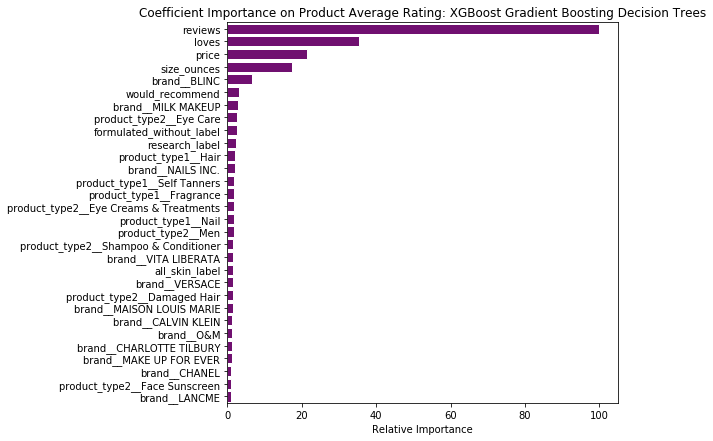

Number of Products predicted:
(417, 1)
First 5 rows of prediction results from the test set:
          0
0  4.998645
1  4.100856
2  4.400900
3  3.993757
4  4.895211

XGBoost RMSE on the Train set for Average Rating is: 0.00280349789474691
XGBoost RMSE on the Test set for Average Rating is: 0.008283179289668945


In [510]:
y_train_predict = xgb_grid.predict(X_train)
y_test_predict = xgb_grid.predict(X_test)

# save results to DF
results = pd.Series(y_test_predict)
id_price = list(zip((y_test_predict)))
predictions = pd.DataFrame(id_price)

# plot important coeff
#importances = CV_RFR_regr.best_estimator_.feature_importances_
feature_importance = xgb_grid.best_estimator_.feature_importances_                 # gonna get an error here
feature_importance = 100 * (feature_importance / feature_importance.max())

sorted_index = np.argsort(feature_importance)
featimp = feature_importance[sorted_index]
feat = X_train.columns[sorted_index]
pos = np.arange(sorted_index.shape[0]) + .5

a = 0 
b = 30 # max features
c = b - a

featimp= featimp[::-1][a:b]
feat = feat[::-1][a:b]
pos = pos[::-1][a:b]

fig = plt.figure(figsize=(7,7))
plt.subplot2grid((1,1), (0,0))
with sns.axes_style("white"):
    ax = sns.barplot(y=feat, x=featimp, color = "purple")
plt.xlabel('Relative Importance')
plt.title('Coefficient Importance on Product Average Rating: XGBoost Gradient Boosting Decision Trees'.format(c))
plt.show()

print("Number of products predicted:")
print(predictions.shape)
print("First 5 rows of prediction results from the test set:")
print(predictions.head())
print("")

est_train = np.sqrt(mean_squared_error(y_train, y_train_predict))
print('XGBoost RMSE on the Train set for Average Rating is: {}'.format(est_train))

est_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
print('XGBoost RMSE on the Test set for Average Rating is: {}'.format(est_test))

## 4 and 5 star rating: Gradient Boosting

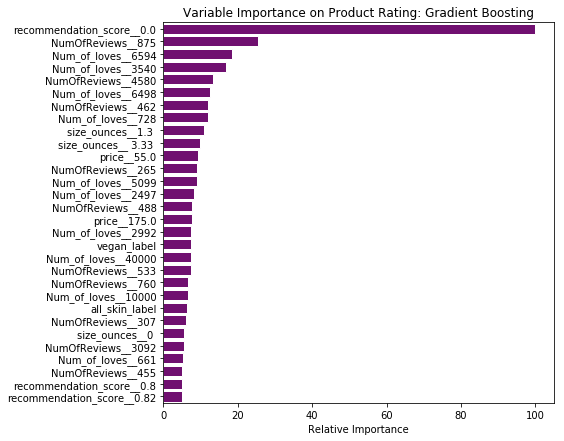

(417, 1)
          0
0  0.798782
1  0.813561
2  0.809856
3  0.811681
4  0.802108

Gradient Boosting RMSE on the Train set is: 0.015119474716443607
Gradient Boosting RMSE on the Test set is: 0.10451766757531518


In [384]:
# for product rating i wanted to filter out products with 

X = sephoraRating[['product_type1__Bath & Body', 'product_type1__Beauty Supplements', 'product_type1__Candles & Home Scents', 'product_type1__Fragrance', 'product_type1__Gifts', 'product_type1__Hair', 'product_type1__Hair Styling & Treatments', 'product_type1__High Tech Tools', 'product_type1__Makeup', 'product_type1__Makeup Palettes', 'product_type1__Men', 'product_type1__Mini Size', 'product_type1__Nail', 'product_type1__Self Tanners', 'product_type1__Shaving', 'product_type1__Skincare', 'product_type1__Tools & Brushes', 'product_type1__Value & Gift Sets', 'product_type1__nan', 'product_type2__Accessories', 'product_type2__Bath & Shower', 'product_type2__Best For', 'product_type2__Body Care', 'product_type2__Body Moisturizers', 'product_type2__Brushes & Applicators', 'product_type2__Cheek', 'product_type2__Cleansers', 'product_type2__Eye', 'product_type2__Eye Care', 'product_type2__Face', 'product_type2__Fragrance', 'product_type2__Hair', 'product_type2__Hair Styling & Treatments', 'product_type2__Hair Tools', 'product_type2__High Tech Tools', 'product_type2__Inner Beauty', 'product_type2__Lip', 'product_type2__Lip Treatments', 'product_type2__Makeup Brushes & Applicators', 'product_type2__Masks', 'product_type2__Men', 'product_type2__Moisturizers', 'product_type2__Other Needs', 'product_type2__Self Tanners', 'product_type2__Shampoo & Conditioner', 'product_type2__Shaving', 'product_type2__Skincare', 'product_type2__Sun Care', 'product_type2__Treatments', 'product_type2__Value & Gift Sets', 'product_type2__Women', 'product_type2__nan', 'product_type2__Aftershave', 'product_type2__Anti-Aging', 'product_type2__BB & CC Cream', 'product_type2__BB & CC Creams', 'product_type2__Bath & Body', 'product_type2__Bath & Shower.1', 'product_type2__Bath Soaks & Bubble Bath', 'product_type2__Beauty Supplements', 'product_type2__Blemish & Acne Treatments', 'product_type2__Blotting Papers', 'product_type2__Blush', 'product_type2__Body Lotions & Body Oils', 'product_type2__Body Mist & Hair Mist', 'product_type2__Body Products', 'product_type2__Body Sprays & Deodorant', 'product_type2__Body Sunscreen', 'product_type2__Body Wash & Shower Gel', 'product_type2__Bronzer', 'product_type2__Brush Cleaners', 'product_type2__Brush Sets', 'product_type2__Cellulite & Stretch Marks', 'product_type2__Cheek Palettes', 'product_type2__Cleansing', 'product_type2__Cleansing Brushes', 'product_type2__Co Wash & No Poo', 'product_type2__Cologne', 'product_type2__Cologne Gift Sets', 'product_type2__Color Care', 'product_type2__Color Correct', 'product_type2__Concealer', 'product_type2__Conditioner', 'product_type2__Contour', 'product_type2__Curling Irons', 'product_type2__Damaged Hair', 'product_type2__Decollete & Neck Creams', 'product_type2__Deodorant & Antiperspirant', 'product_type2__Deodorant for Men', 'product_type2__Dry Shampoo', 'product_type2__Exfoliators', 'product_type2__Eye Brushes', 'product_type2__Eye Cream', 'product_type2__Eye Creams & Treatments', 'product_type2__Eye Masks', 'product_type2__Eye Palettes', 'product_type2__Eye Primer', 'product_type2__Eye Sets', 'product_type2__Eyebrow', 'product_type2__Eyelash Curlers', 'product_type2__Eyeliner', 'product_type2__Eyeshadow', 'product_type2__Face Brushes', 'product_type2__Face Masks', 'product_type2__Face Oils', 'product_type2__Face Primer', 'product_type2__Face Serums', 'product_type2__Face Sets', 'product_type2__Face Sunscreen', 'product_type2__Face Wash', 'product_type2__Face Wash & Cleansers', 'product_type2__Face Wipes', 'product_type2__Facial Peels', 'product_type2__False Eyelashes', 'product_type2__For Body', 'product_type2__For Face', 'product_type2__Foundation', 'product_type2__Fragrance.1', 'product_type2__Hair.1', 'product_type2__Hair Accessories', 'product_type2__Hair Brushes & Combs', 'product_type2__Hair Color', 'product_type2__Hair Dryers', 'product_type2__Hair Masks', 'product_type2__Hair Oil', 'product_type2__Hair Primers', 'product_type2__Hair Products', 'product_type2__Hair Removal', 'product_type2__Hair Removal & Shaving', 'product_type2__Hair Spray', 'product_type2__Hair Straighteners & Flat Irons', 'product_type2__Hair Styling Products', 'product_type2__Hair Thinning & Hair Loss', 'product_type2__Hand Cream & Foot Cream', 'product_type2__Highlighter', 'product_type2__Leave-In Conditioner', 'product_type2__Lip Balm & Treatment', 'product_type2__Lip Balms & Treatments', 'product_type2__Lip Brushes', 'product_type2__Lip Gloss', 'product_type2__Lip Liner', 'product_type2__Lip Plumper', 'product_type2__Lip Sets', 'product_type2__Lip Stain', 'product_type2__Lip Sunscreen', 'product_type2__Lipstick', 'product_type2__Liquid Lipstick', 'product_type2__Lotions & Oils', 'product_type2__Makeup', 'product_type2__Makeup & Travel Cases', 'product_type2__Makeup Bags & Travel Cases', 'product_type2__Makeup Removers', 'product_type2__Mascara', 'product_type2__Men.1', 'product_type2__Mini Size', 'product_type2__Mirrors & Sharpeners', 'product_type2__Mists & Essences', 'product_type2__Moisturizer & Treatments', 'product_type2__Moisturizers.1', 'product_type2__Night Creams', 'product_type2__Perfume', 'product_type2__Perfume Gift Sets', 'product_type2__Rollerballs & Travel Size', 'product_type2__Scalp & Hair Treatments', 'product_type2__Scrub & Exfoliants', 'product_type2__Setting Spray & Powder', 'product_type2__Shampoo', 'product_type2__Shampoo & Conditioner.1', 'product_type2__Shaving.1', 'product_type2__Sheet Masks', 'product_type2__Skincare.1', 'product_type2__Skincare Sets', 'product_type2__Sponges & Applicators', 'product_type2__Sunscreen', 'product_type2__Teeth Whitening', 'product_type2__Tinted Moisturizer', 'product_type2__Toners', 'product_type2__Tools & Brushes', 'product_type2__Tweezers & Eyebrow Tools', 'product_type2__Under-Eye Concealer', 'product_type2__Water Bottles', 'product_type2__nan.1', 'brand__8GREENS', 'brand__ACQUA DI PARMA', 'brand__AERIN', 'brand__AETHER BEAUTY', 'brand__ALGENIST', 'brand__ALPHA-H', 'brand__ALTERNA HAIRCARE', 'brand__AMAZING COSMETICS', 'brand__AMIKA', 'brand__AMOREPACIFIC', 'brand__ANASTASIA BEVERLY HILLS', 'brand__ANTHONY', 'brand__ANTONYM', 'brand__APIVITA', 'brand__AQUIS', 'brand__ARTIS', 'brand__ARTIST COUTURE', 'brand__ATELIER COLOGNE', 'brand__BALENCIAGA', 'brand__BAREMINERALS', 'brand__BEAUTYBIO', 'brand__BEAUTYBLENDER', 'brand__BECCA', 'brand__BELIF', 'brand__BENEFIT COSMETICS', 'brand__BERDOUES', 'brand__BIO IONIC', 'brand__BIOEFFECT', 'brand__BIOSSANCE', 'brand__BITE BEAUTY', 'brand__BKR', 'brand__BLACK UP', 'brand__BLENDSMART', 'brand__BLINC', 'brand__BLINKING BEAUT', 'brand__BLITHE', 'brand__BOBBI BROWN', 'brand__BOSCIA', 'brand__BRIOGEO', 'brand__BSAME COSMETICS', 'brand__BUMBLE AND BUMBLE', 'brand__BURBERRY', 'brand__BUXOM', 'brand__BVLGARI', 'brand__BY ROSIE JANE', 'brand__CALVIN KLEIN', 'brand__CANE + AUSTIN', 'brand__CAPRI BLUE', 'brand__CAPTAIN BLANKENSHIP', 'brand__CAROLINA HERRERA', 'brand__CAUDALIE', 'brand__CELLU-CUP', 'brand__CHANEL', 'brand__CHARLOTTE TILBURY', 'brand__CHLO', 'brand__CHRISTIAN LOUBOUTIN', 'brand__CHRISTOPHE ROBIN', 'brand__CIAT LONDON', 'brand__CINEMA SECRETS', 'brand__CLARINS', 'brand__CLARISONIC', 'brand__CLEAN', 'brand__CLINIQUE', 'brand__COAL AND CANARY', 'brand__COCOFLOSS', 'brand__COMME DES GARCONS', 'brand__COMMODITY', 'brand__COMPTOIR SUD PACIFIQUE', 'brand__CONTURE', 'brand__COOLA', 'brand__COVER FX', 'brand__CRUSHED TONIC', 'brand__DEBORAH LIPPMANN', 'brand__DEREK LAM 10 CROSBY', 'brand__DERMADOCTOR', 'brand__DERMAFLASH', 'brand__DERMARCHE LABS', 'brand__DEVACURL', 'brand__DIAMANCEL', 'brand__DIOR', 'brand__DISNEY COLLECTION', 'brand__DOLCE&GABBANA', 'brand__DOMINIQUE COSMETICS', 'brand__DONNA KARAN', 'brand__DPHUE', "brand__DR ROEBUCK'S", 'brand__DR. BRANDT SKINCARE', 'brand__DR. DENNIS GROSS SKINCARE', 'brand__DR. JART+', 'brand__DRUNK ELEPHANT', 'brand__DRYBAR', 'brand__DTRT', 'brand__DUO', 'brand__DYSON', 'brand__EARTHS NECTAR', 'brand__EDIBLE BEAUTY', 'brand__EIGHT & BOB', 'brand__ELIZABETH AND JAMES', 'brand__ELLIS BROOKLYN', 'brand__ERBORIAN', 'brand__ERNO LASZLO', 'brand__ESTE LAUDER', "brand__ETAT LIBRE D'ORANGE", 'brand__EVE LOM', 'brand__EVIAN', 'brand__FARMACY', 'brand__FARSLI', 'brand__FENTY BEAUTY BY RIHANNA', 'brand__FIRST AID BEAUTY', 'brand__FOREO', 'brand__FORM', 'brand__FOUR SIGMATIC', 'brand__FRESH', 'brand__GHD', 'brand__GIORGIO ARMANI BEAUTY', 'brand__GIVENCHY', 'brand__GLAMGLOW', 'brand__GLO SCIENCE', 'brand__GLOW RECIPE', 'brand__GO-TO', 'brand__GOOD DYE YOUNG', 'brand__GOOGLE', 'brand__GRANDE COSMETICS', 'brand__GUCCI', 'brand__GUERLAIN', 'brand__HERBIVORE', 'brand__HERMS', 'brand__HIGH BEAUTY', 'brand__HISTOIRES DE PARFUMS', 'brand__HOURGLASS', 'brand__HUDA BEAUTY', 'brand__HUM NUTRITION', 'brand__HUSH', 'brand__IGK', 'brand__ILUMINAGE', 'brand__INC.REDIBLE', 'brand__INDIE LEE', 'brand__INVISIBOBBLE', 'brand__ISLE OF PARADISE', 'brand__ISSEY MIYAKE', 'brand__IT COSMETICS', "brand__IT'S SKIN", 'brand__J.ONE', 'brand__JACK BLACK', 'brand__JIMMY CHOO', 'brand__JO MALONE LONDON', 'brand__JOHN VARVATOS', 'brand__JOSIE MARAN', 'brand__JOUER COSMETICS', 'brand__JUICY COUTURE', 'brand__JULIETTE HAS A GUN', 'brand__KAJA', 'brand__KANE NY', 'brand__KAT VON D', 'brand__KATE SOMERVILLE', 'brand__KATE SPADE NEW YORK', 'brand__KENZO', 'brand__KENZOKI', 'brand__KERANIQUE', 'brand__KEVYN AUCOIN', "brand__KIEHL'S SINCE 1851", 'brand__KILIAN', 'brand__KLORANE', 'brand__KOH GEN DO', 'brand__KOPARI', 'brand__KORA ORGANICS', 'brand__KORRES', 'brand__KOSAS', 'brand__KRASTASE', "brand__L'OCCITANE", 'brand__LA MER', 'brand__LAB SERIES FOR MEN', 'brand__LANCER', 'brand__LANCME', 'brand__LANEIGE', 'brand__LASHFOOD', 'brand__LAURA MERCIER', 
                   'brand__LAVANILA', 'brand__LAWLESS', 'brand__LIGHTSTIM', 'brand__LILAH B.', 'brand__LILLY LASHES', 'brand__LIVING PROOF', 'brand__LORD JONES', 'brand__LXMI', 'brand__MADAM C.J. WALKER BEAUTY CULTURE', 'brand__MAELYS COSMETICS', 'brand__MAISON LOUIS MARIE', 'brand__MAISON MARGIELA', 'brand__MAKE UP FOR EVER', 'brand__MAKEUP ERASER', 'brand__MARC JACOBS BEAUTY', 'brand__MARC JACOBS FRAGRANCES', 'brand__MARIO BADESCU', 'brand__MARVIS', 'brand__MDSOLARSCIENCES', 'brand__MICHAEL KORS', 'brand__MILK MAKEUP', 'brand__MIU MIU', 'brand__MONTBLANC', 'brand__MOON JUICE', 'brand__MOROCCANOIL', 'brand__MOSCHINO', 'brand__MOUNT LAI', 'brand__MUGLER', 'brand__MURAD', 'brand__NAILS INC.', 'brand__NARCISO RODRIGUEZ', 'brand__NARS', 'brand__NATASHA DENONA', 'brand__NATURALLY SERIOUS', 'brand__NEOGEN DERMALOGY', 'brand__NEST', 'brand__NO MO-STACHE', 'brand__NUDESTIX', 'brand__NUFACE', 'brand__O&M', 'brand__OBAGI CLINICAL', 'brand__OLAPLEX', 'brand__OLEHENRIKSEN', 'brand__OMOROVICZA', 'brand__ORIGINS', 'brand__OUAI', 'brand__PACO RABANNE', 'brand__PAT MCGRATH LABS', 'brand__PEACE OUT', 'brand__PERRICONE MD', 'brand__PETER THOMAS ROTH', 'brand__PHILOSOPHY', 'brand__PHLUR', 'brand__PINK SUGAR', 'brand__PINROSE', 'brand__PLAYA', 'brand__PMD', 'brand__PRADA', 'brand__PRETTY VULGAR', 'brand__PRIMARY RAW', 'brand__PRIVATE DOCTOR', 'brand__PROACTIV', 'brand__PRORASO', 'brand__QHEMET BIOLOGICS', 'brand__RAG & BONE', 'brand__RAHUA', 'brand__RALPH LAUREN', 'brand__REN CLEAN SKINCARE', 'brand__REVERIE', 'brand__RITA HAZAN', 'brand__RMS BEAUTY', 'brand__RODIN OLIO LUSSO', 'brand__ROSEBUD PERFUME CO.', 'brand__ROSSANO FERRETTI PARMA', 'brand__SACHAJUAN', 'brand__SAND & SKY', 'brand__SATURDAY SKIN', 'brand__SEED PHYTONUTRIENTS', 'brand__SEPHORA COLLECTION', 'brand__SEPHORA FAVORITES', 'brand__SHAVEWORKS', 'brand__SHHHOWERCAP', 'brand__SHISEIDO', 'brand__SK-II', 'brand__SKIN INC SUPPLEMENT BAR', 'brand__SKIN LAUNDRY', 'brand__SLIP', 'brand__SMASHBOX', 'brand__SOL DE JANEIRO', 'brand__SON & PARK', 'brand__ST. TROPEZ TANNING ESSENTIALS', 'brand__STACKEDSKINCARE', 'brand__STELLA MCCARTNEY', 'brand__STELLAR', 'brand__STILA', 'brand__SUMMER FRIDAYS', 'brand__SUNDAY RILEY', 'brand__SUPERGOOP!', 'brand__SURRATT BEAUTY', 'brand__T3', 'brand__TAN-LUXE', 'brand__TANGLE TEEZER', 'brand__TARTE', 'brand__TASTE BEAUTY', 'brand__TATA HARPER', 'brand__TATCHA', 'brand__THE 7 VIRTUES', 'brand__THE ART OF SHAVING', 'brand__THE BEAUTY CHEF', 'brand__THE ORDINARY', 'brand__TOCCA', 'brand__TOKYOMILK', 'brand__TOM FORD', 'brand__TOO COOL FOR SCHOOL', 'brand__TOO FACED', 'brand__TORY BURCH', 'brand__TOUCH IN SOL', 'brand__TRSTIQUE', 'brand__TWEEZERMAN', 'brand__URBAN DECAY', 'brand__VELOUR LASHES', 'brand__VERB', 'brand__VERNON FRANCOIS', 'brand__VERSACE', 'brand__VIKTOR&ROLF', 'brand__VIOLET VOSS', 'brand__VISEART', 'brand__VITA LIBERATA', 'brand__VITAL PROTEINS', 'brand__VITRUVI', 'brand__VOLITION BEAUTY', 'brand__VOLUSPA', 'brand__WANDER BEAUTY', 'brand__WELL-KEPT', 'brand__WELLECO', 'brand__WINKY LUX', 'brand__YOUTH TO THE PEOPLE', 'brand__YUNI', 'brand__YVES SAINT LAURENT', 'size_ounces__ 0.1 ', 'size_ounces__ 0.118 ', 'size_ounces__ 0.12 ', 'size_ounces__ 0.13 ', 'size_ounces__ 0.14 ', 'size_ounces__ 0.16 ', 'size_ounces__ 0.19 ', 'size_ounces__ 0.2 ', 'size_ounces__ 0.21 ', 'size_ounces__ 0.22 ', 'size_ounces__ 0.23 ', 'size_ounces__ 0.24 ', 'size_ounces__ 0.25 ', 'size_ounces__ 0.27 ', 'size_ounces__ 0.30 ', 'size_ounces__ 0.32 ', 'size_ounces__ 0.33 ', 'size_ounces__ 0.34 ', 'size_ounces__ 0.35 ', 'size_ounces__ 0.37 ', 'size_ounces__ 0.4 ', 'size_ounces__ 0.5 ', 'size_ounces__ 0.50 ', 'size_ounces__ 0.51 ', 'size_ounces__ 0.66 ', 'size_ounces__ 0.67 ', 'size_ounces__ 0.68 ', 'size_ounces__ 0.7 ', 'size_ounces__ 0.75 ', 'size_ounces__ 0.8 ', 'size_ounces__ 0.84 ', 'size_ounces__ 0.85 ', 'size_ounces__ 1 ', 'size_ounces__ 1.01 ', 'size_ounces__ 1.08 ', 'size_ounces__ 1.12 ', 'size_ounces__ 1.18 ', 'size_ounces__ 1.2 ', 'size_ounces__ 1.25 ', 'size_ounces__ 1.3 ', 'size_ounces__ 1.35 ', 'size_ounces__ 1.4 ', 'size_ounces__ 1.41 ', 'size_ounces__ 1.5 ', 'size_ounces__ 1.52 ', 'size_ounces__ 1.6 ', 'size_ounces__ 1.67 ', 'size_ounces__ 1.68 ', 'size_ounces__ 1.69', 'size_ounces__ 1.69 ', 'size_ounces__ 1.7 ', 'size_ounces__ 1.70 ', 'size_ounces__ 1.75 ', 'size_ounces__ 1.76 ', 'size_ounces__ 10 ', 'size_ounces__ 10.1 ', 'size_ounces__ 10.15 ', 'size_ounces__ 10.2 ', 'size_ounces__ 10.5 ', 'size_ounces__ 10.6 ', 'size_ounces__ 10.8 ', 'size_ounces__ 12 ', 'size_ounces__ 13 ', 'size_ounces__ 13.4 ', 'size_ounces__ 13.5 ', 'size_ounces__ 14.1 ', 'size_ounces__ 16 ', 'size_ounces__ 16.5 ', 'size_ounces__ 16.9 ', 'size_ounces__ 2 ', 'size_ounces__ 2.1 ', 'size_ounces__ 2.2 ', 'size_ounces__ 2.3 ', 'size_ounces__ 2.4 ', 'size_ounces__ 2.5 ', 'size_ounces__ 2.53 ', 'size_ounces__ 2.54 ', 'size_ounces__ 2.6 ', 'size_ounces__ 2.7 ', 'size_ounces__ 2.8 ', 'size_ounces__ 3 ', 'size_ounces__ 3.1 ', 'size_ounces__ 3.2 ', 'size_ounces__ 3.3 ', 'size_ounces__ 3.33 ', 'size_ounces__ 3.38 ', 'size_ounces__ 3.4 ', 'size_ounces__ 3.5 ', 'size_ounces__ 3.6 ', 'size_ounces__ 3.7 ', 'size_ounces__ 3.8 ', 'size_ounces__ 32 ', 'size_ounces__ 4 ', 'size_ounces__ 4.0 ', 'size_ounces__ 4.1 ', 'size_ounces__ 4.2 ', 'size_ounces__ 4.3 ', 'size_ounces__ 4.4 ', 'size_ounces__ 4.5 ', 'size_ounces__ 4.7 ', 'size_ounces__ 4.75 ', 'size_ounces__ 5 ', 'size_ounces__ 5.07 ', 'size_ounces__ 5.1 ', 'size_ounces__ 5.2 ', 'size_ounces__ 5.3 ', 'size_ounces__ 5.4 ', 'size_ounces__ 5.41 ', 'size_ounces__ 5.5 ', 'size_ounces__ 5.9 ', 'size_ounces__ 6 ', 'size_ounces__ 6.2 ', 'size_ounces__ 6.3 ', 'size_ounces__ 6.5 ', 'size_ounces__ 6.7 ', 'size_ounces__ 6.75 ', 'size_ounces__ 6.8 ', 'size_ounces__ 6.9 ', 'size_ounces__ 7 ', 'size_ounces__ 7.0 ', 'size_ounces__ 7.1 ', 'size_ounces__ 7.3 ', 'size_ounces__ 7.5 ', 'size_ounces__ 7.7 ', 'size_ounces__ 8 ', 'size_ounces__ 8.1 ', 'size_ounces__ 8.2 ', 'size_ounces__ 8.33 ', 'size_ounces__ 8.4 ', 'size_ounces__ 8.45 ', 'size_ounces__ 8.5 ', 'size_ounces__ 9 ', 'size_ounces__ 9.3 ', 'size_ounces__.001 ', 'size_ounces__.004 ', 'size_ounces__.01 ', 'size_ounces__.016 ', 'size_ounces__.02 ', 'size_ounces__.03 ', 'size_ounces__.04 ', 'size_ounces__.041 ', 'size_ounces__.045 ', 'size_ounces__.056 ', 'size_ounces__.12 ', 'size_ounces__.15 ', 'size_ounces__.16 ', 'size_ounces__.17 ', 'size_ounces__.20 ', 'size_ounces__.23 ', 'size_ounces__.24 ', 'size_ounces__.25 ', 'size_ounces__.27', 'size_ounces__.27 ', 'size_ounces__.28 ', 'size_ounces__.31 ', 'size_ounces__.32 ', 'size_ounces__.33', 'size_ounces__.33 ', 'size_ounces__.34', 'size_ounces__.35 ', 'size_ounces__.38 ', 'size_ounces__.42 ', 'size_ounces__.46 ', 'size_ounces__.49 ', 'size_ounces__.5 ', 'size_ounces__.50 ', 'size_ounces__.85 ', 'size_ounces__0 ', 'size_ounces__0.002 ', 'size_ounces__0.003 ', 'size_ounces__0.0038 ', 'size_ounces__0.004 ', 'size_ounces__0.005 ', 'size_ounces__0.0056 ', 'size_ounces__0.007 ', 'size_ounces__0.0088 ', 'size_ounces__0.009 ', 'size_ounces__0.01 ', 'size_ounces__0.012 ', 'size_ounces__0.016 ', 'size_ounces__0.017 ', 'size_ounces__0.0176 ', 'size_ounces__0.018 ', 'size_ounces__0.019 ', 'size_ounces__0.02 ', 'size_ounces__0.023 ', 'size_ounces__0.025 ', 'size_ounces__0.028 ', 'size_ounces__0.03 ', 'size_ounces__0.034 ', 'size_ounces__0.035 ', 'size_ounces__0.036 ', 'size_ounces__0.037 ', 'size_ounces__0.04 ', 'size_ounces__0.042 ', 'size_ounces__0.045 ', 'size_ounces__0.047 ', 'size_ounces__0.048 ', 'size_ounces__0.049 ', 'size_ounces__0.05 ', 'size_ounces__0.052 ', 'size_ounces__0.054 ', 'size_ounces__0.056 ', 'size_ounces__0.059 ', 'size_ounces__0.06 ', 'size_ounces__0.067 ', 'size_ounces__0.07 ', 'size_ounces__0.074 ', 'size_ounces__0.08 ', 'size_ounces__0.084 ', 'size_ounces__0.085 ', 'size_ounces__0.086 ', 'size_ounces__0.087 ', 'size_ounces__0.088 ', 'size_ounces__0.09 ', 'size_ounces__0.0915 ', 'size_ounces__0.096 ', 'size_ounces__0.1 ', 'size_ounces__0.10 ', 'size_ounces__0.105 ', 'size_ounces__0.106 ', 'size_ounces__0.11 ', 'size_ounces__0.118 ', 'size_ounces__0.12 ', 'size_ounces__0.123 ', 'size_ounces__0.13 ', 'size_ounces__0.134 ', 'size_ounces__0.135 ', 'size_ounces__0.139 ', 'size_ounces__0.14', 'size_ounces__0.14 ', 'size_ounces__0.141 ', 'size_ounces__0.15 ', 'size_ounces__0.153 ', 'size_ounces__0.16 ', 'size_ounces__0.169 ', 'size_ounces__0.17', 'size_ounces__0.17 ', 'size_ounces__0.18 ', 'size_ounces__0.19 ', 'size_ounces__0.192 ', 'size_ounces__0.2 ', 'size_ounces__0.20 ', 'size_ounces__0.208 ', 'size_ounces__0.21 ', 'size_ounces__0.22 ', 'size_ounces__0.23 ', 'size_ounces__0.24 ', 'size_ounces__0.247 ', 'size_ounces__0.25 ', 'size_ounces__0.26 ', 'size_ounces__0.264 ', 'size_ounces__0.27', 'size_ounces__0.27 ', 'size_ounces__0.28 ', 'size_ounces__0.282 ', 'size_ounces__0.29 ', 'size_ounces__0.3', 'size_ounces__0.3 ', 'size_ounces__0.30 ', 'size_ounces__0.31 ', 'size_ounces__0.32 ', 'size_ounces__0.33', 'size_ounces__0.33 ', 'size_ounces__0.34', 'size_ounces__0.34 ', 'size_ounces__0.35 ', 'size_ounces__0.36 ', 'size_ounces__0.37 ', 'size_ounces__0.38 ', 'size_ounces__0.39 ', 'size_ounces__0.4', 'size_ounces__0.4 ', 'size_ounces__0.40 ', 'size_ounces__0.41 ', 'size_ounces__0.42 ', 'size_ounces__0.43 ', 'size_ounces__0.44 ', 'size_ounces__0.45 ', 'size_ounces__0.46 ', 'size_ounces__0.47 ', 'size_ounces__0.48 ', 'size_ounces__0.49', 'size_ounces__0.49 ', 'size_ounces__0.5 ', 'size_ounces__0.50 ', 'size_ounces__0.51 ', 'size_ounces__0.52 ', 'size_ounces__0.53 ', 'size_ounces__0.54 ', 'size_ounces__0.55 ', 'size_ounces__0.56 ', 'size_ounces__0.6 ', 'size_ounces__0.61 ', 'size_ounces__0.63 ', 'size_ounces__0.66 ', 'size_ounces__0.67', 'size_ounces__0.67 ', 'size_ounces__0.68 ', 'size_ounces__0.7 ',
                   'size_ounces__0.70 ', 'size_ounces__0.74 ', 'size_ounces__0.75 ', 'size_ounces__0.76 ', 'size_ounces__0.77 ', 'size_ounces__0.78 ', 'size_ounces__0.8 ', 'size_ounces__0.84 ', 'size_ounces__0.85 ', 'size_ounces__0.87 ', 'size_ounces__0.88 ', 'size_ounces__0.89 ', 'size_ounces__0.9', 'size_ounces__0.9 ', 'size_ounces__0.94 ', 'size_ounces__0.95 ', 'size_ounces__0.98 ', 'size_ounces__00.6 ', 'size_ounces__1', 'size_ounces__1 ', 'size_ounces__1.0 ', 'size_ounces__1.01 ', 'size_ounces__1.014 ', 'size_ounces__1.02 ', 'size_ounces__1.04 ', 'size_ounces__1.05 ', 'size_ounces__1.06 ', 'size_ounces__1.08 ', 'size_ounces__1.1 ', 'size_ounces__1.14 ', 'size_ounces__1.17 ', 'size_ounces__1.18 ', 'size_ounces__1.2 ', 'size_ounces__1.23 ', 'size_ounces__1.3 ', 'size_ounces__1.33 ', 'size_ounces__1.34 ', 'size_ounces__1.35 ', 'size_ounces__1.4 ', 'size_ounces__1.41 ', 'size_ounces__1.5 ', 'size_ounces__1.52 ', 'size_ounces__1.6', 'size_ounces__1.6 ', 'size_ounces__1.61 ', 'size_ounces__1.64 ', 'size_ounces__1.65 ', 'size_ounces__1.67 ', 'size_ounces__1.68 ', 'size_ounces__1.69', 'size_ounces__1.69 ', 'size_ounces__1.7', 'size_ounces__1.7 ', 'size_ounces__1.75 ', 'size_ounces__1.76 ', 'size_ounces__1.8', 'size_ounces__1.8 ', 'size_ounces__1.86 ', 'size_ounces__1.9 ', 'size_ounces__10 ', 'size_ounces__10.1 ', 'size_ounces__10.14 ', 'size_ounces__10.2 ', 'size_ounces__10.37 ', 'size_ounces__11 ', 'size_ounces__11.1 ', 'size_ounces__11.2 ', 'size_ounces__11.49 ', 'size_ounces__11.5 ', 'size_ounces__11.8 ', 'size_ounces__12 ', 'size_ounces__12.5 ', 'size_ounces__123 ', 'size_ounces__13.5 ', 'size_ounces__16 ', 'size_ounces__16.9 ', 'size_ounces__19 ', 'size_ounces__2', 'size_ounces__2 ', 'size_ounces__2.0 ', 'size_ounces__2.02 ', 'size_ounces__2.029 ', 'size_ounces__2.03 ', 'size_ounces__2.1 ', 'size_ounces__2.12 ', 'size_ounces__2.14 ', 'size_ounces__2.2 ', 'size_ounces__2.25 ', 'size_ounces__2.3 ', 'size_ounces__2.36 ', 'size_ounces__2.37 ', 'size_ounces__2.4 ', 'size_ounces__2.47 ', 'size_ounces__2.5', 'size_ounces__2.5 ', 'size_ounces__2.53 ', 'size_ounces__2.54', 'size_ounces__2.54 ', 'size_ounces__2.6 ', 'size_ounces__2.65 ', 'size_ounces__2.7 ', 'size_ounces__2.70 ', 'size_ounces__2.75 ', 'size_ounces__2.8 ', 'size_ounces__2.82 ', 'size_ounces__2.87 ', 'size_ounces__21.1 ', 'size_ounces__22 ', 'size_ounces__3 ', 'size_ounces__3.0 ', 'size_ounces__3.04 ', 'size_ounces__3.17 ', 'size_ounces__3.2 ', 'size_ounces__3.3 ', 'size_ounces__3.38 ', 'size_ounces__3.39 ', 'size_ounces__3.4', 'size_ounces__3.4 ', 'size_ounces__3.5 ', 'size_ounces__3.52 ', 'size_ounces__3.53 ', 'size_ounces__3.6 ', 'size_ounces__3.65 ', 'size_ounces__3.75 ', 'size_ounces__3.8 ', 'size_ounces__3.9 ', 'size_ounces__32 ', 'size_ounces__4', 'size_ounces__4 ', 'size_ounces__4.0 ', 'size_ounces__4.05 ', 'size_ounces__4.08 ', 'size_ounces__4.1 ', 'size_ounces__4.2 ', 'size_ounces__4.22 ', 'size_ounces__4.25 ', 'size_ounces__4.3 ', 'size_ounces__4.35 ', 'size_ounces__4.39 ', 'size_ounces__4.4 ', 'size_ounces__4.5 ', 'size_ounces__4.6 ', 'size_ounces__4.7 ', 'size_ounces__4.73 ', 'size_ounces__4.75 ', 'size_ounces__4.8 ', 'size_ounces__4.9 ', 'size_ounces__5 ', 'size_ounces__5.0 ', 'size_ounces__5.06 ', 'size_ounces__5.07 ', 'size_ounces__5.1 ', 'size_ounces__5.2 ', 'size_ounces__5.25 ', 'size_ounces__5.29 ', 'size_ounces__5.3 ', 'size_ounces__5.4 ', 'size_ounces__5.5 ', 'size_ounces__5.6 ', 'size_ounces__5.7 ', 'size_ounces__5.8 ', 'size_ounces__5.82 ', 'size_ounces__5.9', 'size_ounces__5.9 ', 'size_ounces__5.99 ', 'size_ounces__6 ', 'size_ounces__6.1 ', 'size_ounces__6.17 ', 'size_ounces__6.2', 'size_ounces__6.25 ', 'size_ounces__6.3 ', 'size_ounces__6.4 ', 'size_ounces__6.5', 'size_ounces__6.5 ', 'size_ounces__6.59 ', 'size_ounces__6.6 ', 'size_ounces__6.7 ', 'size_ounces__6.75 ', 'size_ounces__6.76 ', 'size_ounces__6.8 ', 'size_ounces__6.9 ', 'size_ounces__7 ', 'size_ounces__7.0 ', 'size_ounces__7.05 ', 'size_ounces__7.1 ', 'size_ounces__7.2 ', 'size_ounces__7.5 ', 'size_ounces__7.6 ', 'size_ounces__7.7 ', 'size_ounces__7.75 ', 'size_ounces__8 ', 'size_ounces__8.1', 'size_ounces__8.1 ', 'size_ounces__8.2 ', 'size_ounces__8.3 ', 'size_ounces__8.33 ', 'size_ounces__8.4 ', 'size_ounces__8.45 ', 'size_ounces__8.5 ', 'size_ounces__8.8 ', 'size_ounces__8.9 ', 'size_ounces__9 ', 'size_ounces__9.3 ', 'size_ounces__9.9 ', 'discounted_value_label', 'on_sale_label', 'val_normal_skin_label', 'oily_skin_label', 'dry_skin_label', 'combination_skin_label', 'sensitive_skin_label', 'all_skin_label', 'vegan_label', 'tested_label', 'research_label', 'formulated_without_label', 'clean_label', 'price__5.3', 'price__5.8', 'price__5.9', 'price__6.0', 'price__6.8', 'price__7.0', 'price__7.2', 'price__7.5', 'price__7.9', 'price__8.0', 'price__8.5', 'price__9.0', 'price__9.8', 'price__10.0', 'price__10.5', 'price__11.0', 'price__11.5', 'price__12.0', 'price__13.0', 'price__13.5', 'price__14.0', 'price__14.5', 'price__15.0', 'price__16.0', 'price__17.0', 'price__17.5', 'price__18.0', 'price__18.5', 'price__19.0', 'price__19.5', 'price__19.99', 'price__20.0', 'price__20.5', 'price__21.0', 'price__21.5', 'price__22.0', 'price__22.5', 'price__23.0', 'price__23.5', 'price__24.0', 'price__25.0', 'price__26.0', 'price__26.5', 'price__27.0', 'price__27.5', 'price__28.0', 'price__29.0', 'price__29.5', 'price__30.0', 'price__30.5', 'price__31.0', 'price__32.0', 'price__32.5', 'price__33.0', 'price__34.0', 'price__35.0', 'price__36.0', 'price__37.0', 'price__38.0', 'price__39.0', 'price__40.0', 'price__41.0', 'price__41.5', 'price__42.0', 'price__43.0', 'price__44.0', 'price__44.5', 'price__45.0', 'price__46.0', 'price__47.0', 'price__48.0', 'price__49.0', 'price__49.5', 'price__50.0', 'price__51.0', 'price__52.0', 'price__53.0', 'price__54.0', 'price__55.0', 'price__56.0', 'price__57.0', 'price__58.0', 'price__59.0', 'price__60.0', 'price__61.0', 'price__62.0', 'price__63.0', 'price__64.0', 'price__65.0', 'price__66.0', 'price__67.0', 'price__68.0', 'price__69.0', 'price__70.0', 'price__72.0', 'price__74.0', 'price__75.0', 'price__76.0', 'price__76.5', 'price__77.0', 'price__78.0', 'price__79.0', 'price__80.0', 'price__81.0', 'price__82.0', 'price__84.0', 'price__85.0', 'price__86.0', 'price__87.0', 'price__88.0', 'price__89.0', 'price__90.0', 'price__92.0', 'price__94.0', 'price__95.0', 'price__96.0', 'price__97.0', 'price__98.0', 'price__99.0', 'price__100.0', 'price__102.0', 'price__105.0', 'price__107.0', 'price__108.0', 'price__110.0', 'price__114.0', 'price__115.0', 'price__116.0', 'price__117.0', 'price__118.0', 'price__119.0', 'price__120.0', 'price__122.0', 'price__123.0', 'price__124.0', 'price__125.0', 'price__126.0', 'price__128.0', 'price__129.0', 'price__130.0', 'price__132.0', 'price__133.0', 'price__135.0', 'price__136.0', 'price__139.0', 'price__140.0', 'price__144.0', 'price__145.0', 'price__148.0', 'price__149.0', 'price__150.0', 'price__158.0', 'price__159.0', 'price__160.0', 'price__162.0', 'price__165.0', 'price__169.0', 'price__170.0', 'price__172.0', 'price__175.0', 'price__179.0', 'price__185.0', 'price__188.0', 'price__195.0', 'price__199.0', 'price__205.0', 'price__210.0', 'price__219.0', 'price__223.5', 'price__229.0', 'price__235.0', 'price__240.0', 'price__245.0', 'price__249.0', 'price__250.0', 'price__255.0', 'price__265.0', 'price__270.0', 'price__275.0', 'price__285.0', 'price__295.0', 'price__300.0', 'price__320.0', 'price__325.0', 'price__345.0', 'price__385.0', 'price__399.0', 'Num_of_loves__4', 'Num_of_loves__26', 'Num_of_loves__72', 'Num_of_loves__76', 'Num_of_loves__90', 'Num_of_loves__97', 'Num_of_loves__118', 'Num_of_loves__132', 'Num_of_loves__136', 'Num_of_loves__139', 'Num_of_loves__147', 'Num_of_loves__181', 'Num_of_loves__184', 'Num_of_loves__195', 'Num_of_loves__196', 'Num_of_loves__201', 'Num_of_loves__211', 'Num_of_loves__216', 'Num_of_loves__221', 'Num_of_loves__223', 'Num_of_loves__225', 'Num_of_loves__227', 'Num_of_loves__228', 'Num_of_loves__232', 'Num_of_loves__240', 'Num_of_loves__247', 'Num_of_loves__250', 'Num_of_loves__257', 'Num_of_loves__262', 'Num_of_loves__275', 'Num_of_loves__282', 'Num_of_loves__284', 'Num_of_loves__291', 'Num_of_loves__301', 'Num_of_loves__306', 'Num_of_loves__314', 'Num_of_loves__320', 'Num_of_loves__323', 'Num_of_loves__325', 'Num_of_loves__326', 'Num_of_loves__332', 'Num_of_loves__335', 'Num_of_loves__338', 'Num_of_loves__343', 'Num_of_loves__345', 'Num_of_loves__346', 'Num_of_loves__348', 'Num_of_loves__354', 'Num_of_loves__355', 'Num_of_loves__357', 'Num_of_loves__361', 'Num_of_loves__363', 'Num_of_loves__377', 'Num_of_loves__378', 'Num_of_loves__379', 'Num_of_loves__382', 'Num_of_loves__383', 'Num_of_loves__386', 'Num_of_loves__389', 'Num_of_loves__390', 'Num_of_loves__394', 'Num_of_loves__397', 'Num_of_loves__398', 'Num_of_loves__409', 'Num_of_loves__414', 'Num_of_loves__415', 'Num_of_loves__416', 'Num_of_loves__427', 'Num_of_loves__428', 'Num_of_loves__430', 'Num_of_loves__431', 'Num_of_loves__436', 'Num_of_loves__438', 'Num_of_loves__443', 'Num_of_loves__444', 'Num_of_loves__445', 'Num_of_loves__448', 'Num_of_loves__453', 'Num_of_loves__456', 'Num_of_loves__462', 'Num_of_loves__468', 'Num_of_loves__469', 'Num_of_loves__470', 'Num_of_loves__478', 'Num_of_loves__487', 'Num_of_loves__489', 'Num_of_loves__492', 'Num_of_loves__496', 'Num_of_loves__502', 'Num_of_loves__504', 'Num_of_loves__505', 'Num_of_loves__515', 'Num_of_loves__520', 'Num_of_loves__521', 'Num_of_loves__527', 'Num_of_loves__530', 'Num_of_loves__531', 'Num_of_loves__539', 'Num_of_loves__545', 'Num_of_loves__550', 'Num_of_loves__554', 'Num_of_loves__558', 'Num_of_loves__559', 'Num_of_loves__560', 'Num_of_loves__562', 'Num_of_loves__574', 
                   'Num_of_loves__575', 'Num_of_loves__577', 'Num_of_loves__578', 'Num_of_loves__583', 'Num_of_loves__590', 'Num_of_loves__591', 'Num_of_loves__602', 'Num_of_loves__607', 'Num_of_loves__612', 'Num_of_loves__614', 'Num_of_loves__615', 'Num_of_loves__616', 'Num_of_loves__619', 'Num_of_loves__620', 'Num_of_loves__622', 'Num_of_loves__623', 'Num_of_loves__625', 'Num_of_loves__630', 'Num_of_loves__631', 'Num_of_loves__632', 'Num_of_loves__637', 'Num_of_loves__650', 'Num_of_loves__658', 'Num_of_loves__659', 'Num_of_loves__661', 'Num_of_loves__662', 'Num_of_loves__670', 'Num_of_loves__671', 'Num_of_loves__673', 'Num_of_loves__676', 'Num_of_loves__678', 'Num_of_loves__680', 'Num_of_loves__682', 'Num_of_loves__683', 'Num_of_loves__684', 'Num_of_loves__688', 'Num_of_loves__689', 'Num_of_loves__690', 'Num_of_loves__698', 'Num_of_loves__700', 'Num_of_loves__701', 'Num_of_loves__702', 'Num_of_loves__708', 'Num_of_loves__720', 'Num_of_loves__721', 'Num_of_loves__725', 'Num_of_loves__727', 'Num_of_loves__728', 'Num_of_loves__738', 'Num_of_loves__743', 'Num_of_loves__745', 'Num_of_loves__754', 'Num_of_loves__756', 'Num_of_loves__759', 'Num_of_loves__766', 'Num_of_loves__770', 'Num_of_loves__771', 'Num_of_loves__774', 'Num_of_loves__784', 'Num_of_loves__785', 'Num_of_loves__790', 'Num_of_loves__791', 'Num_of_loves__795', 'Num_of_loves__798', 'Num_of_loves__799', 'Num_of_loves__815', 'Num_of_loves__816', 'Num_of_loves__821', 'Num_of_loves__828', 'Num_of_loves__830', 'Num_of_loves__831', 'Num_of_loves__832', 'Num_of_loves__835', 'Num_of_loves__836', 'Num_of_loves__841', 'Num_of_loves__842', 'Num_of_loves__847', 'Num_of_loves__848', 'Num_of_loves__852', 'Num_of_loves__853', 'Num_of_loves__855', 'Num_of_loves__857', 'Num_of_loves__859', 'Num_of_loves__866', 'Num_of_loves__867', 'Num_of_loves__869', 'Num_of_loves__873', 'Num_of_loves__877', 'Num_of_loves__883', 'Num_of_loves__886', 'Num_of_loves__889', 'Num_of_loves__897', 'Num_of_loves__898', 'Num_of_loves__900', 'Num_of_loves__906', 'Num_of_loves__908', 'Num_of_loves__915', 'Num_of_loves__917', 'Num_of_loves__918', 'Num_of_loves__919', 'Num_of_loves__923', 'Num_of_loves__924', 'Num_of_loves__934', 'Num_of_loves__936', 'Num_of_loves__943', 'Num_of_loves__944', 'Num_of_loves__945', 'Num_of_loves__946', 'Num_of_loves__947', 'Num_of_loves__950', 'Num_of_loves__959', 'Num_of_loves__963', 'Num_of_loves__965', 'Num_of_loves__970', 'Num_of_loves__975', 'Num_of_loves__978', 'Num_of_loves__1001', 'Num_of_loves__1009', 'Num_of_loves__1010', 'Num_of_loves__1012', 'Num_of_loves__1015', 'Num_of_loves__1022', 'Num_of_loves__1024', 'Num_of_loves__1033', 'Num_of_loves__1036', 'Num_of_loves__1039', 'Num_of_loves__1048', 'Num_of_loves__1055', 'Num_of_loves__1065', 'Num_of_loves__1066', 'Num_of_loves__1067', 'Num_of_loves__1069', 'Num_of_loves__1072', 'Num_of_loves__1076', 'Num_of_loves__1079', 'Num_of_loves__1080', 'Num_of_loves__1083', 'Num_of_loves__1088', 'Num_of_loves__1093', 'Num_of_loves__1101', 'Num_of_loves__1105', 'Num_of_loves__1106', 'Num_of_loves__1111', 'Num_of_loves__1114', 'Num_of_loves__1120', 'Num_of_loves__1124', 'Num_of_loves__1133', 'Num_of_loves__1134', 'Num_of_loves__1138', 'Num_of_loves__1146', 'Num_of_loves__1149', 'Num_of_loves__1150', 'Num_of_loves__1158', 'Num_of_loves__1160', 'Num_of_loves__1163', 'Num_of_loves__1165', 'Num_of_loves__1170', 'Num_of_loves__1185', 'Num_of_loves__1193', 'Num_of_loves__1195', 'Num_of_loves__1202', 'Num_of_loves__1206', 'Num_of_loves__1207', 'Num_of_loves__1213', 'Num_of_loves__1216', 'Num_of_loves__1217', 'Num_of_loves__1218', 'Num_of_loves__1219', 'Num_of_loves__1228', 'Num_of_loves__1237', 'Num_of_loves__1240', 'Num_of_loves__1245', 'Num_of_loves__1250', 'Num_of_loves__1259', 'Num_of_loves__1261', 'Num_of_loves__1262', 'Num_of_loves__1269', 'Num_of_loves__1271', 'Num_of_loves__1273', 'Num_of_loves__1277', 'Num_of_loves__1293', 'Num_of_loves__1296', 'Num_of_loves__1312', 'Num_of_loves__1319', 'Num_of_loves__1320', 'Num_of_loves__1324', 'Num_of_loves__1328', 'Num_of_loves__1329', 'Num_of_loves__1331', 'Num_of_loves__1334', 'Num_of_loves__1335', 'Num_of_loves__1336', 'Num_of_loves__1337', 'Num_of_loves__1338', 'Num_of_loves__1346', 'Num_of_loves__1350', 'Num_of_loves__1355', 'Num_of_loves__1356', 'Num_of_loves__1363', 'Num_of_loves__1366', 'Num_of_loves__1369', 'Num_of_loves__1375', 'Num_of_loves__1410', 'Num_of_loves__1429', 'Num_of_loves__1434', 'Num_of_loves__1436', 'Num_of_loves__1442', 'Num_of_loves__1444', 'Num_of_loves__1445', 'Num_of_loves__1447', 'Num_of_loves__1451', 'Num_of_loves__1454', 'Num_of_loves__1456', 'Num_of_loves__1460', 'Num_of_loves__1464', 'Num_of_loves__1465', 'Num_of_loves__1467', 'Num_of_loves__1468', 'Num_of_loves__1472', 'Num_of_loves__1473', 'Num_of_loves__1483', 'Num_of_loves__1486', 'Num_of_loves__1488', 'Num_of_loves__1492', 'Num_of_loves__1493', 'Num_of_loves__1494', 'Num_of_loves__1495', 'Num_of_loves__1499', 'Num_of_loves__1504', 'Num_of_loves__1511', 'Num_of_loves__1513', 'Num_of_loves__1515', 'Num_of_loves__1516', 'Num_of_loves__1517', 'Num_of_loves__1522', 'Num_of_loves__1530', 'Num_of_loves__1533', 'Num_of_loves__1537', 'Num_of_loves__1539', 'Num_of_loves__1548', 'Num_of_loves__1555', 'Num_of_loves__1566', 'Num_of_loves__1571', 'Num_of_loves__1583', 'Num_of_loves__1584', 'Num_of_loves__1600', 'Num_of_loves__1609', 'Num_of_loves__1615', 'Num_of_loves__1622', 'Num_of_loves__1623', 'Num_of_loves__1625', 'Num_of_loves__1626', 'Num_of_loves__1629', 'Num_of_loves__1631', 'Num_of_loves__1637', 'Num_of_loves__1641', 'Num_of_loves__1642', 'Num_of_loves__1645', 'Num_of_loves__1648', 'Num_of_loves__1652', 'Num_of_loves__1659', 'Num_of_loves__1674', 'Num_of_loves__1677', 'Num_of_loves__1695', 'Num_of_loves__1702', 'Num_of_loves__1703', 'Num_of_loves__1704', 'Num_of_loves__1707', 'Num_of_loves__1712', 'Num_of_loves__1715', 'Num_of_loves__1716', 'Num_of_loves__1722', 'Num_of_loves__1724', 'Num_of_loves__1733', 'Num_of_loves__1744', 'Num_of_loves__1745', 'Num_of_loves__1748', 'Num_of_loves__1751', 'Num_of_loves__1757', 'Num_of_loves__1758', 'Num_of_loves__1765', 'Num_of_loves__1770', 'Num_of_loves__1777', 'Num_of_loves__1780', 'Num_of_loves__1788', 'Num_of_loves__1790', 'Num_of_loves__1794', 'Num_of_loves__1796', 'Num_of_loves__1803', 'Num_of_loves__1807', 'Num_of_loves__1816', 'Num_of_loves__1824', 'Num_of_loves__1827', 'Num_of_loves__1829', 'Num_of_loves__1833', 'Num_of_loves__1834', 'Num_of_loves__1838', 'Num_of_loves__1840', 'Num_of_loves__1850', 'Num_of_loves__1851', 'Num_of_loves__1856', 'Num_of_loves__1866', 'Num_of_loves__1867', 'Num_of_loves__1886', 'Num_of_loves__1887', 'Num_of_loves__1908', 'Num_of_loves__1914', 'Num_of_loves__1923', 'Num_of_loves__1925', 'Num_of_loves__1927', 'Num_of_loves__1929', 'Num_of_loves__1930', 'Num_of_loves__1933', 'Num_of_loves__1941', 'Num_of_loves__1950', 'Num_of_loves__1957', 'Num_of_loves__1962', 'Num_of_loves__1969', 'Num_of_loves__1970', 'Num_of_loves__1974', 'Num_of_loves__1982', 'Num_of_loves__1983', 'Num_of_loves__1985', 'Num_of_loves__1990', 'Num_of_loves__1995', 'Num_of_loves__1998', 'Num_of_loves__2005', 'Num_of_loves__2006', 'Num_of_loves__2015', 'Num_of_loves__2017', 'Num_of_loves__2018', 'Num_of_loves__2021', 'Num_of_loves__2026', 'Num_of_loves__2029', 'Num_of_loves__2030', 'Num_of_loves__2035', 'Num_of_loves__2038', 'Num_of_loves__2044', 'Num_of_loves__2046', 'Num_of_loves__2047', 'Num_of_loves__2048', 'Num_of_loves__2049', 'Num_of_loves__2053', 'Num_of_loves__2061', 'Num_of_loves__2063', 'Num_of_loves__2067', 'Num_of_loves__2072', 'Num_of_loves__2083', 'Num_of_loves__2084', 'Num_of_loves__2085', 'Num_of_loves__2090', 'Num_of_loves__2091', 'Num_of_loves__2108', 'Num_of_loves__2110', 'Num_of_loves__2112', 'Num_of_loves__2128', 'Num_of_loves__2129', 'Num_of_loves__2133', 'Num_of_loves__2135', 'Num_of_loves__2137', 'Num_of_loves__2139', 'Num_of_loves__2145', 'Num_of_loves__2147', 'Num_of_loves__2149', 'Num_of_loves__2152', 'Num_of_loves__2155', 'Num_of_loves__2156', 'Num_of_loves__2159', 'Num_of_loves__2169', 'Num_of_loves__2176', 'Num_of_loves__2184', 'Num_of_loves__2190', 'Num_of_loves__2192', 'Num_of_loves__2196', 'Num_of_loves__2202', 'Num_of_loves__2207', 'Num_of_loves__2211', 'Num_of_loves__2215', 'Num_of_loves__2216', 'Num_of_loves__2219', 'Num_of_loves__2234', 'Num_of_loves__2235', 'Num_of_loves__2257', 'Num_of_loves__2259', 'Num_of_loves__2265', 'Num_of_loves__2274', 'Num_of_loves__2278', 'Num_of_loves__2279', 'Num_of_loves__2280', 'Num_of_loves__2285', 'Num_of_loves__2294', 'Num_of_loves__2295', 'Num_of_loves__2296', 'Num_of_loves__2299', 'Num_of_loves__2300', 'Num_of_loves__2320', 'Num_of_loves__2325', 'Num_of_loves__2331', 'Num_of_loves__2334', 'Num_of_loves__2335', 'Num_of_loves__2336', 'Num_of_loves__2340', 'Num_of_loves__2342', 'Num_of_loves__2348', 'Num_of_loves__2349', 'Num_of_loves__2354', 'Num_of_loves__2368', 'Num_of_loves__2371', 'Num_of_loves__2375', 'Num_of_loves__2377', 'Num_of_loves__2390', 'Num_of_loves__2397', 'Num_of_loves__2400', 'Num_of_loves__2406', 'Num_of_loves__2408', 'Num_of_loves__2410', 'Num_of_loves__2412', 'Num_of_loves__2419', 'Num_of_loves__2420', 'Num_of_loves__2424', 'Num_of_loves__2428', 'Num_of_loves__2429', 'Num_of_loves__2435', 'Num_of_loves__2437', 'Num_of_loves__2448', 'Num_of_loves__2465', 'Num_of_loves__2479', 'Num_of_loves__2480', 'Num_of_loves__2486', 'Num_of_loves__2489', 'Num_of_loves__2495', 'Num_of_loves__2497', 'Num_of_loves__2499', 'Num_of_loves__2500', 'Num_of_loves__2504', 'Num_of_loves__2508', 'Num_of_loves__2524', 'Num_of_loves__2528', 'Num_of_loves__2543', 'Num_of_loves__2548', 'Num_of_loves__2550', 'Num_of_loves__2570', 'Num_of_loves__2601', 'Num_of_loves__2603', 'Num_of_loves__2611', 'Num_of_loves__2612', 'Num_of_loves__2615', 'Num_of_loves__2618', 'Num_of_loves__2624', 'Num_of_loves__2625', 'Num_of_loves__2632', 'Num_of_loves__2635', 'Num_of_loves__2638', 
                   'Num_of_loves__2641', 'Num_of_loves__2643', 'Num_of_loves__2645', 'Num_of_loves__2646', 'Num_of_loves__2661', 'Num_of_loves__2664', 'Num_of_loves__2673', 'Num_of_loves__2677', 'Num_of_loves__2686', 'Num_of_loves__2693', 'Num_of_loves__2696', 'Num_of_loves__2697', 'Num_of_loves__2703', 'Num_of_loves__2706', 'Num_of_loves__2710', 'Num_of_loves__2711', 'Num_of_loves__2716', 'Num_of_loves__2722', 'Num_of_loves__2729', 'Num_of_loves__2732', 'Num_of_loves__2748', 'Num_of_loves__2767', 'Num_of_loves__2781', 'Num_of_loves__2790', 'Num_of_loves__2810', 'Num_of_loves__2817', 'Num_of_loves__2820', 'Num_of_loves__2828', 'Num_of_loves__2838', 'Num_of_loves__2842', 'Num_of_loves__2844', 'Num_of_loves__2856', 'Num_of_loves__2857', 'Num_of_loves__2862', 'Num_of_loves__2865', 'Num_of_loves__2869', 'Num_of_loves__2874', 'Num_of_loves__2881', 'Num_of_loves__2889', 'Num_of_loves__2905', 'Num_of_loves__2917', 'Num_of_loves__2920', 'Num_of_loves__2921', 'Num_of_loves__2925', 'Num_of_loves__2930', 'Num_of_loves__2940', 'Num_of_loves__2945', 'Num_of_loves__2948', 'Num_of_loves__2953', 'Num_of_loves__2959', 'Num_of_loves__2970', 'Num_of_loves__2976', 'Num_of_loves__2979', 'Num_of_loves__2981', 'Num_of_loves__2989', 'Num_of_loves__2990', 'Num_of_loves__2992', 'Num_of_loves__2999', 'Num_of_loves__3003', 'Num_of_loves__3013', 'Num_of_loves__3025', 'Num_of_loves__3029', 'Num_of_loves__3032', 'Num_of_loves__3036', 'Num_of_loves__3037', 'Num_of_loves__3039', 'Num_of_loves__3044', 'Num_of_loves__3059', 'Num_of_loves__3065', 'Num_of_loves__3067', 'Num_of_loves__3068', 'Num_of_loves__3079', 'Num_of_loves__3082', 'Num_of_loves__3086', 'Num_of_loves__3087', 'Num_of_loves__3091', 'Num_of_loves__3093', 'Num_of_loves__3096', 'Num_of_loves__3100', 'Num_of_loves__3103', 'Num_of_loves__3114', 'Num_of_loves__3126', 'Num_of_loves__3134', 'Num_of_loves__3140', 'Num_of_loves__3154', 'Num_of_loves__3156', 'Num_of_loves__3160', 'Num_of_loves__3169', 'Num_of_loves__3189', 'Num_of_loves__3192', 'Num_of_loves__3195', 'Num_of_loves__3210', 'Num_of_loves__3227', 'Num_of_loves__3229', 'Num_of_loves__3232', 'Num_of_loves__3240', 'Num_of_loves__3250', 'Num_of_loves__3259', 'Num_of_loves__3263', 'Num_of_loves__3264', 'Num_of_loves__3266', 'Num_of_loves__3274', 'Num_of_loves__3278', 'Num_of_loves__3280', 'Num_of_loves__3282', 'Num_of_loves__3289', 'Num_of_loves__3290', 'Num_of_loves__3295', 'Num_of_loves__3307', 'Num_of_loves__3320', 'Num_of_loves__3321', 'Num_of_loves__3323', 'Num_of_loves__3329', 'Num_of_loves__3339', 'Num_of_loves__3340', 'Num_of_loves__3342', 'Num_of_loves__3348', 'Num_of_loves__3353', 'Num_of_loves__3365', 'Num_of_loves__3375', 'Num_of_loves__3376', 'Num_of_loves__3396', 'Num_of_loves__3400', 'Num_of_loves__3401', 'Num_of_loves__3402', 'Num_of_loves__3408', 'Num_of_loves__3413', 'Num_of_loves__3420', 'Num_of_loves__3421', 'Num_of_loves__3423', 'Num_of_loves__3430', 'Num_of_loves__3431', 'Num_of_loves__3457', 'Num_of_loves__3464', 'Num_of_loves__3476', 'Num_of_loves__3486', 'Num_of_loves__3491', 'Num_of_loves__3498', 'Num_of_loves__3499', 'Num_of_loves__3504', 'Num_of_loves__3508', 'Num_of_loves__3511', 'Num_of_loves__3512', 'Num_of_loves__3515', 'Num_of_loves__3517', 'Num_of_loves__3535', 'Num_of_loves__3540', 'Num_of_loves__3543', 'Num_of_loves__3555', 'Num_of_loves__3559', 'Num_of_loves__3566', 'Num_of_loves__3573', 'Num_of_loves__3576', 'Num_of_loves__3579', 'Num_of_loves__3584', 'Num_of_loves__3595', 'Num_of_loves__3600', 'Num_of_loves__3606', 'Num_of_loves__3610', 'Num_of_loves__3615', 'Num_of_loves__3618', 'Num_of_loves__3623', 'Num_of_loves__3630', 'Num_of_loves__3639', 'Num_of_loves__3652', 'Num_of_loves__3655', 'Num_of_loves__3661', 'Num_of_loves__3662', 'Num_of_loves__3674', 'Num_of_loves__3676', 'Num_of_loves__3677', 'Num_of_loves__3678', 'Num_of_loves__3682', 'Num_of_loves__3687', 'Num_of_loves__3689', 'Num_of_loves__3695', 'Num_of_loves__3700', 'Num_of_loves__3705', 'Num_of_loves__3713', 'Num_of_loves__3714', 'Num_of_loves__3717', 'Num_of_loves__3718', 'Num_of_loves__3765', 'Num_of_loves__3767', 'Num_of_loves__3780', 'Num_of_loves__3785', 'Num_of_loves__3790', 'Num_of_loves__3794', 'Num_of_loves__3805', 'Num_of_loves__3809', 'Num_of_loves__3812', 'Num_of_loves__3820', 'Num_of_loves__3825', 'Num_of_loves__3833', 'Num_of_loves__3845', 'Num_of_loves__3870', 'Num_of_loves__3877', 'Num_of_loves__3884', 'Num_of_loves__3885', 'Num_of_loves__3910', 'Num_of_loves__3918', 'Num_of_loves__3920', 'Num_of_loves__3923', 'Num_of_loves__3925', 'Num_of_loves__3926', 'Num_of_loves__3935', 'Num_of_loves__3937', 'Num_of_loves__3973', 'Num_of_loves__3985', 'Num_of_loves__4018', 'Num_of_loves__4020', 'Num_of_loves__4026', 'Num_of_loves__4027', 'Num_of_loves__4028', 'Num_of_loves__4033', 'Num_of_loves__4042', 'Num_of_loves__4043', 'Num_of_loves__4045', 'Num_of_loves__4059', 'Num_of_loves__4061', 'Num_of_loves__4074', 'Num_of_loves__4081', 'Num_of_loves__4090', 'Num_of_loves__4098', 'Num_of_loves__4112', 'Num_of_loves__4123', 'Num_of_loves__4124', 'Num_of_loves__4126', 'Num_of_loves__4129', 'Num_of_loves__4136', 'Num_of_loves__4138', 'Num_of_loves__4141', 'Num_of_loves__4145', 'Num_of_loves__4147', 'Num_of_loves__4160', 'Num_of_loves__4167', 'Num_of_loves__4174', 'Num_of_loves__4184', 'Num_of_loves__4185', 'Num_of_loves__4194', 'Num_of_loves__4200', 'Num_of_loves__4213', 'Num_of_loves__4218', 'Num_of_loves__4222', 'Num_of_loves__4230', 'Num_of_loves__4231', 'Num_of_loves__4239', 'Num_of_loves__4246', 'Num_of_loves__4250', 'Num_of_loves__4259', 'Num_of_loves__4304', 'Num_of_loves__4318', 'Num_of_loves__4332', 'Num_of_loves__4337', 'Num_of_loves__4345', 'Num_of_loves__4346', 'Num_of_loves__4348', 'Num_of_loves__4353', 'Num_of_loves__4357', 'Num_of_loves__4362', 'Num_of_loves__4367', 'Num_of_loves__4369', 'Num_of_loves__4373', 'Num_of_loves__4379', 'Num_of_loves__4384', 'Num_of_loves__4388', 'Num_of_loves__4391', 'Num_of_loves__4406', 'Num_of_loves__4420', 'Num_of_loves__4435', 'Num_of_loves__4436', 'Num_of_loves__4461', 'Num_of_loves__4464', 'Num_of_loves__4465', 'Num_of_loves__4472', 'Num_of_loves__4477', 'Num_of_loves__4484', 'Num_of_loves__4491', 'Num_of_loves__4498', 'Num_of_loves__4506', 'Num_of_loves__4510', 'Num_of_loves__4513', 'Num_of_loves__4517', 'Num_of_loves__4528', 'Num_of_loves__4537', 'Num_of_loves__4545', 'Num_of_loves__4548', 'Num_of_loves__4558', 'Num_of_loves__4566', 'Num_of_loves__4577', 'Num_of_loves__4591', 'Num_of_loves__4596', 'Num_of_loves__4600', 'Num_of_loves__4614', 'Num_of_loves__4622', 'Num_of_loves__4638', 'Num_of_loves__4639', 'Num_of_loves__4655', 'Num_of_loves__4669', 'Num_of_loves__4681', 'Num_of_loves__4708', 'Num_of_loves__4710', 'Num_of_loves__4740', 'Num_of_loves__4756', 'Num_of_loves__4761', 'Num_of_loves__4768', 'Num_of_loves__4773', 'Num_of_loves__4775', 'Num_of_loves__4786', 'Num_of_loves__4799', 'Num_of_loves__4806', 'Num_of_loves__4813', 'Num_of_loves__4823', 'Num_of_loves__4829', 'Num_of_loves__4831', 'Num_of_loves__4833', 'Num_of_loves__4864', 'Num_of_loves__4866', 'Num_of_loves__4876', 'Num_of_loves__4877', 'Num_of_loves__4888', 'Num_of_loves__4891', 'Num_of_loves__4906', 'Num_of_loves__4909', 'Num_of_loves__4927', 'Num_of_loves__4936', 'Num_of_loves__4938', 'Num_of_loves__4958', 'Num_of_loves__4973', 'Num_of_loves__4974', 'Num_of_loves__4994', 'Num_of_loves__5000', 'Num_of_loves__5001', 'Num_of_loves__5007', 'Num_of_loves__5021', 'Num_of_loves__5024', 'Num_of_loves__5026', 'Num_of_loves__5052', 'Num_of_loves__5070', 'Num_of_loves__5082', 'Num_of_loves__5084', 'Num_of_loves__5093', 'Num_of_loves__5099', 'Num_of_loves__5104', 'Num_of_loves__5117', 'Num_of_loves__5121', 'Num_of_loves__5129', 'Num_of_loves__5147', 'Num_of_loves__5151', 'Num_of_loves__5159', 'Num_of_loves__5179', 'Num_of_loves__5188', 'Num_of_loves__5190', 'Num_of_loves__5199', 'Num_of_loves__5217', 'Num_of_loves__5231', 'Num_of_loves__5235', 'Num_of_loves__5242', 'Num_of_loves__5251', 'Num_of_loves__5253', 'Num_of_loves__5266', 'Num_of_loves__5280', 'Num_of_loves__5285', 'Num_of_loves__5303', 'Num_of_loves__5304', 'Num_of_loves__5313', 'Num_of_loves__5320', 'Num_of_loves__5322', 'Num_of_loves__5350', 'Num_of_loves__5363', 'Num_of_loves__5366', 'Num_of_loves__5376', 'Num_of_loves__5377', 'Num_of_loves__5384', 'Num_of_loves__5390', 'Num_of_loves__5397', 'Num_of_loves__5409', 'Num_of_loves__5415', 'Num_of_loves__5416', 'Num_of_loves__5437', 'Num_of_loves__5438', 'Num_of_loves__5442', 'Num_of_loves__5452', 'Num_of_loves__5455', 'Num_of_loves__5466', 'Num_of_loves__5481', 'Num_of_loves__5482', 'Num_of_loves__5490', 'Num_of_loves__5493', 'Num_of_loves__5494', 'Num_of_loves__5507', 'Num_of_loves__5518', 'Num_of_loves__5520', 'Num_of_loves__5523', 'Num_of_loves__5544', 'Num_of_loves__5554', 'Num_of_loves__5563', 'Num_of_loves__5566', 'Num_of_loves__5575', 'Num_of_loves__5631', 'Num_of_loves__5637', 'Num_of_loves__5646', 'Num_of_loves__5652', 'Num_of_loves__5658', 'Num_of_loves__5686', 'Num_of_loves__5698', 'Num_of_loves__5699', 'Num_of_loves__5701', 'Num_of_loves__5710', 'Num_of_loves__5720', 'Num_of_loves__5725', 'Num_of_loves__5744', 'Num_of_loves__5757', 'Num_of_loves__5758', 'Num_of_loves__5761', 'Num_of_loves__5771', 'Num_of_loves__5778', 'Num_of_loves__5786', 'Num_of_loves__5787', 'Num_of_loves__5790', 'Num_of_loves__5798', 'Num_of_loves__5805', 'Num_of_loves__5806', 'Num_of_loves__5810', 'Num_of_loves__5818', 'Num_of_loves__5829', 'Num_of_loves__5841', 'Num_of_loves__5848', 'Num_of_loves__5858', 'Num_of_loves__5861', 'Num_of_loves__5875', 'Num_of_loves__5880', 'Num_of_loves__5899', 'Num_of_loves__5939', 'Num_of_loves__5940', 'Num_of_loves__5941', 'Num_of_loves__5965', 'Num_of_loves__5997', 'Num_of_loves__6001', 'Num_of_loves__6002', 'Num_of_loves__6015', 'Num_of_loves__6016', 'Num_of_loves__6029', 'Num_of_loves__6032', 'Num_of_loves__6092', 'Num_of_loves__6095', 'Num_of_loves__6103', 'Num_of_loves__6106', 'Num_of_loves__6127', 
                   'Num_of_loves__6131', 'Num_of_loves__6137', 'Num_of_loves__6161', 'Num_of_loves__6168', 'Num_of_loves__6177', 'Num_of_loves__6179', 'Num_of_loves__6202', 'Num_of_loves__6211', 'Num_of_loves__6213', 'Num_of_loves__6218', 'Num_of_loves__6220', 'Num_of_loves__6234', 'Num_of_loves__6245', 'Num_of_loves__6248', 'Num_of_loves__6250', 'Num_of_loves__6251', 'Num_of_loves__6253', 'Num_of_loves__6265', 'Num_of_loves__6299', 'Num_of_loves__6310', 'Num_of_loves__6350', 'Num_of_loves__6374', 'Num_of_loves__6377', 'Num_of_loves__6409', 'Num_of_loves__6426', 'Num_of_loves__6432', 'Num_of_loves__6445', 'Num_of_loves__6447', 'Num_of_loves__6456', 'Num_of_loves__6498', 'Num_of_loves__6501', 'Num_of_loves__6503', 'Num_of_loves__6514', 'Num_of_loves__6551', 'Num_of_loves__6556', 'Num_of_loves__6594', 'Num_of_loves__6609', 'Num_of_loves__6629', 'Num_of_loves__6632', 'Num_of_loves__6674', 'Num_of_loves__6684', 'Num_of_loves__6688', 'Num_of_loves__6743', 'Num_of_loves__6761', 'Num_of_loves__6776', 'Num_of_loves__6821', 'Num_of_loves__6826', 'Num_of_loves__6829', 'Num_of_loves__6835', 'Num_of_loves__6881', 'Num_of_loves__6882', 'Num_of_loves__6897', 'Num_of_loves__6916', 'Num_of_loves__6919', 'Num_of_loves__6921', 'Num_of_loves__6928', 'Num_of_loves__6936', 'Num_of_loves__6941', 'Num_of_loves__6966', 'Num_of_loves__6975', 'Num_of_loves__7002', 'Num_of_loves__7033', 'Num_of_loves__7044', 'Num_of_loves__7049', 'Num_of_loves__7073', 'Num_of_loves__7084', 'Num_of_loves__7089', 'Num_of_loves__7096', 'Num_of_loves__7103', 'Num_of_loves__7113', 'Num_of_loves__7115', 'Num_of_loves__7159', 'Num_of_loves__7175', 'Num_of_loves__7186', 'Num_of_loves__7194', 'Num_of_loves__7204', 'Num_of_loves__7244', 'Num_of_loves__7258', 'Num_of_loves__7272', 'Num_of_loves__7300', 'Num_of_loves__7332', 'Num_of_loves__7347', 'Num_of_loves__7350', 'Num_of_loves__7419', 'Num_of_loves__7456', 'Num_of_loves__7468', 'Num_of_loves__7478', 'Num_of_loves__7491', 'Num_of_loves__7512', 'Num_of_loves__7548', 'Num_of_loves__7557', 'Num_of_loves__7577', 'Num_of_loves__7581', 'Num_of_loves__7585', 'Num_of_loves__7595', 'Num_of_loves__7605', 'Num_of_loves__7608', 'Num_of_loves__7616', 'Num_of_loves__7627', 'Num_of_loves__7651', 'Num_of_loves__7658', 'Num_of_loves__7668', 'Num_of_loves__7678', 'Num_of_loves__7687', 'Num_of_loves__7700', 'Num_of_loves__7701', 'Num_of_loves__7708', 'Num_of_loves__7712', 'Num_of_loves__7739', 'Num_of_loves__7743', 'Num_of_loves__7748', 'Num_of_loves__7750', 'Num_of_loves__7773', 'Num_of_loves__7784', 'Num_of_loves__7793', 'Num_of_loves__7794', 'Num_of_loves__7806', 'Num_of_loves__7827', 'Num_of_loves__7835', 'Num_of_loves__7869', 'Num_of_loves__7873', 'Num_of_loves__7897', 'Num_of_loves__7914', 'Num_of_loves__7928', 'Num_of_loves__7950', 'Num_of_loves__7955', 'Num_of_loves__7962', 'Num_of_loves__8010', 'Num_of_loves__8011', 'Num_of_loves__8018', 'Num_of_loves__8032', 'Num_of_loves__8037', 'Num_of_loves__8052', 'Num_of_loves__8072', 'Num_of_loves__8086', 'Num_of_loves__8097', 'Num_of_loves__8109', 'Num_of_loves__8110', 'Num_of_loves__8114', 'Num_of_loves__8238', 'Num_of_loves__8242', 'Num_of_loves__8244', 'Num_of_loves__8275', 'Num_of_loves__8288', 'Num_of_loves__8289', 'Num_of_loves__8299', 'Num_of_loves__8306', 'Num_of_loves__8335', 'Num_of_loves__8348', 'Num_of_loves__8364', 'Num_of_loves__8369', 'Num_of_loves__8374', 'Num_of_loves__8399', 'Num_of_loves__8417', 'Num_of_loves__8433', 'Num_of_loves__8441', 'Num_of_loves__8442', 'Num_of_loves__8481', 'Num_of_loves__8489', 'Num_of_loves__8499', 'Num_of_loves__8523', 'Num_of_loves__8547', 'Num_of_loves__8634', 'Num_of_loves__8671', 'Num_of_loves__8686', 'Num_of_loves__8707', 'Num_of_loves__8710', 'Num_of_loves__8717', 'Num_of_loves__8728', 'Num_of_loves__8734', 'Num_of_loves__8740', 'Num_of_loves__8753', 'Num_of_loves__8768', 'Num_of_loves__8769', 'Num_of_loves__8775', 'Num_of_loves__8803', 'Num_of_loves__8820', 'Num_of_loves__8835', 'Num_of_loves__8858', 'Num_of_loves__8861', 'Num_of_loves__8863', 'Num_of_loves__8864', 'Num_of_loves__8876', 'Num_of_loves__8911', 'Num_of_loves__8950', 'Num_of_loves__8961', 'Num_of_loves__8962', 'Num_of_loves__8969', 'Num_of_loves__8992', 'Num_of_loves__9005', 'Num_of_loves__9061', 'Num_of_loves__9063', 'Num_of_loves__9066', 'Num_of_loves__9087', 'Num_of_loves__9096', 'Num_of_loves__9113', 'Num_of_loves__9153', 'Num_of_loves__9159', 'Num_of_loves__9163', 'Num_of_loves__9169', 'Num_of_loves__9204', 'Num_of_loves__9228', 'Num_of_loves__9244', 'Num_of_loves__9265', 'Num_of_loves__9310', 'Num_of_loves__9316', 'Num_of_loves__9357', 'Num_of_loves__9361', 'Num_of_loves__9412', 'Num_of_loves__9418', 'Num_of_loves__9426', 'Num_of_loves__9427', 'Num_of_loves__9428', 'Num_of_loves__9434', 'Num_of_loves__9435', 'Num_of_loves__9474', 'Num_of_loves__9479', 'Num_of_loves__9484', 'Num_of_loves__9486', 'Num_of_loves__9490', 'Num_of_loves__9491', 'Num_of_loves__9511', 'Num_of_loves__9530', 'Num_of_loves__9548', 'Num_of_loves__9570', 'Num_of_loves__9581', 'Num_of_loves__9641', 'Num_of_loves__9653', 'Num_of_loves__9657', 'Num_of_loves__9669', 'Num_of_loves__9680', 'Num_of_loves__9682', 'Num_of_loves__9694', 'Num_of_loves__9707', 'Num_of_loves__9729', 'Num_of_loves__9763', 'Num_of_loves__9767', 'Num_of_loves__9772', 'Num_of_loves__9811', 'Num_of_loves__9816', 'Num_of_loves__9821', 'Num_of_loves__9849', 'Num_of_loves__9864', 'Num_of_loves__9871', 'Num_of_loves__9872', 'Num_of_loves__9881', 'Num_of_loves__9927', 'Num_of_loves__9929', 'Num_of_loves__9954', 'Num_of_loves__9981', 'Num_of_loves__9992', 'Num_of_loves__10000', 'Num_of_loves__20000', 'Num_of_loves__30000', 'Num_of_loves__40000', 'Num_of_loves__50000', 'Num_of_loves__60000', 'Num_of_loves__70000', 'Num_of_loves__80000', 'Num_of_loves__90000', 'Num_of_loves__100000', 'Num_of_loves__110000', 'Num_of_loves__120000', 'Num_of_loves__130000', 'Num_of_loves__140000', 'Num_of_loves__150000', 'Num_of_loves__160000', 'Num_of_loves__170000', 'Num_of_loves__180000', 'Num_of_loves__190000', 'Num_of_loves__200000', 'Num_of_loves__220000', 'Num_of_loves__230000', 'Num_of_loves__240000', 'Num_of_loves__250000', 'Num_of_loves__260000', 'Num_of_loves__270000', 'Num_of_loves__280000', 'Num_of_loves__290000', 'Num_of_loves__300000', 'Num_of_loves__330000', 'Num_of_loves__350000', 'Num_of_loves__390000', 'Num_of_loves__430000', 'Num_of_loves__540000', 'Num_of_loves__570000', 'Num_of_loves__670000', 'Num_of_loves__1170000', 'NumOfReviews__151', 'NumOfReviews__152', 'NumOfReviews__153', 'NumOfReviews__154', 'NumOfReviews__155', 'NumOfReviews__156', 'NumOfReviews__157', 'NumOfReviews__158', 'NumOfReviews__159', 'NumOfReviews__160', 'NumOfReviews__161', 'NumOfReviews__162', 'NumOfReviews__163', 'NumOfReviews__164', 'NumOfReviews__165', 'NumOfReviews__166', 'NumOfReviews__167', 'NumOfReviews__168', 'NumOfReviews__169', 'NumOfReviews__170', 'NumOfReviews__171', 'NumOfReviews__172', 'NumOfReviews__173', 'NumOfReviews__174', 'NumOfReviews__175', 'NumOfReviews__176', 'NumOfReviews__177', 'NumOfReviews__178', 'NumOfReviews__179', 'NumOfReviews__180', 'NumOfReviews__181', 'NumOfReviews__182', 'NumOfReviews__183', 'NumOfReviews__184', 'NumOfReviews__185', 'NumOfReviews__186', 'NumOfReviews__187', 'NumOfReviews__188', 'NumOfReviews__189', 'NumOfReviews__190', 'NumOfReviews__191', 'NumOfReviews__192', 'NumOfReviews__193', 'NumOfReviews__194', 'NumOfReviews__195', 'NumOfReviews__196', 'NumOfReviews__197', 'NumOfReviews__198', 'NumOfReviews__199', 'NumOfReviews__200', 'NumOfReviews__201', 'NumOfReviews__203', 'NumOfReviews__204', 'NumOfReviews__205', 'NumOfReviews__206', 'NumOfReviews__207', 'NumOfReviews__208', 'NumOfReviews__209', 'NumOfReviews__210', 'NumOfReviews__211', 'NumOfReviews__212', 'NumOfReviews__213', 'NumOfReviews__214', 'NumOfReviews__215', 'NumOfReviews__216', 'NumOfReviews__217', 'NumOfReviews__218', 'NumOfReviews__219', 'NumOfReviews__220', 'NumOfReviews__221', 'NumOfReviews__222', 'NumOfReviews__223', 'NumOfReviews__224', 'NumOfReviews__225', 'NumOfReviews__226', 'NumOfReviews__227', 'NumOfReviews__228', 'NumOfReviews__229', 'NumOfReviews__230', 'NumOfReviews__231', 'NumOfReviews__232', 'NumOfReviews__233', 'NumOfReviews__234', 'NumOfReviews__235', 'NumOfReviews__236', 'NumOfReviews__237', 'NumOfReviews__238', 'NumOfReviews__239', 'NumOfReviews__240', 'NumOfReviews__241', 'NumOfReviews__242', 'NumOfReviews__243', 'NumOfReviews__244', 'NumOfReviews__245', 'NumOfReviews__246', 'NumOfReviews__247', 'NumOfReviews__248', 'NumOfReviews__249', 'NumOfReviews__250', 'NumOfReviews__251', 'NumOfReviews__252', 'NumOfReviews__253', 'NumOfReviews__254', 'NumOfReviews__255', 'NumOfReviews__256', 'NumOfReviews__257', 'NumOfReviews__258', 'NumOfReviews__259', 'NumOfReviews__260', 'NumOfReviews__261', 'NumOfReviews__262', 'NumOfReviews__263', 'NumOfReviews__264', 'NumOfReviews__265', 'NumOfReviews__266', 'NumOfReviews__267', 'NumOfReviews__268', 'NumOfReviews__269', 'NumOfReviews__270', 'NumOfReviews__271', 'NumOfReviews__272', 'NumOfReviews__273', 'NumOfReviews__274', 'NumOfReviews__275', 'NumOfReviews__276', 'NumOfReviews__277', 'NumOfReviews__278', 'NumOfReviews__279', 'NumOfReviews__280', 'NumOfReviews__281', 'NumOfReviews__282', 'NumOfReviews__284', 'NumOfReviews__285', 'NumOfReviews__286', 'NumOfReviews__287', 'NumOfReviews__288', 'NumOfReviews__289', 'NumOfReviews__290', 'NumOfReviews__291', 'NumOfReviews__292', 'NumOfReviews__293', 'NumOfReviews__294', 'NumOfReviews__295', 'NumOfReviews__296', 'NumOfReviews__297', 'NumOfReviews__298', 'NumOfReviews__299', 'NumOfReviews__300', 'NumOfReviews__301', 'NumOfReviews__302', 'NumOfReviews__303', 'NumOfReviews__304', 'NumOfReviews__305', 'NumOfReviews__306', 'NumOfReviews__307', 'NumOfReviews__309', 'NumOfReviews__311', 'NumOfReviews__312', 'NumOfReviews__313', 'NumOfReviews__314', 'NumOfReviews__315', 'NumOfReviews__316', 'NumOfReviews__317', 'NumOfReviews__318', 'NumOfReviews__319', 'NumOfReviews__320', 'NumOfReviews__321', 'NumOfReviews__322', 'NumOfReviews__323', 'NumOfReviews__324', 'NumOfReviews__325',
                   'NumOfReviews__326', 'NumOfReviews__327', 'NumOfReviews__328', 'NumOfReviews__330', 'NumOfReviews__331', 'NumOfReviews__332', 'NumOfReviews__333', 'NumOfReviews__334', 'NumOfReviews__335', 'NumOfReviews__336', 'NumOfReviews__337', 'NumOfReviews__338', 'NumOfReviews__339', 'NumOfReviews__340', 'NumOfReviews__341', 'NumOfReviews__342', 'NumOfReviews__343', 'NumOfReviews__344', 'NumOfReviews__345', 'NumOfReviews__346', 'NumOfReviews__347', 'NumOfReviews__348', 'NumOfReviews__349', 'NumOfReviews__351', 'NumOfReviews__352', 'NumOfReviews__353', 'NumOfReviews__354', 'NumOfReviews__355', 'NumOfReviews__357', 'NumOfReviews__358', 'NumOfReviews__359', 'NumOfReviews__360', 'NumOfReviews__361', 'NumOfReviews__362', 'NumOfReviews__363', 'NumOfReviews__364', 'NumOfReviews__365', 'NumOfReviews__366', 'NumOfReviews__367', 'NumOfReviews__368', 'NumOfReviews__369', 'NumOfReviews__370', 'NumOfReviews__372', 'NumOfReviews__373', 'NumOfReviews__374', 'NumOfReviews__376', 'NumOfReviews__377', 'NumOfReviews__378', 'NumOfReviews__379', 'NumOfReviews__380', 'NumOfReviews__381', 'NumOfReviews__382', 'NumOfReviews__383', 'NumOfReviews__384', 'NumOfReviews__385', 'NumOfReviews__387', 'NumOfReviews__389', 'NumOfReviews__390', 'NumOfReviews__391', 'NumOfReviews__393', 'NumOfReviews__394', 'NumOfReviews__395', 'NumOfReviews__396', 'NumOfReviews__397', 'NumOfReviews__398', 'NumOfReviews__399', 'NumOfReviews__400', 'NumOfReviews__401', 'NumOfReviews__402', 'NumOfReviews__403', 'NumOfReviews__404', 'NumOfReviews__405', 'NumOfReviews__407', 'NumOfReviews__408', 'NumOfReviews__409', 'NumOfReviews__410', 'NumOfReviews__411', 'NumOfReviews__412', 'NumOfReviews__413', 'NumOfReviews__414', 'NumOfReviews__415', 'NumOfReviews__416', 'NumOfReviews__418', 'NumOfReviews__419', 'NumOfReviews__420', 'NumOfReviews__421', 'NumOfReviews__422', 'NumOfReviews__423', 'NumOfReviews__424', 'NumOfReviews__425', 'NumOfReviews__426', 'NumOfReviews__427', 'NumOfReviews__428', 'NumOfReviews__429', 'NumOfReviews__430', 'NumOfReviews__431', 'NumOfReviews__434', 'NumOfReviews__435', 'NumOfReviews__437', 'NumOfReviews__439', 'NumOfReviews__440', 'NumOfReviews__442', 'NumOfReviews__443', 'NumOfReviews__444', 'NumOfReviews__445', 'NumOfReviews__446', 'NumOfReviews__448', 'NumOfReviews__449', 'NumOfReviews__450', 'NumOfReviews__451', 'NumOfReviews__453', 'NumOfReviews__455', 'NumOfReviews__456', 'NumOfReviews__457', 'NumOfReviews__459', 'NumOfReviews__461', 'NumOfReviews__462', 'NumOfReviews__463', 'NumOfReviews__465', 'NumOfReviews__466', 'NumOfReviews__467', 'NumOfReviews__468', 'NumOfReviews__470', 'NumOfReviews__472', 'NumOfReviews__473', 'NumOfReviews__474', 'NumOfReviews__477', 'NumOfReviews__478', 'NumOfReviews__479', 'NumOfReviews__481', 'NumOfReviews__482', 'NumOfReviews__483', 'NumOfReviews__484', 'NumOfReviews__485', 'NumOfReviews__486', 'NumOfReviews__487', 'NumOfReviews__488', 'NumOfReviews__489', 'NumOfReviews__490', 'NumOfReviews__492', 'NumOfReviews__493', 'NumOfReviews__494', 'NumOfReviews__495', 'NumOfReviews__497', 'NumOfReviews__498', 'NumOfReviews__499', 'NumOfReviews__500', 'NumOfReviews__501', 'NumOfReviews__502', 'NumOfReviews__504', 'NumOfReviews__505', 'NumOfReviews__507', 'NumOfReviews__508', 'NumOfReviews__509', 'NumOfReviews__514', 'NumOfReviews__515', 'NumOfReviews__516', 'NumOfReviews__518', 'NumOfReviews__520', 'NumOfReviews__521', 'NumOfReviews__522', 'NumOfReviews__524', 'NumOfReviews__525', 'NumOfReviews__526', 'NumOfReviews__527', 'NumOfReviews__528', 'NumOfReviews__529', 'NumOfReviews__531', 'NumOfReviews__532', 'NumOfReviews__533', 'NumOfReviews__534', 'NumOfReviews__535', 'NumOfReviews__536', 'NumOfReviews__537', 'NumOfReviews__538', 'NumOfReviews__540', 'NumOfReviews__541', 'NumOfReviews__542', 'NumOfReviews__543', 'NumOfReviews__546', 'NumOfReviews__547', 'NumOfReviews__548', 'NumOfReviews__549', 'NumOfReviews__550', 'NumOfReviews__551', 'NumOfReviews__552', 'NumOfReviews__553', 'NumOfReviews__554', 'NumOfReviews__556', 'NumOfReviews__557', 'NumOfReviews__558', 'NumOfReviews__559', 'NumOfReviews__560', 'NumOfReviews__561', 'NumOfReviews__562', 'NumOfReviews__564', 'NumOfReviews__565', 'NumOfReviews__566', 'NumOfReviews__568', 'NumOfReviews__569', 'NumOfReviews__571', 'NumOfReviews__573', 'NumOfReviews__575', 'NumOfReviews__576', 'NumOfReviews__577', 'NumOfReviews__578', 'NumOfReviews__579', 'NumOfReviews__582', 'NumOfReviews__584', 'NumOfReviews__587', 'NumOfReviews__589', 'NumOfReviews__591', 'NumOfReviews__592', 'NumOfReviews__594', 'NumOfReviews__595', 'NumOfReviews__597', 'NumOfReviews__598', 'NumOfReviews__599', 'NumOfReviews__600', 'NumOfReviews__601', 'NumOfReviews__602', 'NumOfReviews__603', 'NumOfReviews__605', 'NumOfReviews__606', 'NumOfReviews__608', 'NumOfReviews__610', 'NumOfReviews__611', 'NumOfReviews__614', 'NumOfReviews__615', 'NumOfReviews__618', 'NumOfReviews__620', 'NumOfReviews__621', 'NumOfReviews__623', 'NumOfReviews__627', 'NumOfReviews__630', 'NumOfReviews__633', 'NumOfReviews__634', 'NumOfReviews__636', 'NumOfReviews__637', 'NumOfReviews__639', 'NumOfReviews__640', 'NumOfReviews__641', 'NumOfReviews__643', 'NumOfReviews__644', 'NumOfReviews__646', 'NumOfReviews__647', 'NumOfReviews__648', 'NumOfReviews__649', 'NumOfReviews__650', 'NumOfReviews__652', 'NumOfReviews__653', 'NumOfReviews__654', 'NumOfReviews__656', 'NumOfReviews__657', 'NumOfReviews__661', 'NumOfReviews__662', 'NumOfReviews__665', 'NumOfReviews__666', 'NumOfReviews__668', 'NumOfReviews__669', 'NumOfReviews__671', 'NumOfReviews__672', 'NumOfReviews__673', 'NumOfReviews__677', 'NumOfReviews__680', 'NumOfReviews__682', 'NumOfReviews__683', 'NumOfReviews__684', 'NumOfReviews__690', 'NumOfReviews__692', 'NumOfReviews__694', 'NumOfReviews__695', 'NumOfReviews__696', 'NumOfReviews__697', 'NumOfReviews__699', 'NumOfReviews__700', 'NumOfReviews__701', 'NumOfReviews__702', 'NumOfReviews__703', 'NumOfReviews__704', 'NumOfReviews__705', 'NumOfReviews__707', 'NumOfReviews__708', 'NumOfReviews__709', 'NumOfReviews__710', 'NumOfReviews__711', 'NumOfReviews__715', 'NumOfReviews__716', 'NumOfReviews__721', 'NumOfReviews__723', 'NumOfReviews__725', 'NumOfReviews__728', 'NumOfReviews__730', 'NumOfReviews__731', 'NumOfReviews__734', 'NumOfReviews__735', 'NumOfReviews__737', 'NumOfReviews__738', 'NumOfReviews__740', 'NumOfReviews__741', 'NumOfReviews__743', 'NumOfReviews__744', 'NumOfReviews__745', 'NumOfReviews__746', 'NumOfReviews__747', 'NumOfReviews__748', 'NumOfReviews__749', 'NumOfReviews__750', 'NumOfReviews__751', 'NumOfReviews__754', 'NumOfReviews__755', 'NumOfReviews__756', 'NumOfReviews__757', 'NumOfReviews__759', 'NumOfReviews__760', 'NumOfReviews__763', 'NumOfReviews__766', 'NumOfReviews__769', 'NumOfReviews__771', 'NumOfReviews__772', 'NumOfReviews__773', 'NumOfReviews__774', 'NumOfReviews__775', 'NumOfReviews__777', 'NumOfReviews__780', 'NumOfReviews__781', 'NumOfReviews__785', 'NumOfReviews__788', 'NumOfReviews__789', 'NumOfReviews__790', 'NumOfReviews__793', 'NumOfReviews__794', 'NumOfReviews__796', 'NumOfReviews__797', 'NumOfReviews__798', 'NumOfReviews__799', 'NumOfReviews__800', 'NumOfReviews__801', 'NumOfReviews__802', 'NumOfReviews__806', 'NumOfReviews__810', 'NumOfReviews__811', 'NumOfReviews__814', 'NumOfReviews__815', 'NumOfReviews__816', 'NumOfReviews__820', 'NumOfReviews__823', 'NumOfReviews__826', 'NumOfReviews__827', 'NumOfReviews__828', 'NumOfReviews__831', 'NumOfReviews__834', 'NumOfReviews__838', 'NumOfReviews__839', 'NumOfReviews__843', 'NumOfReviews__844', 'NumOfReviews__845', 'NumOfReviews__847', 'NumOfReviews__848', 'NumOfReviews__857', 'NumOfReviews__862', 'NumOfReviews__863', 'NumOfReviews__865', 'NumOfReviews__867', 'NumOfReviews__869', 'NumOfReviews__870', 'NumOfReviews__873', 'NumOfReviews__874', 'NumOfReviews__875', 'NumOfReviews__878', 'NumOfReviews__881', 'NumOfReviews__882', 'NumOfReviews__884', 'NumOfReviews__885', 'NumOfReviews__886', 'NumOfReviews__887', 'NumOfReviews__890', 'NumOfReviews__892', 'NumOfReviews__894', 'NumOfReviews__895', 'NumOfReviews__896', 'NumOfReviews__898', 'NumOfReviews__1002', 'NumOfReviews__1003', 'NumOfReviews__1005', 'NumOfReviews__1006', 'NumOfReviews__1009', 'NumOfReviews__1011', 'NumOfReviews__1012', 'NumOfReviews__1014', 'NumOfReviews__1019', 'NumOfReviews__1020', 'NumOfReviews__1023', 'NumOfReviews__1024', 'NumOfReviews__1026', 'NumOfReviews__1027', 'NumOfReviews__1034', 'NumOfReviews__1035', 'NumOfReviews__1037', 'NumOfReviews__1038', 'NumOfReviews__1041', 'NumOfReviews__1046', 'NumOfReviews__1049', 'NumOfReviews__1056', 'NumOfReviews__1057', 'NumOfReviews__1059', 'NumOfReviews__1060', 'NumOfReviews__1066', 'NumOfReviews__1068', 'NumOfReviews__1069', 'NumOfReviews__1071', 'NumOfReviews__1074', 'NumOfReviews__1077', 'NumOfReviews__1078', 'NumOfReviews__1079', 'NumOfReviews__1083', 'NumOfReviews__1084', 'NumOfReviews__1085', 'NumOfReviews__1092', 'NumOfReviews__1093', 'NumOfReviews__1095', 'NumOfReviews__1097', 'NumOfReviews__1098', 'NumOfReviews__1102', 'NumOfReviews__1105', 'NumOfReviews__1113', 'NumOfReviews__1114', 'NumOfReviews__1116', 'NumOfReviews__1117', 'NumOfReviews__1123', 'NumOfReviews__1129', 'NumOfReviews__1132', 'NumOfReviews__1135', 'NumOfReviews__1138', 'NumOfReviews__1141', 'NumOfReviews__1143', 'NumOfReviews__1144', 'NumOfReviews__1146', 'NumOfReviews__1149', 'NumOfReviews__1154', 'NumOfReviews__1157', 'NumOfReviews__1160', 'NumOfReviews__1166', 'NumOfReviews__1168', 'NumOfReviews__1169', 'NumOfReviews__1173', 'NumOfReviews__1175', 'NumOfReviews__1177', 'NumOfReviews__1178', 'NumOfReviews__1179', 'NumOfReviews__1180', 'NumOfReviews__1185', 'NumOfReviews__1187', 'NumOfReviews__1188', 'NumOfReviews__1192', 'NumOfReviews__1197', 'NumOfReviews__1203', 'NumOfReviews__1206', 'NumOfReviews__1209', 'NumOfReviews__1210', 'NumOfReviews__1213', 'NumOfReviews__1214', 'NumOfReviews__1220', 'NumOfReviews__1229', 'NumOfReviews__1234', 'NumOfReviews__1235', 'NumOfReviews__1237', 'NumOfReviews__1241', 'NumOfReviews__1244', 'NumOfReviews__1247', 'NumOfReviews__1248', 'NumOfReviews__1249', 
                   'NumOfReviews__1251', 'NumOfReviews__1252', 'NumOfReviews__1256', 'NumOfReviews__1262', 'NumOfReviews__1264', 'NumOfReviews__1265', 'NumOfReviews__1267', 'NumOfReviews__1272', 'NumOfReviews__1273', 'NumOfReviews__1275', 'NumOfReviews__1276', 'NumOfReviews__1281', 'NumOfReviews__1290', 'NumOfReviews__1294', 'NumOfReviews__1299', 'NumOfReviews__1306', 'NumOfReviews__1311', 'NumOfReviews__1312', 'NumOfReviews__1313', 'NumOfReviews__1316', 'NumOfReviews__1318', 'NumOfReviews__1319', 'NumOfReviews__1320', 'NumOfReviews__1324', 'NumOfReviews__1326', 'NumOfReviews__1327', 'NumOfReviews__1329', 'NumOfReviews__1336', 'NumOfReviews__1348', 'NumOfReviews__1354', 'NumOfReviews__1356', 'NumOfReviews__1363', 'NumOfReviews__1368', 'NumOfReviews__1375', 'NumOfReviews__1378', 'NumOfReviews__1379', 'NumOfReviews__1383', 'NumOfReviews__1384', 'NumOfReviews__1396', 'NumOfReviews__1399', 'NumOfReviews__1409', 'NumOfReviews__1417', 'NumOfReviews__1427', 'NumOfReviews__1429', 'NumOfReviews__1431', 'NumOfReviews__1440', 'NumOfReviews__1446', 'NumOfReviews__1450', 'NumOfReviews__1455', 'NumOfReviews__1456', 'NumOfReviews__1463', 'NumOfReviews__1464', 'NumOfReviews__1469', 'NumOfReviews__1476', 'NumOfReviews__1477', 'NumOfReviews__1481', 'NumOfReviews__1486', 'NumOfReviews__1488', 'NumOfReviews__1496', 'NumOfReviews__1499', 'NumOfReviews__1500', 'NumOfReviews__1501', 'NumOfReviews__1503', 'NumOfReviews__1507', 'NumOfReviews__1511', 'NumOfReviews__1513', 'NumOfReviews__1516', 'NumOfReviews__1526', 'NumOfReviews__1540', 'NumOfReviews__1541', 'NumOfReviews__1543', 'NumOfReviews__1546', 'NumOfReviews__1551', 'NumOfReviews__1555', 'NumOfReviews__1556', 'NumOfReviews__1557', 'NumOfReviews__1564', 'NumOfReviews__1567', 'NumOfReviews__1568', 'NumOfReviews__1576', 'NumOfReviews__1578', 'NumOfReviews__1587', 'NumOfReviews__1588', 'NumOfReviews__1591', 'NumOfReviews__1600', 'NumOfReviews__1608', 'NumOfReviews__1615', 'NumOfReviews__1616', 'NumOfReviews__1617', 'NumOfReviews__1618', 'NumOfReviews__1619', 'NumOfReviews__1625', 'NumOfReviews__1632', 'NumOfReviews__1634', 'NumOfReviews__1637', 'NumOfReviews__1652', 'NumOfReviews__1653', 'NumOfReviews__1657', 'NumOfReviews__1660', 'NumOfReviews__1670', 'NumOfReviews__1671', 'NumOfReviews__1682', 'NumOfReviews__1697', 'NumOfReviews__1702', 'NumOfReviews__1705', 'NumOfReviews__1714', 'NumOfReviews__1718', 'NumOfReviews__1721', 'NumOfReviews__1727', 'NumOfReviews__1728', 'NumOfReviews__1730', 'NumOfReviews__1734', 'NumOfReviews__1738', 'NumOfReviews__1740', 'NumOfReviews__1744', 'NumOfReviews__1752', 'NumOfReviews__1763', 'NumOfReviews__1766', 'NumOfReviews__1769', 'NumOfReviews__1772', 'NumOfReviews__1780', 'NumOfReviews__1781', 'NumOfReviews__1783', 'NumOfReviews__1787', 'NumOfReviews__1799', 'NumOfReviews__1807', 'NumOfReviews__1811', 'NumOfReviews__1816', 'NumOfReviews__1820', 'NumOfReviews__1839', 'NumOfReviews__1847', 'NumOfReviews__1848', 'NumOfReviews__1851', 'NumOfReviews__1852', 'NumOfReviews__1854', 'NumOfReviews__1862', 'NumOfReviews__1864', 'NumOfReviews__1867', 'NumOfReviews__1873', 'NumOfReviews__1887', 'NumOfReviews__1892', 'NumOfReviews__1897', 'NumOfReviews__1915', 'NumOfReviews__1917', 'NumOfReviews__1920', 'NumOfReviews__1921', 'NumOfReviews__1923', 'NumOfReviews__1930', 'NumOfReviews__1936', 'NumOfReviews__1939', 'NumOfReviews__1941', 'NumOfReviews__1951', 'NumOfReviews__1953', 'NumOfReviews__1963', 'NumOfReviews__1964', 'NumOfReviews__1985', 'NumOfReviews__1997', 'NumOfReviews__2004', 'NumOfReviews__2009', 'NumOfReviews__2010', 'NumOfReviews__2022', 'NumOfReviews__2027', 'NumOfReviews__2032', 'NumOfReviews__2050', 'NumOfReviews__2053', 'NumOfReviews__2063', 'NumOfReviews__2064', 'NumOfReviews__2068', 'NumOfReviews__2070', 'NumOfReviews__2077', 'NumOfReviews__2083', 'NumOfReviews__2084', 'NumOfReviews__2086', 'NumOfReviews__2092', 'NumOfReviews__2100', 'NumOfReviews__2106', 'NumOfReviews__2111', 'NumOfReviews__2113', 'NumOfReviews__2119', 'NumOfReviews__2130', 'NumOfReviews__2131', 'NumOfReviews__2138', 'NumOfReviews__2147', 'NumOfReviews__2148', 'NumOfReviews__2168', 'NumOfReviews__2176', 'NumOfReviews__2186', 'NumOfReviews__2200', 'NumOfReviews__2203', 'NumOfReviews__2208', 'NumOfReviews__2225', 'NumOfReviews__2235', 'NumOfReviews__2237', 'NumOfReviews__2246', 'NumOfReviews__2251', 'NumOfReviews__2262', 'NumOfReviews__2271', 'NumOfReviews__2278', 'NumOfReviews__2280', 'NumOfReviews__2284', 'NumOfReviews__2295', 'NumOfReviews__2303', 'NumOfReviews__2305', 'NumOfReviews__2323', 'NumOfReviews__2327', 'NumOfReviews__2335', 'NumOfReviews__2342', 'NumOfReviews__2345', 'NumOfReviews__2353', 'NumOfReviews__2370', 'NumOfReviews__2375', 'NumOfReviews__2382', 'NumOfReviews__2384', 'NumOfReviews__2388', 'NumOfReviews__2395', 'NumOfReviews__2406', 'NumOfReviews__2416', 'NumOfReviews__2422', 'NumOfReviews__2435', 'NumOfReviews__2441', 'NumOfReviews__2444', 'NumOfReviews__2445', 'NumOfReviews__2453', 'NumOfReviews__2462', 'NumOfReviews__2483', 'NumOfReviews__2524', 'NumOfReviews__2533', 'NumOfReviews__2535', 'NumOfReviews__2550', 'NumOfReviews__2566', 'NumOfReviews__2567', 'NumOfReviews__2580', 'NumOfReviews__2582', 'NumOfReviews__2586', 'NumOfReviews__2588', 'NumOfReviews__2589', 'NumOfReviews__2609', 'NumOfReviews__2623', 'NumOfReviews__2631', 'NumOfReviews__2636', 'NumOfReviews__2642', 'NumOfReviews__2658', 'NumOfReviews__2665', 'NumOfReviews__2673', 'NumOfReviews__2682', 'NumOfReviews__2692', 'NumOfReviews__2749', 'NumOfReviews__2750', 'NumOfReviews__2797', 'NumOfReviews__2799', 'NumOfReviews__2802', 'NumOfReviews__2805', 'NumOfReviews__2809', 'NumOfReviews__2846', 'NumOfReviews__2848', 'NumOfReviews__2870', 'NumOfReviews__2886', 'NumOfReviews__2899', 'NumOfReviews__2907', 'NumOfReviews__2924', 'NumOfReviews__2932', 'NumOfReviews__2959', 'NumOfReviews__2990', 'NumOfReviews__2997', 'NumOfReviews__2999', 'NumOfReviews__3035', 'NumOfReviews__3036', 'NumOfReviews__3037', 'NumOfReviews__3040', 'NumOfReviews__3079', 'NumOfReviews__3087', 'NumOfReviews__3088', 'NumOfReviews__3092', 'NumOfReviews__3117', 'NumOfReviews__3119', 'NumOfReviews__3138', 'NumOfReviews__3145', 'NumOfReviews__3152', 'NumOfReviews__3154', 'NumOfReviews__3174', 'NumOfReviews__3236', 'NumOfReviews__3285', 'NumOfReviews__3291', 'NumOfReviews__3293', 'NumOfReviews__3304', 'NumOfReviews__3309', 'NumOfReviews__3329', 'NumOfReviews__3348', 'NumOfReviews__3376', 'NumOfReviews__3396', 'NumOfReviews__3405', 'NumOfReviews__3416', 'NumOfReviews__3438', 'NumOfReviews__3445', 'NumOfReviews__3449', 'NumOfReviews__3462', 'NumOfReviews__3464', 'NumOfReviews__3465', 'NumOfReviews__3528', 'NumOfReviews__3555', 'NumOfReviews__3567', 'NumOfReviews__3596', 'NumOfReviews__3618', 'NumOfReviews__3658', 'NumOfReviews__3664', 'NumOfReviews__3772', 'NumOfReviews__3804', 'NumOfReviews__3809', 'NumOfReviews__3843', 'NumOfReviews__3853', 'NumOfReviews__3860', 'NumOfReviews__3879', 'NumOfReviews__3955', 'NumOfReviews__4033', 'NumOfReviews__4103', 'NumOfReviews__4116', 'NumOfReviews__4128', 'NumOfReviews__4137', 'NumOfReviews__4161', 'NumOfReviews__4207', 'NumOfReviews__4229', 'NumOfReviews__4234', 'NumOfReviews__4350', 'NumOfReviews__4410', 'NumOfReviews__4441', 'NumOfReviews__4479', 'NumOfReviews__4575', 'NumOfReviews__4580', 'NumOfReviews__4596', 'NumOfReviews__4683', 'NumOfReviews__4717', 'NumOfReviews__4775', 'NumOfReviews__4817', 'NumOfReviews__4891', 'NumOfReviews__4907', 'NumOfReviews__4958', 'NumOfReviews__4959', 'NumOfReviews__5005', 'NumOfReviews__5052', 'NumOfReviews__5110', 'NumOfReviews__5148', 'NumOfReviews__5237', 'NumOfReviews__5300', 'NumOfReviews__5415', 'NumOfReviews__5477', 'NumOfReviews__5481', 'NumOfReviews__5604', 'NumOfReviews__5705', 'NumOfReviews__5758', 'NumOfReviews__5836', 'NumOfReviews__5951', 'NumOfReviews__6015', 'NumOfReviews__6242', 'NumOfReviews__6275', 'NumOfReviews__6296', 'NumOfReviews__6300', 'NumOfReviews__6307', 'NumOfReviews__6322', 'NumOfReviews__6608', 'NumOfReviews__6693', 'NumOfReviews__6702', 'NumOfReviews__6928', 'NumOfReviews__6955', 'NumOfReviews__6995', 'NumOfReviews__7159', 'NumOfReviews__7368', 'NumOfReviews__7605', 'NumOfReviews__7758', 'NumOfReviews__7865', 'NumOfReviews__7893', 'NumOfReviews__8725', 'NumOfReviews__8745', 'NumOfReviews__8836', 'NumOfReviews__8930', 'NumOfReviews__10116', 'NumOfReviews__10584', 'NumOfReviews__11297', 'NumOfReviews__11897', 'NumOfReviews__13028', 'NumOfReviews__13627', 'NumOfReviews__13769', 'NumOfReviews__14249', 'NumOfReviews__14339', 'NumOfReviews__14935', 'NumOfReviews__15237', 'NumOfReviews__17154', 'NumOfReviews__19354', 'recommendation_score__0.0', 'recommendation_score__0.8', 'recommendation_score__0.81', 'recommendation_score__0.82', 'recommendation_score__0.83', 'recommendation_score__0.84', 'recommendation_score__0.85', 'recommendation_score__0.86', 'recommendation_score__0.87', 'recommendation_score__0.88', 'recommendation_score__0.89', 'recommendation_score__0.9', 'recommendation_score__0.91', 'recommendation_score__0.92', 'recommendation_score__0.93', 'recommendation_score__0.94', 'recommendation_score__0.95', 'recommendation_score__0.96', 'recommendation_score__0.97', 'recommendation_score__0.98', 'recommendation_score__0.99']]

# 'NumOfReviews__3', 'NumOfReviews__4', 'NumOfReviews__5', 'NumOfReviews__6', 'NumOfReviews__7', 'NumOfReviews__8', 'NumOfReviews__9', 'NumOfReviews__10', 'NumOfReviews__11', 'NumOfReviews__12', 'NumOfReviews__13', 'NumOfReviews__14', 'NumOfReviews__15', 'NumOfReviews__16', 'NumOfReviews__17', 'NumOfReviews__18', 'NumOfReviews__19', 'NumOfReviews__20', 'NumOfReviews__21', 'NumOfReviews__22', 'NumOfReviews__23', 'NumOfReviews__24', 'NumOfReviews__25', 'NumOfReviews__26', 'NumOfReviews__27', 'NumOfReviews__28', 'NumOfReviews__29', 'NumOfReviews__30', 'NumOfReviews__31', 'NumOfReviews__32', 'NumOfReviews__33', 'NumOfReviews__34', 'NumOfReviews__35', 'NumOfReviews__36', 'NumOfReviews__37', 'NumOfReviews__38', 'NumOfReviews__39', 'NumOfReviews__40', 'NumOfReviews__41', 'NumOfReviews__42', 'NumOfReviews__43', 'NumOfReviews__44', 'NumOfReviews__45', 'NumOfReviews__46', 'NumOfReviews__47', 'NumOfReviews__48', 'NumOfReviews__49', 'NumOfReviews__50', 'NumOfReviews__51', 'NumOfReviews__52', 'NumOfReviews__53', 'NumOfReviews__54', 'NumOfReviews__55', 'NumOfReviews__56', 'NumOfReviews__57', 'NumOfReviews__58', 'NumOfReviews__59', 'NumOfReviews__60', 'NumOfReviews__61', 'NumOfReviews__62', 'NumOfReviews__63', 'NumOfReviews__64', 'NumOfReviews__65', 'NumOfReviews__66', 'NumOfReviews__67', 'NumOfReviews__68', 'NumOfReviews__69', 'NumOfReviews__70', 'NumOfReviews__71', 'NumOfReviews__72', 'NumOfReviews__73', 'NumOfReviews__74', 'NumOfReviews__75', 'NumOfReviews__76', 'NumOfReviews__77', 'NumOfReviews__78', 'NumOfReviews__79', 'NumOfReviews__80', 'NumOfReviews__81', 'NumOfReviews__82', 'NumOfReviews__83', 'NumOfReviews__84', 'NumOfReviews__85', 'NumOfReviews__86', 'NumOfReviews__87', 'NumOfReviews__88', 'NumOfReviews__89', 'NumOfReviews__100', 'NumOfReviews__101', 'NumOfReviews__102', 'NumOfReviews__103', 'NumOfReviews__104', 'NumOfReviews__105', 'NumOfReviews__106', 'NumOfReviews__107', 'NumOfReviews__108', 'NumOfReviews__109', 'NumOfReviews__110', 'NumOfReviews__111', 'NumOfReviews__112', 'NumOfReviews__113', 'NumOfReviews__114', 'NumOfReviews__115', 'NumOfReviews__116', 'NumOfReviews__117', 'NumOfReviews__118', 'NumOfReviews__119', 'NumOfReviews__120', 'NumOfReviews__121', 'NumOfReviews__122', 'NumOfReviews__123', 'NumOfReviews__124', 'NumOfReviews__125', 'NumOfReviews__126', 'NumOfReviews__127', 'NumOfReviews__128', 'NumOfReviews__129', 'NumOfReviews__130', 'NumOfReviews__131', 'NumOfReviews__132', 'NumOfReviews__133', 'NumOfReviews__134', 'NumOfReviews__135', 'NumOfReviews__136', 'NumOfReviews__137', 'NumOfReviews__138', 'NumOfReviews__139', 'NumOfReviews__140', 'NumOfReviews__141', 'NumOfReviews__142', 'NumOfReviews__143', 'NumOfReviews__144', 'NumOfReviews__145', 'NumOfReviews__146', 'NumOfReviews__147', 'NumOfReviews__148', 'NumOfReviews__149', 'NumOfReviews__150',
#  'fiveStarsRatio', 'fourAnd5StarRatio', 'fourAnd5StarRatio_rounded', 'fourAnd5Star_above_below_avg',
# 'fiveStars', 'fourStars', 'threeStars', 'twoStars', 'oneStar', 

y=sephoraRating['fourAnd5StarRatio']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2)

GBoost = GradientBoostingRegressor(n_estimators=3560, 
                                   learning_rate=0.05,
                                   max_depth=6, 
                                   #max_features='sqrt',
                                   #min_samples_leaf=10, 
                                   min_samples_split=2) 
                                 #  loss='huber', 
                                  # random_state =5)
GBoost.fit(X_train, y_train)

y_train_predict = GBoost.predict(X_train)
y_test_predict = GBoost.predict(X_test)

# save results to DF
results = pd.Series(y_test_predict)
id_price = list(zip((y_test_predict)))
predictions = pd.DataFrame(id_price)
#predictions.to_csv('submit.csv', index=False)

# plot important coeff
feature_importance = GBoost.feature_importances_
feature_importance = 100 * (feature_importance / feature_importance.max())

sorted_index = np.argsort(feature_importance)
featimp = feature_importance[sorted_index]
feat = X_train.columns[sorted_index]
pos = np.arange(sorted_index.shape[0]) + .5

a = 0 
b = 30 # max features
c = b - a

featimp= featimp[::-1][a:b]
feat = feat[::-1][a:b]
pos = pos[::-1][a:b]

fig = plt.figure(figsize=(7,7))
plt.subplot2grid((1,1), (0,0))
with sns.axes_style("white"):
    ax = sns.barplot(y=feat, x=featimp, color = "purple")
plt.xlabel('Relative Importance')
plt.title('Variable Importance on Product Rating: Gradient Boosting'.format(c))
plt.show()

print("Number of Products predicted:")
print(predictions.shape)
print("First 5 rows of prediction results from the test set:")
print(predictions.head())
print("")

est_train = np.sqrt(mean_squared_error(y_train, y_train_predict))
print('Gradient Boosting RMSE on the Train set is: {}'.format(est_train))

est_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
print('Gradient Boosting RMSE on the Test set is: {}'.format(est_test))

## Product Rating: ElasticNet

ElasticNet picked 114 features and eliminated the other 402 features


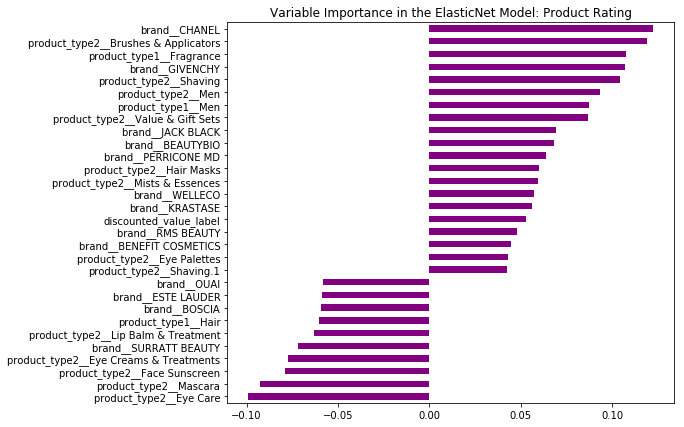

Number of Products predicted:
(202, 1)
First 5 rows of prediction results from the test set:
          0
0  0.867295
1  0.912168
2  0.830886
3  0.838579
4  0.833587
Best alpha : 0.006
ElasticNet RMSE on Train set: 0.28862473581111187
ElasticNet RMSE on Test set: 0.28018158413348376


In [518]:
from sklearn.linear_model import ElasticNetCV


X = sephoraRating[['price', 'size_ounces', 'loves', 'would_recommend', 'reviews', 'product_type1__Bath & Body', 'product_type1__Beauty Supplements', 'product_type1__Candles & Home Scents', 'product_type1__Fragrance', 'product_type1__Gifts', 'product_type1__Hair', 'product_type1__Hair Styling & Treatments', 'product_type1__High Tech Tools', 'product_type1__Makeup', 'product_type1__Makeup Palettes', 'product_type1__Men', 'product_type1__Mini Size', 'product_type1__Nail', 'product_type1__Self Tanners', 'product_type1__Shaving', 'product_type1__Skincare', 'product_type1__Tools & Brushes', 'product_type1__Value & Gift Sets', 'product_type1__nan', 'product_type2__Accessories', 'product_type2__Bath & Shower', 'product_type2__Best For', 'product_type2__Body Care', 'product_type2__Body Moisturizers', 'product_type2__Brushes & Applicators', 'product_type2__Cheek', 'product_type2__Cleansers', 'product_type2__Eye', 'product_type2__Eye Care', 'product_type2__Face', 'product_type2__Fragrance', 'product_type2__Hair', 'product_type2__Hair Styling & Treatments', 'product_type2__Hair Tools', 'product_type2__High Tech Tools', 'product_type2__Inner Beauty', 'product_type2__Lip', 'product_type2__Lip Treatments', 'product_type2__Makeup Brushes & Applicators', 'product_type2__Masks', 'product_type2__Men', 'product_type2__Moisturizers', 'product_type2__Other Needs', 'product_type2__Self Tanners', 'product_type2__Shampoo & Conditioner', 'product_type2__Shaving', 'product_type2__Skincare', 'product_type2__Sun Care', 'product_type2__Treatments', 'product_type2__Value & Gift Sets', 'product_type2__Women', 'product_type2__nan', 'product_type2__Aftershave', 'product_type2__Anti-Aging', 'product_type2__BB & CC Cream', 'product_type2__BB & CC Creams', 'product_type2__Bath & Body', 'product_type2__Bath & Shower.1', 'product_type2__Bath Soaks & Bubble Bath', 'product_type2__Beauty Supplements', 'product_type2__Blemish & Acne Treatments', 'product_type2__Blotting Papers', 'product_type2__Blush', 'product_type2__Body Lotions & Body Oils', 'product_type2__Body Mist & Hair Mist', 'product_type2__Body Products', 'product_type2__Body Sprays & Deodorant', 'product_type2__Body Sunscreen', 'product_type2__Body Wash & Shower Gel', 'product_type2__Bronzer', 'product_type2__Brush Cleaners', 'product_type2__Brush Sets', 'product_type2__Cellulite & Stretch Marks', 'product_type2__Cheek Palettes', 'product_type2__Cleansing', 'product_type2__Cleansing Brushes', 'product_type2__Co Wash & No Poo', 'product_type2__Cologne', 'product_type2__Cologne Gift Sets', 'product_type2__Color Care', 'product_type2__Color Correct', 'product_type2__Concealer', 'product_type2__Conditioner', 'product_type2__Contour', 'product_type2__Curling Irons', 'product_type2__Damaged Hair', 'product_type2__Decollete & Neck Creams', 'product_type2__Deodorant & Antiperspirant', 'product_type2__Deodorant for Men', 'product_type2__Dry Shampoo', 'product_type2__Exfoliators', 'product_type2__Eye Brushes', 'product_type2__Eye Cream', 'product_type2__Eye Creams & Treatments', 'product_type2__Eye Masks', 'product_type2__Eye Palettes', 'product_type2__Eye Primer', 'product_type2__Eye Sets', 'product_type2__Eyebrow', 'product_type2__Eyelash Curlers', 'product_type2__Eyeliner', 'product_type2__Eyeshadow', 'product_type2__Face Brushes', 'product_type2__Face Masks', 'product_type2__Face Oils', 'product_type2__Face Primer', 'product_type2__Face Serums', 'product_type2__Face Sets', 'product_type2__Face Sunscreen', 'product_type2__Face Wash', 'product_type2__Face Wash & Cleansers', 'product_type2__Face Wipes', 'product_type2__Facial Peels', 'product_type2__False Eyelashes', 'product_type2__For Body', 'product_type2__For Face', 'product_type2__Foundation', 'product_type2__Fragrance.1', 'product_type2__Hair.1', 'product_type2__Hair Accessories', 'product_type2__Hair Brushes & Combs', 'product_type2__Hair Color', 'product_type2__Hair Dryers', 'product_type2__Hair Masks', 'product_type2__Hair Oil', 'product_type2__Hair Primers', 'product_type2__Hair Products', 'product_type2__Hair Removal', 'product_type2__Hair Removal & Shaving', 'product_type2__Hair Spray', 'product_type2__Hair Straighteners & Flat Irons', 'product_type2__Hair Styling Products', 'product_type2__Hair Thinning & Hair Loss', 'product_type2__Hand Cream & Foot Cream', 'product_type2__Highlighter', 'product_type2__Leave-In Conditioner', 'product_type2__Lip Balm & Treatment', 'product_type2__Lip Balms & Treatments', 'product_type2__Lip Brushes', 'product_type2__Lip Gloss', 'product_type2__Lip Liner', 'product_type2__Lip Plumper', 'product_type2__Lip Sets', 'product_type2__Lip Stain', 'product_type2__Lip Sunscreen', 'product_type2__Lipstick', 'product_type2__Liquid Lipstick', 'product_type2__Lotions & Oils', 'product_type2__Makeup', 'product_type2__Makeup & Travel Cases', 'product_type2__Makeup Bags & Travel Cases', 'product_type2__Makeup Removers', 'product_type2__Mascara', 'product_type2__Men.1', 'product_type2__Mini Size', 'product_type2__Mirrors & Sharpeners', 'product_type2__Mists & Essences', 'product_type2__Moisturizer & Treatments', 'product_type2__Moisturizers.1', 'product_type2__Night Creams', 'product_type2__Perfume', 'product_type2__Perfume Gift Sets', 'product_type2__Rollerballs & Travel Size', 'product_type2__Scalp & Hair Treatments', 'product_type2__Scrub & Exfoliants', 'product_type2__Setting Spray & Powder', 'product_type2__Shampoo', 'product_type2__Shampoo & Conditioner.1', 'product_type2__Shaving.1', 'product_type2__Sheet Masks', 'product_type2__Skincare.1', 'product_type2__Skincare Sets', 'product_type2__Sponges & Applicators', 'product_type2__Sunscreen', 'product_type2__Teeth Whitening', 'product_type2__Tinted Moisturizer', 'product_type2__Toners', 'product_type2__Tools & Brushes', 'product_type2__Tweezers & Eyebrow Tools', 'product_type2__Under-Eye Concealer', 'product_type2__Water Bottles', 'product_type2__nan.1', 'brand__8GREENS', 'brand__ACQUA DI PARMA', 'brand__AERIN', 'brand__AETHER BEAUTY', 'brand__ALGENIST', 'brand__ALPHA-H', 'brand__ALTERNA HAIRCARE', 'brand__AMAZING COSMETICS', 'brand__AMIKA', 'brand__AMOREPACIFIC', 'brand__ANASTASIA BEVERLY HILLS', 'brand__ANTHONY', 'brand__ANTONYM', 'brand__APIVITA', 'brand__AQUIS', 'brand__ARTIS', 'brand__ARTIST COUTURE', 'brand__ATELIER COLOGNE', 'brand__BALENCIAGA', 'brand__BAREMINERALS', 'brand__BEAUTYBIO', 'brand__BEAUTYBLENDER', 'brand__BECCA', 'brand__BELIF', 'brand__BENEFIT COSMETICS', 'brand__BERDOUES', 'brand__BIO IONIC', 'brand__BIOEFFECT', 'brand__BIOSSANCE', 'brand__BITE BEAUTY', 'brand__BKR', 'brand__BLACK UP', 'brand__BLENDSMART', 'brand__BLINC', 'brand__BLINKING BEAUT', 'brand__BLITHE', 'brand__BOBBI BROWN', 'brand__BOSCIA', 'brand__BRIOGEO', 'brand__BSAME COSMETICS', 'brand__BUMBLE AND BUMBLE', 'brand__BURBERRY', 'brand__BUXOM', 'brand__BVLGARI', 'brand__BY ROSIE JANE', 'brand__CALVIN KLEIN', 'brand__CANE + AUSTIN', 'brand__CAPRI BLUE', 'brand__CAPTAIN BLANKENSHIP', 'brand__CAROLINA HERRERA', 'brand__CAUDALIE', 'brand__CELLU-CUP', 'brand__CHANEL', 'brand__CHARLOTTE TILBURY', 'brand__CHLO', 'brand__CHRISTIAN LOUBOUTIN', 'brand__CHRISTOPHE ROBIN', 'brand__CIAT LONDON', 'brand__CINEMA SECRETS', 'brand__CLARINS', 'brand__CLARISONIC', 'brand__CLEAN', 'brand__CLINIQUE', 'brand__COAL AND CANARY', 'brand__COCOFLOSS', 'brand__COMME DES GARCONS', 'brand__COMMODITY', 'brand__COMPTOIR SUD PACIFIQUE', 'brand__CONTURE', 'brand__COOLA', 'brand__COVER FX', 'brand__CRUSHED TONIC', 'brand__DEBORAH LIPPMANN', 'brand__DEREK LAM 10 CROSBY', 'brand__DERMADOCTOR', 'brand__DERMAFLASH', 'brand__DERMARCHE LABS', 'brand__DEVACURL', 'brand__DIAMANCEL', 'brand__DIOR', 'brand__DISNEY COLLECTION', 'brand__DOLCE&GABBANA', 'brand__DOMINIQUE COSMETICS', 'brand__DONNA KARAN', 'brand__DPHUE', "brand__DR ROEBUCK'S", 'brand__DR. BRANDT SKINCARE', 'brand__DR. DENNIS GROSS SKINCARE', 'brand__DR. JART+', 'brand__DRUNK ELEPHANT', 'brand__DRYBAR', 'brand__DTRT', 'brand__DUO', 'brand__DYSON', 'brand__EARTHS NECTAR', 'brand__EDIBLE BEAUTY', 'brand__EIGHT & BOB', 'brand__ELIZABETH AND JAMES', 'brand__ELLIS BROOKLYN', 'brand__ERBORIAN', 'brand__ERNO LASZLO', 'brand__ESTE LAUDER', "brand__ETAT LIBRE D'ORANGE", 'brand__EVE LOM', 'brand__EVIAN', 'brand__FARMACY', 'brand__FARSLI', 'brand__FENTY BEAUTY BY RIHANNA', 'brand__FIRST AID BEAUTY', 'brand__FOREO', 'brand__FORM', 'brand__FOUR SIGMATIC', 'brand__FRESH',
                   'brand__GHD', 'brand__GIORGIO ARMANI BEAUTY', 'brand__GIVENCHY', 'brand__GLAMGLOW', 'brand__GLO SCIENCE', 'brand__GLOW RECIPE', 'brand__GO-TO', 'brand__GOOD DYE YOUNG', 'brand__GOOGLE', 'brand__GRANDE COSMETICS', 'brand__GUCCI', 'brand__GUERLAIN', 'brand__HERBIVORE', 'brand__HERMS', 'brand__HIGH BEAUTY', 'brand__HISTOIRES DE PARFUMS', 'brand__HOURGLASS', 'brand__HUDA BEAUTY', 'brand__HUM NUTRITION', 'brand__HUSH', 'brand__IGK', 'brand__ILUMINAGE', 'brand__INC.REDIBLE', 'brand__INDIE LEE', 'brand__INVISIBOBBLE', 'brand__ISLE OF PARADISE', 'brand__ISSEY MIYAKE', 'brand__IT COSMETICS', "brand__IT'S SKIN", 'brand__J.ONE', 'brand__JACK BLACK', 'brand__JIMMY CHOO', 'brand__JO MALONE LONDON', 'brand__JOHN VARVATOS', 'brand__JOSIE MARAN', 'brand__JOUER COSMETICS', 'brand__JUICY COUTURE', 'brand__JULIETTE HAS A GUN', 'brand__KAJA', 'brand__KANE NY', 'brand__KAT VON D', 'brand__KATE SOMERVILLE', 'brand__KATE SPADE NEW YORK', 'brand__KENZO', 'brand__KENZOKI', 'brand__KERANIQUE', 'brand__KEVYN AUCOIN', "brand__KIEHL'S SINCE 1851", 'brand__KILIAN', 'brand__KLORANE', 'brand__KOH GEN DO', 'brand__KOPARI', 'brand__KORA ORGANICS', 'brand__KORRES', 'brand__KOSAS', 'brand__KRASTASE', "brand__L'OCCITANE", 'brand__LA MER', 'brand__LAB SERIES FOR MEN', 'brand__LANCER', 'brand__LANCME', 'brand__LANEIGE', 'brand__LASHFOOD', 'brand__LAURA MERCIER', 'brand__LAVANILA', 'brand__LAWLESS', 'brand__LIGHTSTIM', 'brand__LILAH B.', 'brand__LILLY LASHES', 'brand__LIVING PROOF', 'brand__LORD JONES', 'brand__LXMI', 'brand__MADAM C.J. WALKER BEAUTY CULTURE', 'brand__MAELYS COSMETICS', 'brand__MAISON LOUIS MARIE', 'brand__MAISON MARGIELA', 'brand__MAKE UP FOR EVER', 'brand__MAKEUP ERASER', 'brand__MARC JACOBS BEAUTY', 'brand__MARC JACOBS FRAGRANCES', 'brand__MARIO BADESCU', 'brand__MARVIS', 'brand__MDSOLARSCIENCES', 'brand__MICHAEL KORS', 'brand__MILK MAKEUP', 'brand__MIU MIU', 'brand__MONTBLANC', 'brand__MOON JUICE', 'brand__MOROCCANOIL', 'brand__MOSCHINO', 'brand__MOUNT LAI', 'brand__MUGLER', 'brand__MURAD', 'brand__NAILS INC.', 'brand__NARCISO RODRIGUEZ', 'brand__NARS', 'brand__NATASHA DENONA', 'brand__NATURALLY SERIOUS', 'brand__NEOGEN DERMALOGY', 'brand__NEST', 'brand__NO MO-STACHE', 'brand__NUDESTIX', 'brand__NUFACE', 'brand__O&M', 'brand__OBAGI CLINICAL', 'brand__OLAPLEX', 'brand__OLEHENRIKSEN', 'brand__OMOROVICZA', 'brand__ORIGINS', 'brand__OUAI', 'brand__PACO RABANNE', 'brand__PAT MCGRATH LABS', 'brand__PEACE OUT', 'brand__PERRICONE MD', 'brand__PETER THOMAS ROTH', 'brand__PHILOSOPHY', 'brand__PHLUR', 'brand__PINK SUGAR', 'brand__PINROSE', 'brand__PLAYA', 'brand__PMD', 'brand__PRADA', 'brand__PRETTY VULGAR', 'brand__PRIMARY RAW', 'brand__PRIVATE DOCTOR', 'brand__PROACTIV', 'brand__PRORASO', 'brand__QHEMET BIOLOGICS', 'brand__RAG & BONE', 'brand__RAHUA', 'brand__RALPH LAUREN', 'brand__REN CLEAN SKINCARE', 'brand__REVERIE', 'brand__RITA HAZAN', 'brand__RMS BEAUTY', 'brand__RODIN OLIO LUSSO', 'brand__ROSEBUD PERFUME CO.', 'brand__ROSSANO FERRETTI PARMA', 'brand__SACHAJUAN', 'brand__SAND & SKY', 'brand__SATURDAY SKIN', 'brand__SEED PHYTONUTRIENTS', 'brand__SEPHORA COLLECTION', 'brand__SEPHORA FAVORITES', 'brand__SHAVEWORKS', 'brand__SHHHOWERCAP', 'brand__SHISEIDO', 'brand__SK-II', 'brand__SKIN INC SUPPLEMENT BAR', 'brand__SKIN LAUNDRY', 'brand__SLIP', 'brand__SMASHBOX', 'brand__SOL DE JANEIRO', 'brand__SON & PARK', 'brand__ST. TROPEZ TANNING ESSENTIALS', 'brand__STACKEDSKINCARE', 'brand__STELLA MCCARTNEY', 'brand__STELLAR', 'brand__STILA', 'brand__SUMMER FRIDAYS', 'brand__SUNDAY RILEY', 'brand__SUPERGOOP!', 'brand__SURRATT BEAUTY', 'brand__T3', 'brand__TAN-LUXE', 'brand__TANGLE TEEZER', 'brand__TARTE', 'brand__TASTE BEAUTY', 'brand__TATA HARPER', 'brand__TATCHA', 'brand__THE 7 VIRTUES', 'brand__THE ART OF SHAVING', 'brand__THE BEAUTY CHEF', 'brand__THE ORDINARY', 'brand__TOCCA', 'brand__TOKYOMILK', 'brand__TOM FORD', 'brand__TOO COOL FOR SCHOOL', 'brand__TOO FACED', 'brand__TORY BURCH', 'brand__TOUCH IN SOL', 'brand__TRSTIQUE', 'brand__TWEEZERMAN', 'brand__URBAN DECAY', 'brand__VELOUR LASHES', 'brand__VERB', 'brand__VERNON FRANCOIS', 'brand__VERSACE', 'brand__VIKTOR&ROLF', 'brand__VIOLET VOSS', 'brand__VISEART', 'brand__VITA LIBERATA', 'brand__VITAL PROTEINS', 'brand__VITRUVI', 'brand__VOLITION BEAUTY', 'brand__VOLUSPA', 'brand__WANDER BEAUTY', 'brand__WELL-KEPT', 'brand__WELLECO', 'brand__WINKY LUX', 'brand__YOUTH TO THE PEOPLE', 'brand__YUNI', 'brand__YVES SAINT LAURENT', 'discounted_value_label', 'on_sale_label', 'val_normal_skin_label', 'oily_skin_label', 'dry_skin_label', 'combination_skin_label', 'sensitive_skin_label', 'all_skin_label', 'vegan_label', 'tested_label', 'research_label', 'formulated_without_label', 'clean_label']]
#  'oneStarRatio', 'twoStarsRatio', 'threeStarsRatio', 'fourStarsRatio', 'fiveStarsRatio', 'fourAnd5StarRatio', 'fourAnd5Star_above_below_avg'
y=sephoraRating['rating']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2)

elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 
                                      0.85, 0.9, 0.95, 1],
                          alphas = [0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.0003], 
                          max_iter = 600, cv = 5)

elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_

results = pd.Series(y_test_ela)
id_price = list(zip(y_test_ela))
predictions = pd.DataFrame(id_price)

# Plot important coefficients
plt.figure(figsize=(8,7))
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) 
      + " features and eliminated the other " 
      +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(20)])
imp_coefs.plot(kind = "barh", color = "purple")
plt.title("Variable Importance in the ElasticNet Model: Product Rating")
plt.show()

print("Number of Products predicted:")
print(predictions.shape)
print("First 5 rows of prediction results from the test set:")
print(predictions.head())

print("Best alpha :", alpha)

y_train_ela = elasticNet.predict(X_train)
y_test_ela = elasticNet.predict(X_test)

elasticNet_train = np.sqrt(mean_squared_error(y_train_ela, y_train))
print('ElasticNet RMSE on Train set: {}'.format(elasticNet_train))

elasticNet_test = np.sqrt(mean_squared_error(y_test_ela, y_test))
print('ElasticNet RMSE on Test set: {}'.format(elasticNet_test))

# Best alpha : 0.0003 ..... max iter 2000
# ElasticNet RMSE on Train set: 0.07269801325213279
# ElasticNet RMSE on Test set: 0.24587077469644186

# Best alpha : 0.006 ..... max iter 600
# ElasticNet RMSE on Train set: 0.28607266551544525
# ElasticNet RMSE on Test set: 0.29522500172527744

## Predicting Recommendation score

In [513]:
sephora3 = pd.read_csv('CleanSephora.csv', encoding='latin-1')
sephora3['index1'] = sephora3.index

#sephora3[59:62]
print("original:", sephora3.shape)

sephoraRecommend = sephora3[sephora3.would_recommend > 0.0]
sephoraRecommend = sephoraRecommend[sephoraRecommend.reviews > 15]

# newer products will have an inaccurate high/low score 
print()
print("data with reviews > 15:", sephoraRecommend.shape)

original: (6793, 541)

data with reviews > 15: (1008, 541)


In [514]:
sephoraRecommend.drop("would_recommend_label", axis=1, inplace=True)
sephoraRecommend.drop("skin_type_label", axis=1, inplace=True)
sephoraRecommend.drop("brand", axis=1, inplace=True)
sephoraRecommend.drop("product_name", axis=1, inplace=True)
sephoraRecommend.drop("og_price", axis=1, inplace=True)
sephoraRecommend.drop("product_type1", axis=1, inplace=True)
sephoraRecommend.drop("product_type2", axis=1, inplace=True)
sephoraRecommend.drop("product_type3", axis=1, inplace=True)
sephoraRecommend.drop("about", axis=1, inplace=True)
sephoraRecommend.drop("fourAnd5StarRatio_rounded", axis=1, inplace=True)

print(sephoraRecommend.shape)
# print(sephoraRecommend.columns.tolist())

(1008, 531)


In [515]:
X = sephoraRecommend[['price', 'size_ounces', 'loves', 'rating', 'reviews', 'product_type1__Bath & Body', 'product_type1__Beauty Supplements', 'product_type1__Candles & Home Scents', 'product_type1__Fragrance', 'product_type1__Gifts', 'product_type1__Hair', 'product_type1__Hair Styling & Treatments', 'product_type1__High Tech Tools', 'product_type1__Makeup', 'product_type1__Makeup Palettes', 'product_type1__Men', 'product_type1__Mini Size', 'product_type1__Nail', 'product_type1__Self Tanners', 'product_type1__Shaving', 'product_type1__Skincare', 'product_type1__Tools & Brushes', 'product_type1__Value & Gift Sets', 'product_type1__nan', 'product_type2__Accessories', 'product_type2__Bath & Shower', 'product_type2__Best For', 'product_type2__Body Care', 'product_type2__Body Moisturizers', 'product_type2__Brushes & Applicators', 'product_type2__Cheek', 'product_type2__Cleansers', 'product_type2__Eye', 'product_type2__Eye Care', 'product_type2__Face', 'product_type2__Fragrance', 'product_type2__Hair', 'product_type2__Hair Styling & Treatments', 'product_type2__Hair Tools', 'product_type2__High Tech Tools', 'product_type2__Inner Beauty', 'product_type2__Lip', 'product_type2__Lip Treatments', 'product_type2__Makeup Brushes & Applicators', 'product_type2__Masks', 'product_type2__Men', 'product_type2__Moisturizers', 'product_type2__Other Needs', 'product_type2__Self Tanners', 'product_type2__Shampoo & Conditioner', 'product_type2__Shaving', 'product_type2__Skincare', 'product_type2__Sun Care', 'product_type2__Treatments', 'product_type2__Value & Gift Sets', 'product_type2__Women', 'product_type2__nan', 'product_type2__Aftershave', 'product_type2__Anti-Aging', 'product_type2__BB & CC Cream', 'product_type2__BB & CC Creams', 'product_type2__Bath & Body', 'product_type2__Bath & Shower.1', 'product_type2__Bath Soaks & Bubble Bath', 'product_type2__Beauty Supplements', 'product_type2__Blemish & Acne Treatments', 'product_type2__Blotting Papers', 'product_type2__Blush', 'product_type2__Body Lotions & Body Oils', 'product_type2__Body Mist & Hair Mist', 'product_type2__Body Products', 'product_type2__Body Sprays & Deodorant', 'product_type2__Body Sunscreen', 'product_type2__Body Wash & Shower Gel', 'product_type2__Bronzer', 'product_type2__Brush Cleaners', 'product_type2__Brush Sets', 'product_type2__Cellulite & Stretch Marks', 'product_type2__Cheek Palettes', 'product_type2__Cleansing', 'product_type2__Cleansing Brushes', 'product_type2__Co Wash & No Poo', 'product_type2__Cologne', 'product_type2__Cologne Gift Sets', 'product_type2__Color Care', 'product_type2__Color Correct', 'product_type2__Concealer', 'product_type2__Conditioner', 'product_type2__Contour', 'product_type2__Curling Irons', 'product_type2__Damaged Hair', 'product_type2__Decollete & Neck Creams', 'product_type2__Deodorant & Antiperspirant', 'product_type2__Deodorant for Men', 'product_type2__Dry Shampoo', 'product_type2__Exfoliators', 'product_type2__Eye Brushes', 'product_type2__Eye Cream', 'product_type2__Eye Creams & Treatments', 'product_type2__Eye Masks', 'product_type2__Eye Palettes', 'product_type2__Eye Primer', 'product_type2__Eye Sets', 'product_type2__Eyebrow', 'product_type2__Eyelash Curlers', 'product_type2__Eyeliner', 'product_type2__Eyeshadow', 'product_type2__Face Brushes', 'product_type2__Face Masks', 'product_type2__Face Oils', 'product_type2__Face Primer', 'product_type2__Face Serums', 'product_type2__Face Sets', 'product_type2__Face Sunscreen', 'product_type2__Face Wash', 'product_type2__Face Wash & Cleansers', 'product_type2__Face Wipes', 'product_type2__Facial Peels', 'product_type2__False Eyelashes', 'product_type2__For Body', 'product_type2__For Face', 'product_type2__Foundation', 'product_type2__Fragrance.1', 'product_type2__Hair.1', 'product_type2__Hair Accessories', 'product_type2__Hair Brushes & Combs', 'product_type2__Hair Color', 'product_type2__Hair Dryers', 'product_type2__Hair Masks', 'product_type2__Hair Oil', 'product_type2__Hair Primers', 'product_type2__Hair Products', 'product_type2__Hair Removal', 'product_type2__Hair Removal & Shaving', 'product_type2__Hair Spray', 'product_type2__Hair Straighteners & Flat Irons', 'product_type2__Hair Styling Products', 'product_type2__Hair Thinning & Hair Loss', 'product_type2__Hand Cream & Foot Cream', 'product_type2__Highlighter', 'product_type2__Leave-In Conditioner', 'product_type2__Lip Balm & Treatment', 'product_type2__Lip Balms & Treatments', 'product_type2__Lip Brushes', 'product_type2__Lip Gloss', 'product_type2__Lip Liner', 'product_type2__Lip Plumper', 'product_type2__Lip Sets', 'product_type2__Lip Stain', 'product_type2__Lip Sunscreen', 'product_type2__Lipstick', 'product_type2__Liquid Lipstick', 'product_type2__Lotions & Oils', 'product_type2__Makeup', 'product_type2__Makeup & Travel Cases', 'product_type2__Makeup Bags & Travel Cases', 'product_type2__Makeup Removers', 'product_type2__Mascara', 'product_type2__Men.1', 'product_type2__Mini Size', 'product_type2__Mirrors & Sharpeners', 'product_type2__Mists & Essences', 'product_type2__Moisturizer & Treatments', 'product_type2__Moisturizers.1', 'product_type2__Night Creams', 'product_type2__Perfume', 'product_type2__Perfume Gift Sets', 'product_type2__Rollerballs & Travel Size', 'product_type2__Scalp & Hair Treatments', 'product_type2__Scrub & Exfoliants', 'product_type2__Setting Spray & Powder', 'product_type2__Shampoo', 'product_type2__Shampoo & Conditioner.1', 'product_type2__Shaving.1', 'product_type2__Sheet Masks', 'product_type2__Skincare.1', 'product_type2__Skincare Sets', 'product_type2__Sponges & Applicators', 'product_type2__Sunscreen', 'product_type2__Teeth Whitening', 'product_type2__Tinted Moisturizer', 'product_type2__Toners', 'product_type2__Tools & Brushes', 'product_type2__Tweezers & Eyebrow Tools', 'product_type2__Under-Eye Concealer', 'product_type2__Water Bottles', 'product_type2__nan.1', 'brand__8GREENS', 'brand__ACQUA DI PARMA', 'brand__AERIN', 'brand__AETHER BEAUTY', 'brand__ALGENIST', 'brand__ALPHA-H', 'brand__ALTERNA HAIRCARE', 'brand__AMAZING COSMETICS', 'brand__AMIKA', 'brand__AMOREPACIFIC', 'brand__ANASTASIA BEVERLY HILLS', 'brand__ANTHONY', 'brand__ANTONYM', 'brand__APIVITA', 'brand__AQUIS', 'brand__ARTIS', 'brand__ARTIST COUTURE', 'brand__ATELIER COLOGNE', 'brand__BALENCIAGA', 'brand__BAREMINERALS', 'brand__BEAUTYBIO', 'brand__BEAUTYBLENDER', 'brand__BECCA', 'brand__BELIF', 'brand__BENEFIT COSMETICS', 'brand__BERDOUES', 'brand__BIO IONIC', 'brand__BIOEFFECT', 'brand__BIOSSANCE', 'brand__BITE BEAUTY', 'brand__BKR', 'brand__BLACK UP', 'brand__BLENDSMART', 'brand__BLINC', 'brand__BLINKING BEAUT', 'brand__BLITHE', 'brand__BOBBI BROWN', 'brand__BOSCIA', 'brand__BRIOGEO', 'brand__BSAME COSMETICS', 'brand__BUMBLE AND BUMBLE', 'brand__BURBERRY', 'brand__BUXOM', 'brand__BVLGARI', 'brand__BY ROSIE JANE', 'brand__CALVIN KLEIN', 'brand__CANE + AUSTIN', 'brand__CAPRI BLUE', 'brand__CAPTAIN BLANKENSHIP', 'brand__CAROLINA HERRERA', 'brand__CAUDALIE', 'brand__CELLU-CUP', 'brand__CHANEL', 'brand__CHARLOTTE TILBURY', 'brand__CHLO', 'brand__CHRISTIAN LOUBOUTIN', 'brand__CHRISTOPHE ROBIN', 'brand__CIAT LONDON', 'brand__CINEMA SECRETS', 'brand__CLARINS', 'brand__CLARISONIC', 'brand__CLEAN', 'brand__CLINIQUE', 'brand__COAL AND CANARY', 'brand__COCOFLOSS', 'brand__COMME DES GARCONS', 'brand__COMMODITY', 'brand__COMPTOIR SUD PACIFIQUE', 'brand__CONTURE', 'brand__COOLA', 'brand__COVER FX', 'brand__CRUSHED TONIC', 'brand__DEBORAH LIPPMANN', 'brand__DEREK LAM 10 CROSBY', 'brand__DERMADOCTOR', 'brand__DERMAFLASH', 'brand__DERMARCHE LABS', 'brand__DEVACURL', 'brand__DIAMANCEL', 'brand__DIOR', 'brand__DISNEY COLLECTION', 'brand__DOLCE&GABBANA', 'brand__DOMINIQUE COSMETICS', 'brand__DONNA KARAN', 'brand__DPHUE', "brand__DR ROEBUCK'S", 'brand__DR. BRANDT SKINCARE', 'brand__DR. DENNIS GROSS SKINCARE', 'brand__DR. JART+', 'brand__DRUNK ELEPHANT', 'brand__DRYBAR', 'brand__DTRT', 'brand__DUO', 'brand__DYSON', 'brand__EARTHS NECTAR', 'brand__EDIBLE BEAUTY', 'brand__EIGHT & BOB', 'brand__ELIZABETH AND JAMES', 'brand__ELLIS BROOKLYN', 'brand__ERBORIAN', 'brand__ERNO LASZLO', 'brand__ESTE LAUDER', "brand__ETAT LIBRE D'ORANGE", 'brand__EVE LOM', 'brand__EVIAN', 'brand__FARMACY', 'brand__FARSLI', 'brand__FENTY BEAUTY BY RIHANNA', 'brand__FIRST AID BEAUTY', 'brand__FOREO', 'brand__FORM', 'brand__FOUR SIGMATIC', 'brand__FRESH', 'brand__GHD', 'brand__GIORGIO ARMANI BEAUTY', 'brand__GIVENCHY', 'brand__GLAMGLOW', 'brand__GLO SCIENCE', 'brand__GLOW RECIPE', 'brand__GO-TO', 'brand__GOOD DYE YOUNG', 'brand__GOOGLE', 'brand__GRANDE COSMETICS', 'brand__GUCCI', 'brand__GUERLAIN', 'brand__HERBIVORE', 'brand__HERMS', 'brand__HIGH BEAUTY', 'brand__HISTOIRES DE PARFUMS', 'brand__HOURGLASS', 'brand__HUDA BEAUTY', 'brand__HUM NUTRITION', 'brand__HUSH', 'brand__IGK', 'brand__ILUMINAGE', 'brand__INC.REDIBLE', 'brand__INDIE LEE', 'brand__INVISIBOBBLE', 'brand__ISLE OF PARADISE', 'brand__ISSEY MIYAKE', 'brand__IT COSMETICS', "brand__IT'S SKIN", 'brand__J.ONE', 'brand__JACK BLACK', 'brand__JIMMY CHOO', 'brand__JO MALONE LONDON', 'brand__JOHN VARVATOS', 'brand__JOSIE MARAN', 'brand__JOUER COSMETICS', 'brand__JUICY COUTURE', 'brand__JULIETTE HAS A GUN', 'brand__KAJA', 'brand__KANE NY', 'brand__KAT VON D', 'brand__KATE SOMERVILLE', 'brand__KATE SPADE NEW YORK', 'brand__KENZO', 'brand__KENZOKI', 'brand__KERANIQUE', 'brand__KEVYN AUCOIN', "brand__KIEHL'S SINCE 1851", 'brand__KILIAN', 'brand__KLORANE', 'brand__KOH GEN DO', 'brand__KOPARI', 'brand__KORA ORGANICS',
                      'brand__KORRES', 'brand__KOSAS', 'brand__KRASTASE', "brand__L'OCCITANE", 'brand__LA MER', 'brand__LAB SERIES FOR MEN', 'brand__LANCER', 'brand__LANCME', 'brand__LANEIGE', 'brand__LASHFOOD', 'brand__LAURA MERCIER', 'brand__LAVANILA', 'brand__LAWLESS', 'brand__LIGHTSTIM', 'brand__LILAH B.', 'brand__LILLY LASHES', 'brand__LIVING PROOF', 'brand__LORD JONES', 'brand__LXMI', 'brand__MADAM C.J. WALKER BEAUTY CULTURE', 'brand__MAELYS COSMETICS', 'brand__MAISON LOUIS MARIE', 'brand__MAISON MARGIELA', 'brand__MAKE UP FOR EVER', 'brand__MAKEUP ERASER', 'brand__MARC JACOBS BEAUTY', 'brand__MARC JACOBS FRAGRANCES', 'brand__MARIO BADESCU', 'brand__MARVIS', 'brand__MDSOLARSCIENCES', 'brand__MICHAEL KORS', 'brand__MILK MAKEUP', 'brand__MIU MIU', 'brand__MONTBLANC', 'brand__MOON JUICE', 'brand__MOROCCANOIL', 'brand__MOSCHINO', 'brand__MOUNT LAI', 'brand__MUGLER', 'brand__MURAD', 'brand__NAILS INC.', 'brand__NARCISO RODRIGUEZ', 'brand__NARS', 'brand__NATASHA DENONA', 'brand__NATURALLY SERIOUS', 'brand__NEOGEN DERMALOGY', 'brand__NEST', 'brand__NO MO-STACHE', 'brand__NUDESTIX', 'brand__NUFACE', 'brand__O&M', 'brand__OBAGI CLINICAL', 'brand__OLAPLEX', 'brand__OLEHENRIKSEN', 'brand__OMOROVICZA', 'brand__ORIGINS', 'brand__OUAI', 'brand__PACO RABANNE', 'brand__PAT MCGRATH LABS', 'brand__PEACE OUT', 'brand__PERRICONE MD', 'brand__PETER THOMAS ROTH', 'brand__PHILOSOPHY', 'brand__PHLUR', 'brand__PINK SUGAR', 'brand__PINROSE', 'brand__PLAYA', 'brand__PMD', 'brand__PRADA', 'brand__PRETTY VULGAR', 'brand__PRIMARY RAW', 'brand__PRIVATE DOCTOR', 'brand__PROACTIV', 'brand__PRORASO', 'brand__QHEMET BIOLOGICS', 'brand__RAG & BONE', 'brand__RAHUA', 'brand__RALPH LAUREN', 'brand__REN CLEAN SKINCARE', 'brand__REVERIE', 'brand__RITA HAZAN', 'brand__RMS BEAUTY', 'brand__RODIN OLIO LUSSO', 'brand__ROSEBUD PERFUME CO.', 'brand__ROSSANO FERRETTI PARMA', 'brand__SACHAJUAN', 'brand__SAND & SKY', 'brand__SATURDAY SKIN', 'brand__SEED PHYTONUTRIENTS', 'brand__SEPHORA COLLECTION', 'brand__SEPHORA FAVORITES', 'brand__SHAVEWORKS', 'brand__SHHHOWERCAP', 'brand__SHISEIDO', 'brand__SK-II', 'brand__SKIN INC SUPPLEMENT BAR', 'brand__SKIN LAUNDRY', 'brand__SLIP', 'brand__SMASHBOX', 'brand__SOL DE JANEIRO', 'brand__SON & PARK', 'brand__ST. TROPEZ TANNING ESSENTIALS', 'brand__STACKEDSKINCARE', 'brand__STELLA MCCARTNEY', 'brand__STELLAR', 'brand__STILA', 'brand__SUMMER FRIDAYS', 'brand__SUNDAY RILEY', 'brand__SUPERGOOP!', 'brand__SURRATT BEAUTY', 'brand__T3', 'brand__TAN-LUXE', 'brand__TANGLE TEEZER', 'brand__TARTE', 'brand__TASTE BEAUTY', 'brand__TATA HARPER', 'brand__TATCHA', 'brand__THE 7 VIRTUES', 'brand__THE ART OF SHAVING', 'brand__THE BEAUTY CHEF', 'brand__THE ORDINARY', 'brand__TOCCA', 'brand__TOKYOMILK', 'brand__TOM FORD', 'brand__TOO COOL FOR SCHOOL', 'brand__TOO FACED', 'brand__TORY BURCH', 'brand__TOUCH IN SOL', 'brand__TRSTIQUE', 'brand__TWEEZERMAN', 'brand__URBAN DECAY', 'brand__VELOUR LASHES', 'brand__VERB', 'brand__VERNON FRANCOIS', 'brand__VERSACE', 'brand__VIKTOR&ROLF', 'brand__VIOLET VOSS', 'brand__VISEART', 'brand__VITA LIBERATA', 'brand__VITAL PROTEINS', 'brand__VITRUVI', 'brand__VOLITION BEAUTY', 'brand__VOLUSPA', 'brand__WANDER BEAUTY', 'brand__WELL-KEPT', 'brand__WELLECO', 'brand__WINKY LUX', 'brand__YOUTH TO THE PEOPLE', 'brand__YUNI', 'brand__YVES SAINT LAURENT', 'discounted_value_label', 'on_sale_label', 'val_normal_skin_label', 'oily_skin_label', 'dry_skin_label', 'combination_skin_label', 'sensitive_skin_label', 'all_skin_label', 'vegan_label', 'tested_label', 'research_label', 'formulated_without_label', 'clean_label', 'oneStarRatio', 'twoStarsRatio', 'threeStarsRatio', 'fourStarsRatio', 'fiveStarsRatio', 'fourAnd5StarRatio', 'fourAnd5Star_above_below_avg']]


y=sephoraRecommend['would_recommend']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2)

xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [0.05, 0.1, 0.01, 0.03], #so called `eta` value   # 
              'max_depth': [6],
           #   'min_child_weight': [1,2,3,4],   # 5,6
              'silent': [1],
              'min_samples_split':[2, 3, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [522]}   # 500,600,700

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 4,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print("best score: ", xgb_grid.best_score_)
print("best parameters: ", xgb_grid.best_params_)

# best score:  0.6691830283529002

Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  5.0min
[Parallel(n_jobs=4)]: Done  96 out of  96 | elapsed: 10.7min finished


best score:  0.7037860013863811
best parameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 522, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


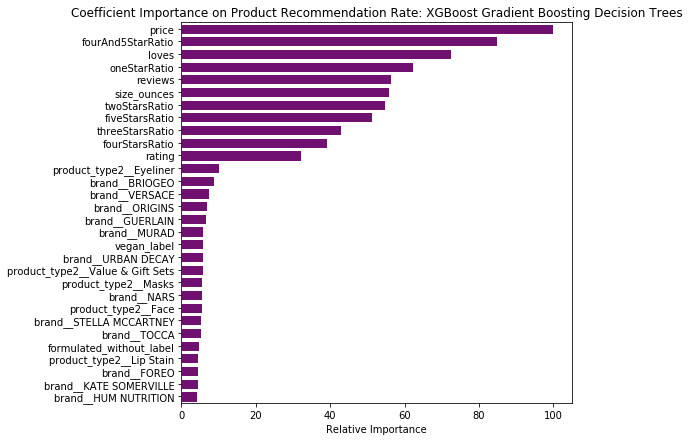

(202, 1)
          0
0  0.818036
1  0.927371
2  0.945643
3  0.921185
4  0.882185

XGBoost RMSE on the Train set for Recommendation Rate is: 0.015296214834249592
XGBoost RMSE on the Test set for Recommendation Rate is: 0.033315406338877813


In [516]:
y_train_predict = xgb_grid.predict(X_train)
y_test_predict = xgb_grid.predict(X_test)

# save results to DF
results = pd.Series(y_test_predict)
id_price = list(zip((y_test_predict)))
predictions = pd.DataFrame(id_price)

# plot important coeff
#importances = CV_RFR_regr.best_estimator_.feature_importances_
feature_importance = xgb_grid.best_estimator_.feature_importances_                 # gonna get an error here
feature_importance = 100 * (feature_importance / feature_importance.max())

sorted_index = np.argsort(feature_importance)
featimp = feature_importance[sorted_index]
feat = X_train.columns[sorted_index]
pos = np.arange(sorted_index.shape[0]) + .5

a = 0 
b = 30 # max features
c = b - a

featimp= featimp[::-1][a:b]
feat = feat[::-1][a:b]
pos = pos[::-1][a:b]

fig = plt.figure(figsize=(7,7))
plt.subplot2grid((1,1), (0,0))
with sns.axes_style("white"):
    ax = sns.barplot(y=feat, x=featimp, color = "purple")
plt.xlabel('Relative Importance')
plt.title('Coefficient Importance on Product Recommendation Rate: XGBoost Gradient Boosting Decision Trees'.format(c))
plt.show()

print(predictions.shape)
print(predictions.head())
print("")

est_train = np.sqrt(mean_squared_error(y_train, y_train_predict))
print('XGBoost RMSE on the Train set for Recommendation Rate is: {}'.format(est_train))

est_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
print('XGBoost RMSE on the Test set for Recommendation Rate is: {}'.format(est_test))

# XGBoost RMSE on the Train set for Average Rating is: 0.015746389817436007
# XGBoost RMSE on the Test set for Average Rating is: 0.03161056553066585

## Product Recommendation: ElasticNet

ElasticNet picked 65 features and eliminated the other 458 features


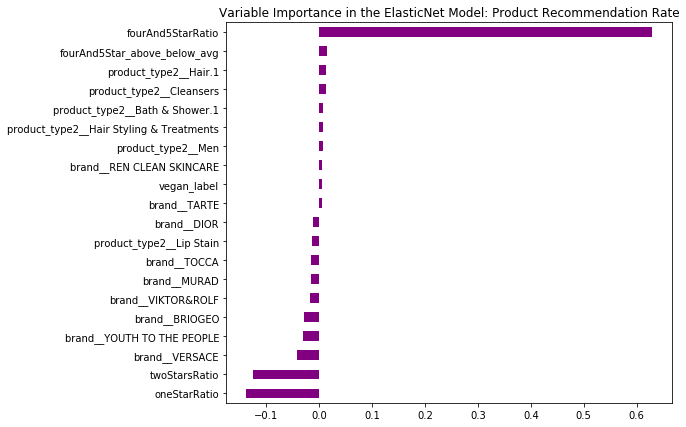

Number of Products predicted:
(202, 1)
First 5 rows of prediction results from the test set:
          0
0  0.949540
1  0.893071
2  0.857249
3  0.921800
4  0.894422
Best alpha : 0.0001
ElasticNet RMSE on Train set for Recommendation Rate: 0.02725526583549535
ElasticNet RMSE on Test set for Recommendation Rate: 0.030017479926322442


In [517]:
from sklearn.linear_model import ElasticNetCV

X = sephoraRecommend[['price', 'size_ounces', 'loves', 'rating', 'reviews', 'product_type1__Bath & Body', 'product_type1__Beauty Supplements', 'product_type1__Candles & Home Scents', 'product_type1__Fragrance', 'product_type1__Gifts', 'product_type1__Hair', 'product_type1__Hair Styling & Treatments', 'product_type1__High Tech Tools', 'product_type1__Makeup', 'product_type1__Makeup Palettes', 'product_type1__Men', 'product_type1__Mini Size', 'product_type1__Nail', 'product_type1__Self Tanners', 'product_type1__Shaving', 'product_type1__Skincare', 'product_type1__Tools & Brushes', 'product_type1__Value & Gift Sets', 'product_type1__nan', 'product_type2__Accessories', 'product_type2__Bath & Shower', 'product_type2__Best For', 'product_type2__Body Care', 'product_type2__Body Moisturizers', 'product_type2__Brushes & Applicators', 'product_type2__Cheek', 'product_type2__Cleansers', 'product_type2__Eye', 'product_type2__Eye Care', 'product_type2__Face', 'product_type2__Fragrance', 'product_type2__Hair', 'product_type2__Hair Styling & Treatments', 'product_type2__Hair Tools', 'product_type2__High Tech Tools', 'product_type2__Inner Beauty', 'product_type2__Lip', 'product_type2__Lip Treatments', 'product_type2__Makeup Brushes & Applicators', 'product_type2__Masks', 'product_type2__Men', 'product_type2__Moisturizers', 'product_type2__Other Needs', 'product_type2__Self Tanners', 'product_type2__Shampoo & Conditioner', 'product_type2__Shaving', 'product_type2__Skincare', 'product_type2__Sun Care', 'product_type2__Treatments', 'product_type2__Value & Gift Sets', 'product_type2__Women', 'product_type2__nan', 'product_type2__Aftershave', 'product_type2__Anti-Aging', 'product_type2__BB & CC Cream', 'product_type2__BB & CC Creams', 'product_type2__Bath & Body', 'product_type2__Bath & Shower.1', 'product_type2__Bath Soaks & Bubble Bath', 'product_type2__Beauty Supplements', 'product_type2__Blemish & Acne Treatments', 'product_type2__Blotting Papers', 'product_type2__Blush', 'product_type2__Body Lotions & Body Oils', 'product_type2__Body Mist & Hair Mist', 'product_type2__Body Products', 'product_type2__Body Sprays & Deodorant', 'product_type2__Body Sunscreen', 'product_type2__Body Wash & Shower Gel', 'product_type2__Bronzer', 'product_type2__Brush Cleaners', 'product_type2__Brush Sets', 'product_type2__Cellulite & Stretch Marks', 'product_type2__Cheek Palettes', 'product_type2__Cleansing', 'product_type2__Cleansing Brushes', 'product_type2__Co Wash & No Poo', 'product_type2__Cologne', 'product_type2__Cologne Gift Sets', 'product_type2__Color Care', 'product_type2__Color Correct', 'product_type2__Concealer', 'product_type2__Conditioner', 'product_type2__Contour', 'product_type2__Curling Irons', 'product_type2__Damaged Hair', 'product_type2__Decollete & Neck Creams', 'product_type2__Deodorant & Antiperspirant', 'product_type2__Deodorant for Men', 'product_type2__Dry Shampoo', 'product_type2__Exfoliators', 'product_type2__Eye Brushes', 'product_type2__Eye Cream', 'product_type2__Eye Creams & Treatments', 'product_type2__Eye Masks', 'product_type2__Eye Palettes', 'product_type2__Eye Primer', 'product_type2__Eye Sets', 'product_type2__Eyebrow', 'product_type2__Eyelash Curlers', 'product_type2__Eyeliner', 'product_type2__Eyeshadow', 'product_type2__Face Brushes', 'product_type2__Face Masks', 'product_type2__Face Oils', 'product_type2__Face Primer', 'product_type2__Face Serums', 'product_type2__Face Sets', 'product_type2__Face Sunscreen', 'product_type2__Face Wash', 'product_type2__Face Wash & Cleansers', 'product_type2__Face Wipes', 'product_type2__Facial Peels', 'product_type2__False Eyelashes', 'product_type2__For Body', 'product_type2__For Face', 'product_type2__Foundation', 'product_type2__Fragrance.1', 'product_type2__Hair.1', 'product_type2__Hair Accessories', 'product_type2__Hair Brushes & Combs', 'product_type2__Hair Color', 'product_type2__Hair Dryers', 'product_type2__Hair Masks', 'product_type2__Hair Oil', 'product_type2__Hair Primers', 'product_type2__Hair Products', 'product_type2__Hair Removal', 'product_type2__Hair Removal & Shaving', 'product_type2__Hair Spray', 'product_type2__Hair Straighteners & Flat Irons', 'product_type2__Hair Styling Products', 'product_type2__Hair Thinning & Hair Loss', 'product_type2__Hand Cream & Foot Cream', 'product_type2__Highlighter', 'product_type2__Leave-In Conditioner', 'product_type2__Lip Balm & Treatment', 'product_type2__Lip Balms & Treatments', 'product_type2__Lip Brushes', 'product_type2__Lip Gloss', 'product_type2__Lip Liner', 'product_type2__Lip Plumper', 'product_type2__Lip Sets', 'product_type2__Lip Stain', 'product_type2__Lip Sunscreen', 'product_type2__Lipstick', 'product_type2__Liquid Lipstick', 'product_type2__Lotions & Oils', 'product_type2__Makeup', 'product_type2__Makeup & Travel Cases', 'product_type2__Makeup Bags & Travel Cases', 'product_type2__Makeup Removers', 'product_type2__Mascara', 'product_type2__Men.1', 'product_type2__Mini Size', 'product_type2__Mirrors & Sharpeners', 'product_type2__Mists & Essences', 'product_type2__Moisturizer & Treatments', 'product_type2__Moisturizers.1', 'product_type2__Night Creams', 'product_type2__Perfume', 'product_type2__Perfume Gift Sets', 'product_type2__Rollerballs & Travel Size', 'product_type2__Scalp & Hair Treatments', 'product_type2__Scrub & Exfoliants', 'product_type2__Setting Spray & Powder', 'product_type2__Shampoo', 'product_type2__Shampoo & Conditioner.1', 'product_type2__Shaving.1', 'product_type2__Sheet Masks', 'product_type2__Skincare.1', 'product_type2__Skincare Sets', 'product_type2__Sponges & Applicators', 'product_type2__Sunscreen', 'product_type2__Teeth Whitening', 'product_type2__Tinted Moisturizer', 'product_type2__Toners', 'product_type2__Tools & Brushes', 'product_type2__Tweezers & Eyebrow Tools', 'product_type2__Under-Eye Concealer', 'product_type2__Water Bottles', 'product_type2__nan.1', 'brand__8GREENS', 'brand__ACQUA DI PARMA', 'brand__AERIN', 'brand__AETHER BEAUTY', 'brand__ALGENIST', 'brand__ALPHA-H', 'brand__ALTERNA HAIRCARE', 'brand__AMAZING COSMETICS', 'brand__AMIKA', 'brand__AMOREPACIFIC', 'brand__ANASTASIA BEVERLY HILLS', 'brand__ANTHONY', 'brand__ANTONYM', 'brand__APIVITA', 'brand__AQUIS', 'brand__ARTIS', 'brand__ARTIST COUTURE', 'brand__ATELIER COLOGNE', 'brand__BALENCIAGA', 'brand__BAREMINERALS', 'brand__BEAUTYBIO', 'brand__BEAUTYBLENDER', 'brand__BECCA', 'brand__BELIF', 'brand__BENEFIT COSMETICS', 'brand__BERDOUES', 'brand__BIO IONIC', 'brand__BIOEFFECT', 'brand__BIOSSANCE', 'brand__BITE BEAUTY', 'brand__BKR', 'brand__BLACK UP', 'brand__BLENDSMART', 'brand__BLINC', 'brand__BLINKING BEAUT', 'brand__BLITHE', 'brand__BOBBI BROWN', 'brand__BOSCIA', 'brand__BRIOGEO', 'brand__BSAME COSMETICS', 'brand__BUMBLE AND BUMBLE', 'brand__BURBERRY', 'brand__BUXOM', 'brand__BVLGARI', 'brand__BY ROSIE JANE', 'brand__CALVIN KLEIN', 'brand__CANE + AUSTIN', 'brand__CAPRI BLUE', 'brand__CAPTAIN BLANKENSHIP', 'brand__CAROLINA HERRERA', 'brand__CAUDALIE', 'brand__CELLU-CUP', 'brand__CHANEL', 'brand__CHARLOTTE TILBURY', 'brand__CHLO', 'brand__CHRISTIAN LOUBOUTIN', 'brand__CHRISTOPHE ROBIN', 'brand__CIAT LONDON', 'brand__CINEMA SECRETS', 'brand__CLARINS', 'brand__CLARISONIC', 'brand__CLEAN', 'brand__CLINIQUE', 'brand__COAL AND CANARY', 'brand__COCOFLOSS', 'brand__COMME DES GARCONS', 'brand__COMMODITY', 'brand__COMPTOIR SUD PACIFIQUE', 'brand__CONTURE', 'brand__COOLA', 'brand__COVER FX', 'brand__CRUSHED TONIC', 'brand__DEBORAH LIPPMANN', 'brand__DEREK LAM 10 CROSBY', 'brand__DERMADOCTOR', 'brand__DERMAFLASH', 'brand__DERMARCHE LABS', 'brand__DEVACURL', 'brand__DIAMANCEL', 'brand__DIOR', 'brand__DISNEY COLLECTION', 'brand__DOLCE&GABBANA', 'brand__DOMINIQUE COSMETICS', 'brand__DONNA KARAN', 'brand__DPHUE', "brand__DR ROEBUCK'S", 'brand__DR. BRANDT SKINCARE', 'brand__DR. DENNIS GROSS SKINCARE', 'brand__DR. JART+', 'brand__DRUNK ELEPHANT', 'brand__DRYBAR', 'brand__DTRT', 'brand__DUO', 'brand__DYSON', 'brand__EARTHS NECTAR', 'brand__EDIBLE BEAUTY', 'brand__EIGHT & BOB', 'brand__ELIZABETH AND JAMES', 'brand__ELLIS BROOKLYN', 'brand__ERBORIAN', 'brand__ERNO LASZLO', 'brand__ESTE LAUDER', "brand__ETAT LIBRE D'ORANGE", 'brand__EVE LOM', 'brand__EVIAN', 'brand__FARMACY', 'brand__FARSLI', 'brand__FENTY BEAUTY BY RIHANNA', 'brand__FIRST AID BEAUTY', 'brand__FOREO', 'brand__FORM', 'brand__FOUR SIGMATIC', 'brand__FRESH', 'brand__GHD', 'brand__GIORGIO ARMANI BEAUTY', 'brand__GIVENCHY', 'brand__GLAMGLOW', 'brand__GLO SCIENCE', 'brand__GLOW RECIPE', 'brand__GO-TO', 'brand__GOOD DYE YOUNG', 'brand__GOOGLE', 'brand__GRANDE COSMETICS', 'brand__GUCCI', 'brand__GUERLAIN', 'brand__HERBIVORE', 'brand__HERMS', 'brand__HIGH BEAUTY', 'brand__HISTOIRES DE PARFUMS', 'brand__HOURGLASS', 'brand__HUDA BEAUTY', 'brand__HUM NUTRITION', 'brand__HUSH', 'brand__IGK', 'brand__ILUMINAGE', 'brand__INC.REDIBLE', 'brand__INDIE LEE', 'brand__INVISIBOBBLE', 'brand__ISLE OF PARADISE', 'brand__ISSEY MIYAKE', 'brand__IT COSMETICS', "brand__IT'S SKIN", 'brand__J.ONE', 'brand__JACK BLACK', 'brand__JIMMY CHOO', 'brand__JO MALONE LONDON', 'brand__JOHN VARVATOS', 'brand__JOSIE MARAN', 'brand__JOUER COSMETICS', 'brand__JUICY COUTURE', 'brand__JULIETTE HAS A GUN', 'brand__KAJA', 'brand__KANE NY', 'brand__KAT VON D', 'brand__KATE SOMERVILLE', 'brand__KATE SPADE NEW YORK', 'brand__KENZO', 'brand__KENZOKI', 'brand__KERANIQUE', 'brand__KEVYN AUCOIN', "brand__KIEHL'S SINCE 1851", 'brand__KILIAN', 'brand__KLORANE', 'brand__KOH GEN DO', 'brand__KOPARI', 'brand__KORA ORGANICS',
                      'brand__KORRES', 'brand__KOSAS', 'brand__KRASTASE', "brand__L'OCCITANE", 'brand__LA MER', 'brand__LAB SERIES FOR MEN', 'brand__LANCER', 'brand__LANCME', 'brand__LANEIGE', 'brand__LASHFOOD', 'brand__LAURA MERCIER', 'brand__LAVANILA', 'brand__LAWLESS', 'brand__LIGHTSTIM', 'brand__LILAH B.', 'brand__LILLY LASHES', 'brand__LIVING PROOF', 'brand__LORD JONES', 'brand__LXMI', 'brand__MADAM C.J. WALKER BEAUTY CULTURE', 'brand__MAELYS COSMETICS', 'brand__MAISON LOUIS MARIE', 'brand__MAISON MARGIELA', 'brand__MAKE UP FOR EVER', 'brand__MAKEUP ERASER', 'brand__MARC JACOBS BEAUTY', 'brand__MARC JACOBS FRAGRANCES', 'brand__MARIO BADESCU', 'brand__MARVIS', 'brand__MDSOLARSCIENCES', 'brand__MICHAEL KORS', 'brand__MILK MAKEUP', 'brand__MIU MIU', 'brand__MONTBLANC', 'brand__MOON JUICE', 'brand__MOROCCANOIL', 'brand__MOSCHINO', 'brand__MOUNT LAI', 'brand__MUGLER', 'brand__MURAD', 'brand__NAILS INC.', 'brand__NARCISO RODRIGUEZ', 'brand__NARS', 'brand__NATASHA DENONA', 'brand__NATURALLY SERIOUS', 'brand__NEOGEN DERMALOGY', 'brand__NEST', 'brand__NO MO-STACHE', 'brand__NUDESTIX', 'brand__NUFACE', 'brand__O&M', 'brand__OBAGI CLINICAL', 'brand__OLAPLEX', 'brand__OLEHENRIKSEN', 'brand__OMOROVICZA', 'brand__ORIGINS', 'brand__OUAI', 'brand__PACO RABANNE', 'brand__PAT MCGRATH LABS', 'brand__PEACE OUT', 'brand__PERRICONE MD', 'brand__PETER THOMAS ROTH', 'brand__PHILOSOPHY', 'brand__PHLUR', 'brand__PINK SUGAR', 'brand__PINROSE', 'brand__PLAYA', 'brand__PMD', 'brand__PRADA', 'brand__PRETTY VULGAR', 'brand__PRIMARY RAW', 'brand__PRIVATE DOCTOR', 'brand__PROACTIV', 'brand__PRORASO', 'brand__QHEMET BIOLOGICS', 'brand__RAG & BONE', 'brand__RAHUA', 'brand__RALPH LAUREN', 'brand__REN CLEAN SKINCARE', 'brand__REVERIE', 'brand__RITA HAZAN', 'brand__RMS BEAUTY', 'brand__RODIN OLIO LUSSO', 'brand__ROSEBUD PERFUME CO.', 'brand__ROSSANO FERRETTI PARMA', 'brand__SACHAJUAN', 'brand__SAND & SKY', 'brand__SATURDAY SKIN', 'brand__SEED PHYTONUTRIENTS', 'brand__SEPHORA COLLECTION', 'brand__SEPHORA FAVORITES', 'brand__SHAVEWORKS', 'brand__SHHHOWERCAP', 'brand__SHISEIDO', 'brand__SK-II', 'brand__SKIN INC SUPPLEMENT BAR', 'brand__SKIN LAUNDRY', 'brand__SLIP', 'brand__SMASHBOX', 'brand__SOL DE JANEIRO', 'brand__SON & PARK', 'brand__ST. TROPEZ TANNING ESSENTIALS', 'brand__STACKEDSKINCARE', 'brand__STELLA MCCARTNEY', 'brand__STELLAR', 'brand__STILA', 'brand__SUMMER FRIDAYS', 'brand__SUNDAY RILEY', 'brand__SUPERGOOP!', 'brand__SURRATT BEAUTY', 'brand__T3', 'brand__TAN-LUXE', 'brand__TANGLE TEEZER', 'brand__TARTE', 'brand__TASTE BEAUTY', 'brand__TATA HARPER', 'brand__TATCHA', 'brand__THE 7 VIRTUES', 'brand__THE ART OF SHAVING', 'brand__THE BEAUTY CHEF', 'brand__THE ORDINARY', 'brand__TOCCA', 'brand__TOKYOMILK', 'brand__TOM FORD', 'brand__TOO COOL FOR SCHOOL', 'brand__TOO FACED', 'brand__TORY BURCH', 'brand__TOUCH IN SOL', 'brand__TRSTIQUE', 'brand__TWEEZERMAN', 'brand__URBAN DECAY', 'brand__VELOUR LASHES', 'brand__VERB', 'brand__VERNON FRANCOIS', 'brand__VERSACE', 'brand__VIKTOR&ROLF', 'brand__VIOLET VOSS', 'brand__VISEART', 'brand__VITA LIBERATA', 'brand__VITAL PROTEINS', 'brand__VITRUVI', 'brand__VOLITION BEAUTY', 'brand__VOLUSPA', 'brand__WANDER BEAUTY', 'brand__WELL-KEPT', 'brand__WELLECO', 'brand__WINKY LUX', 'brand__YOUTH TO THE PEOPLE', 'brand__YUNI', 'brand__YVES SAINT LAURENT', 'discounted_value_label', 'on_sale_label', 'val_normal_skin_label', 'oily_skin_label', 'dry_skin_label', 'combination_skin_label', 'sensitive_skin_label', 'all_skin_label', 'vegan_label', 'tested_label', 'research_label', 'formulated_without_label', 'clean_label', 'oneStarRatio', 'twoStarsRatio', 'threeStarsRatio', 'fourStarsRatio', 'fiveStarsRatio', 'fourAnd5StarRatio', 'fourAnd5Star_above_below_avg']]


y=sephoraRecommend['would_recommend']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2)

elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8,  0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 
                                    0.001], 
                          max_iter = 2000, cv = 5)

elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_

results = pd.Series(y_test_ela)
id_price = list(zip(y_test_ela))
predictions = pd.DataFrame(id_price)
#predictions.to_csv('submit.csv', index=False)

# Plot important coefficients
plt.figure(figsize=(8,7))
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) 
      + " features and eliminated the other " 
      +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color = "purple")
plt.title("Variable Importance in the ElasticNet Model: Product Recommendation Rate")
plt.show()

print("Number of Products predicted:")
print(predictions.shape)
print("First 5 rows of prediction results from the test set:")
print(predictions.head())

print("Best alpha :", alpha)

y_train_ela = elasticNet.predict(X_train)
y_test_ela = elasticNet.predict(X_test)

elasticNet_train = np.sqrt(mean_squared_error(y_train_ela, y_train))
print('ElasticNet RMSE on Train set for Recommendation Rate: {}'.format(elasticNet_train))

elasticNet_test = np.sqrt(mean_squared_error(y_test_ela, y_test))
print('ElasticNet RMSE on Test set for Recommendation Rate: {}'.format(elasticNet_test))